#### Problem Statement

For a consumer finance company which specialises in lending various types of loans to urban customers, when a loan application is processed the company has to make a decision for loan approval based on the applicant’s profile.

Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

#### Objective : 
The objective is to identify patterns and data drivers which indicate if a person is likely to default, which may be used for taking proactive steps (such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.) and improving the onboarding of the potential non-risky customers.

#### Version
Title: Lending club case study\
Author: Swarnim Iyer and Supriya Sinha\
Version: 1.0\
About: The lending club case study EDA notebook comprises of the codes/scripts utilized to explore the data and identify the drivers responsible for default

#### Data load
Load the required libraries and the given CSV required for the EDA exercise

In [109]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#set the required  dataframe options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#remove the expected dataframe warnings
warnings.filterwarnings('ignore')

#Set the current date as a variable for analysis
current_date = pd.to_datetime('today').normalize()

In [4]:
#read the data(present as a csv)
df=pd.read_csv("loan.csv")

#### Data Preprocessing
Initial exploration of the data with basic sanity checks and format changes

In [5]:
#Get the shape of the data to check the volume of the data along with the fields at hand
df.shape

(39717, 111)

In [6]:
#Identifying the datatypes of the columns available in the data
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [7]:
# Getting a quick look at the sample of the data
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [110]:
#identify the columns where two conditions are met: 1. There are unique records in present 2. Records are not completely nulls
retained_columns=[]
for i in df.columns:
    if (df[i].nunique()!=0 & df[i].isnull().sum()!=df.shape[0]):
        retained_columns.append(i)

#### Data synthesis

Synthesizing the data using the business inputs from the data dictionary and other sources. Definig the target variables and exploring the sense checks and outlier conditions to be implemented.

The data understanding of the fields present within the retained column list:

1.	id : Unique code assigned to the loan listing
2.	member_id : Unique code assigned to the borrower
3.	loan_amnt : Loan amount applied by the borrower
4.	funded_amnt : Total loan amount committed
5.	funded_amnt_inv : Total loan amount committed by investors
6.	term: Loan amount tenure in which it needs to be paid off
7.	int_rate : Interest rate on the loan
8.	installment : The monthly payment owed by the borrower
9.	grade : Grade of the loan assigned
10.	sub_grade : Sub-grade of the loan assigned
11.	emp_title : Borrower's job title
12.	emp_length : Employement length in years
13.	home_ownership : Home ownership status provided by the borrower
14.	annual_inc : Self reported income of the borrower
15.	verification_status : Verification status of the annual income
16.	issue_d : The date(month-year) at which loan was issued
17.	loan_status : Current status of the loan
18.	pymnt_plan : Indicates if a payment plan is put in place
19.	url : URL of the listing page
20.	desc : Loan description provided by the borrower
21.	purpose : Category of the loan provided by the borrower
22.	title : Loan title provided for the loan
23.	zip_code : The first 3 zip code provided by the borrower
24.	addr_state : The state provided by the borrower in the application
25.	dti : The debt to income ratio of the given applicant
26.	delinq_2yrs : Number of instances of 30+ days past due instances of a borrower for past 2 years
27.	earliest_cr_line : The earliest reported credit line for a borrower
28.	inq_last_6mths : The number of enquiries in past 6 months
29.	mths_since_last_delinq : Months since last deliquency by a borrower
30.	mths_since_last_record : Number of months since last record
31.	open_acc : The number of open credit line in a borrower's file
32.	pub_rec : Number of deragotory public records
33.	revol_bal : Total credit revolving balance
34.	revol_util : Revolving utilization rate is the ratio between used credit to the available credit
35.	total_acc : Total number of credit line in a borrower's file
36.	initial_list_status : The initial status of the loan
37.	out_prncp : Remaining outstanding principal for the total loan amount
38.	out_prncp_inv : Remaining outstanding principal for the total loan portion by investors
39.	total_pymnt : Payment recieved till date for the total amount funded
40.	total_pymnt_inv : Payment recieved till date for the total portion funded by investors
41.	total_rec_prncp : Principal recieved till date
42.	total_rec_int : Intrest recieved till date
43.	total_rec_late_fee : Late fee recieved till date
44.	recoveries : Total recoveries post charge off/defaulting
45.	collection_recovery_fee : Total collection fee post charge off/defaulting
46.	last_pymnt_d : Last month payment was made
47.	last_pymnt_amnt : Last total payment amount recieved
48.	next_pymnt_d : Next scheduled payment date
49.	last_credit_pull_d : The most recent month a credit was pulled for the loan
50.	collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections
51.	policy_code : The code of the policy for the loan (whether it's publically available or not)
52.	application_type : Indicates the type of application
53.	acc_now_delinq : The number of accounts on which the borrower is now delinquent
54.	chargeoff_within_12_mths : Number of charge offs within the 12 months
55.	delinq_amnt : The past-due amount owed for the accounts on which the borrower is now delinquent
56.	pub_rec_bankruptcies : Number of public record bankruptcies
57.	tax_liens : Number of tax liens

In [9]:
#Getting the column level specifics i.e. the total unique values, nulls, value samples
for i in retained_columns:
    print("column name: ",i)
    print("total unique values: ",df[i].nunique())
    print("Total null value: ",df[i].isnull().sum())
    print(df[i].head(2),"\n")

column name:  id
total unique values:  39717
Total null value:  0
0    1077501
1    1077430
Name: id, dtype: int64 

column name:  member_id
total unique values:  39717
Total null value:  0
0    1296599
1    1314167
Name: member_id, dtype: int64 

column name:  loan_amnt
total unique values:  885
Total null value:  0
0    5000
1    2500
Name: loan_amnt, dtype: int64 

column name:  funded_amnt
total unique values:  1041
Total null value:  0
0    5000
1    2500
Name: funded_amnt, dtype: int64 

column name:  funded_amnt_inv
total unique values:  8205
Total null value:  0
0    4975.0
1    2500.0
Name: funded_amnt_inv, dtype: float64 

column name:  term
total unique values:  2
Total null value:  0
0     36 months
1     60 months
Name: term, dtype: object 

column name:  int_rate
total unique values:  371
Total null value:  0
0    10.65%
1    15.27%
Name: int_rate, dtype: object 

column name:  installment
total unique values:  15383
Total null value:  0
0    162.87
1     59.83
Name: inst

In [10]:
#classifying the retained columns into specific cohort based on business understanding and data specifics
numerical_columns=['delinq_2yrs','inq_last_6mths','pub_rec','pub_rec_bankruptcies','loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','mths_since_last_delinq','mths_since_last_record','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
categorical_columns=['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','loan_status','purpose','title','zip_code','addr_state']
numerical_type_change=['int_rate','revol_util']
categorical_type_change=['id','member_id']
date_conversion=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d']
unusable=['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']

In [11]:
#changing the data types to float for all numerical columns
for i in numerical_columns:
    df[i]=df[i].astype('float')

#changing the data type to categorical for all numerical type change ones
for i in categorical_type_change:
    df[i]=df[i].astype('object')

#changing the data types to numerical ones from categorical
for i in numerical_type_change:
    df[i]=df[i].str.replace('%','').astype('float')

#changing the data types to date format (assuming the first date of the month as default considering the categorical date column is in month year level)
for i in date_conversion:
    df[i]=pd.to_datetime(df[i],format='%b-%y')

In [12]:
#re-distributing the columns based on the type changes
numerical_columns=numerical_columns+numerical_type_change
categorical_columns=categorical_columns+categorical_type_change
date_columns=date_conversion

#creating the list of usable columns
usable_columns=numerical_columns+categorical_columns+date_columns

In [13]:
# check the null counts of the usable columns for imputation
df[usable_columns].isnull().sum()

delinq_2yrs                    0
inq_last_6mths                 0
pub_rec                        0
pub_rec_bankruptcies         697
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
installment                    0
annual_inc                     0
dti                            0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
revol_bal                      0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
int_rate                       0
revol_util                    50
term                           0
grade                          0
sub_grade                      0
emp_title 

In [14]:
#Imputing the nulls in the 'pub_rec_bankruptcies' with zeros assuming the unavailability of data signifies no bankruptcies
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(0)

#Imputing the values for 'title' column with 'purpose' for the missing value as both are borrower based fields
df['title']=np.where(df['title'].isnull(), df['purpose'], df['title'] )

#Imputation for the other columns with pending nulls is not possible with any default imputation techniques
#This includes: mths_since_last_delinq, mths_since_last_record, revol_util, emp_title, emp_length, last_pymnt_d, last_credit_pull_d

In [15]:
#checking the null count distribution across the target column 'loan_status' for mths_since_last_delinq and mths_since_last_record which have more than 50% nulls
def null_percentage(val):
    null_count = val.isnull().sum()
    total_count = len(val)
    return (null_count / total_count) * 100

#Printing the null percentage values across hte loan status column
print(df.groupby('loan_status')['mths_since_last_delinq'].apply(null_percentage).reset_index().rename(columns= {'mths_since_last_delinq':'null percentage'}))
print(df.groupby('loan_status')['mths_since_last_record'].apply(null_percentage).reset_index().rename(columns= {'mths_since_last_record':'null_percentage'}))

#Adding the two column is the unusable list
unusable.append('mths_since_last_delinq')
unusable.append('mths_since_last_record')

#removing the two columns as they don't have significant data across the target column
usable_columns=[i for i in usable_columns if i not in unusable]
numerical_columns=[i for i in numerical_columns if i not in unusable]

   loan_status  null percentage
0  Charged Off        61.933535
1      Current        68.157895
2   Fully Paid        65.007587
   loan_status  null_percentage
0  Charged Off        89.728097
1      Current        95.964912
2   Fully Paid        93.438543


In [16]:
#Further deep diving into the categorical columns with very high number of categories
#Removing the categorical attributes with a lot of categories >100 (not usable for any categorical or ordinal analysis)
for i in categorical_columns:
    if i not in ['member_id','id']:
        if df[i].nunique()>100:
            unusable.append(i)
usable_columns=[i for i in usable_columns if i not in unusable]
categorical_columns=[i for i in categorical_columns if i not in unusable]

In [17]:
#check the duplicated records in the usable columns
df[usable_columns].duplicated().sum()

0

#### Outlier removal and sense checks
Removing the respective outliers based on the understanding from data. Additionally, performing data sense checks as well to remove error values

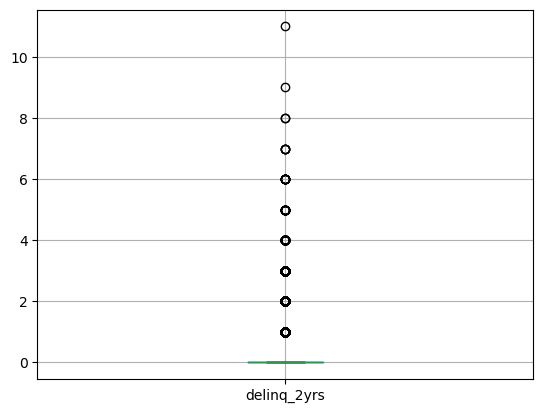

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


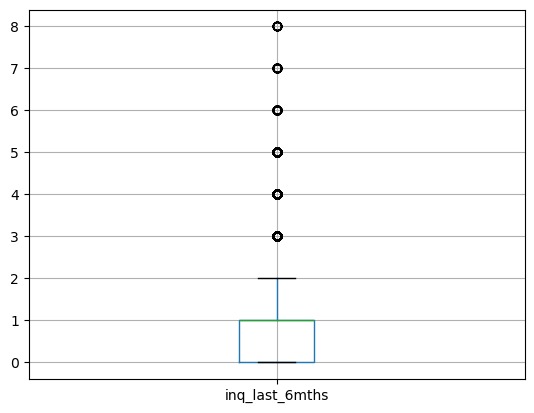

count    39717.000000
mean         0.869200
std          1.070219
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


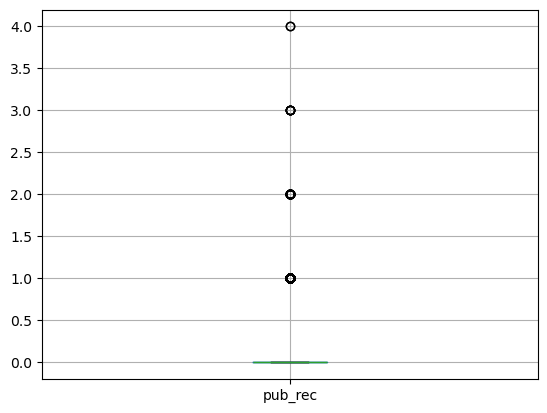

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


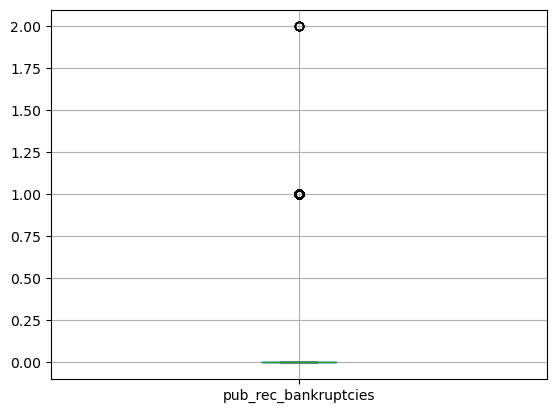

count    39717.000000
mean         0.042501
std          0.202603
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


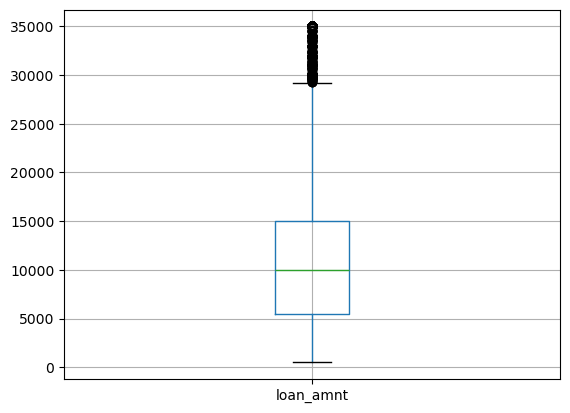

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


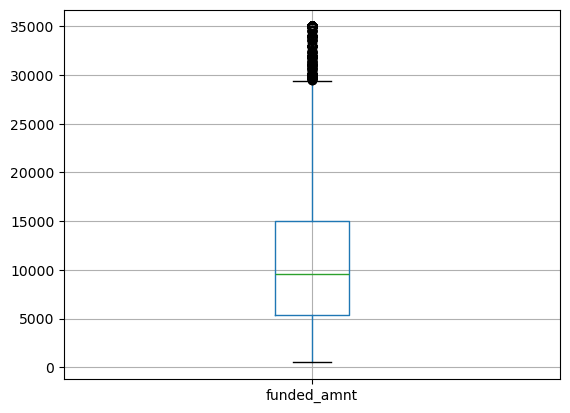

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


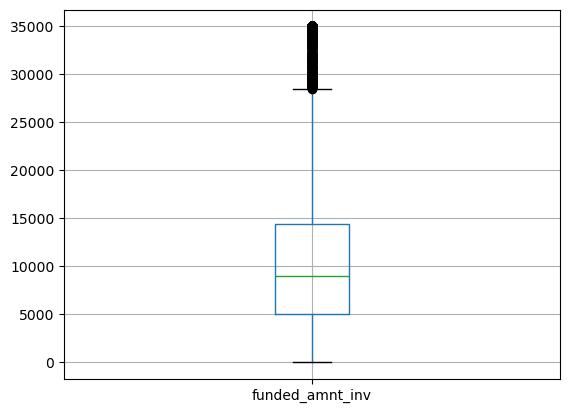

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


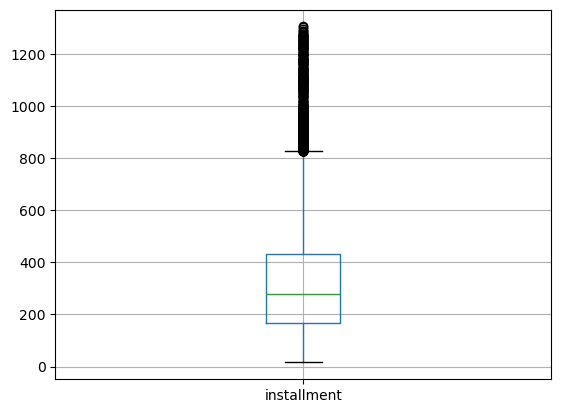

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


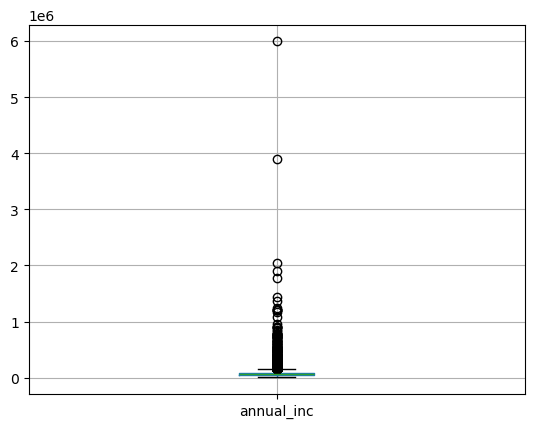

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


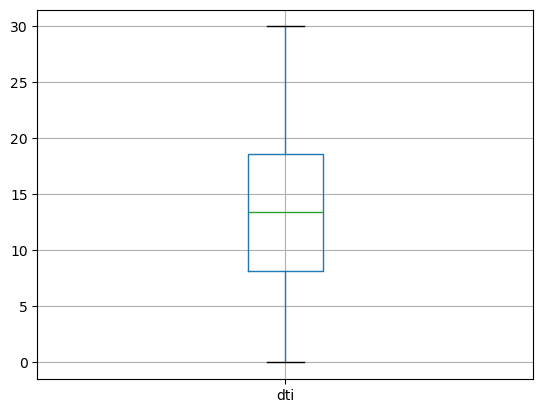

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


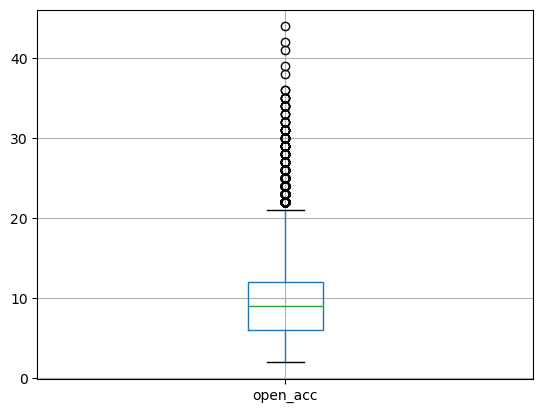

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


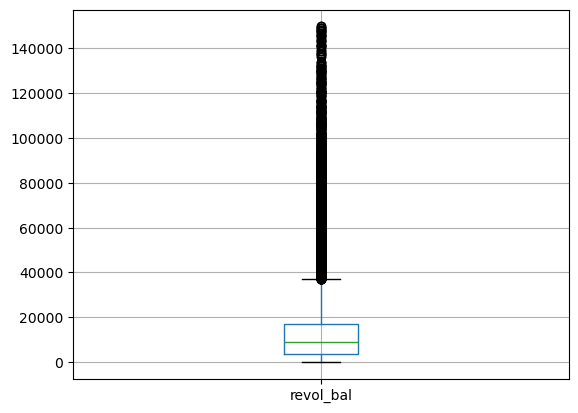

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64


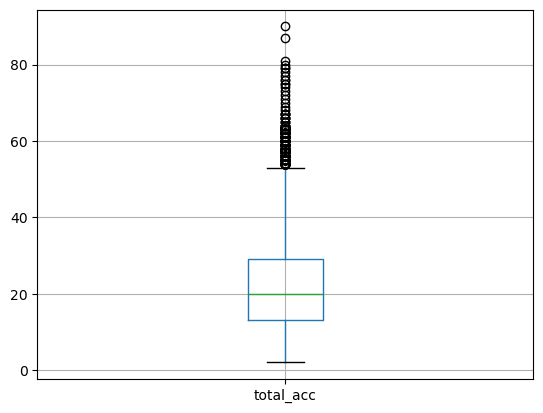

count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


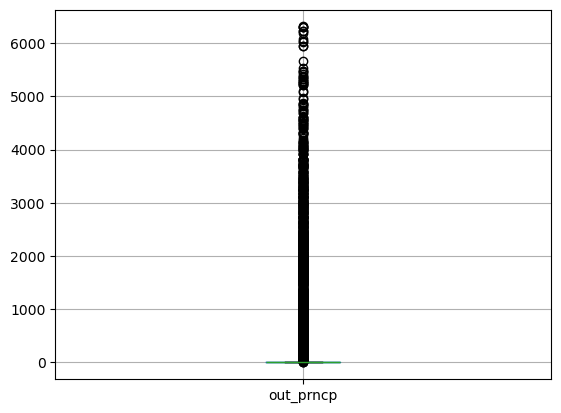

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64


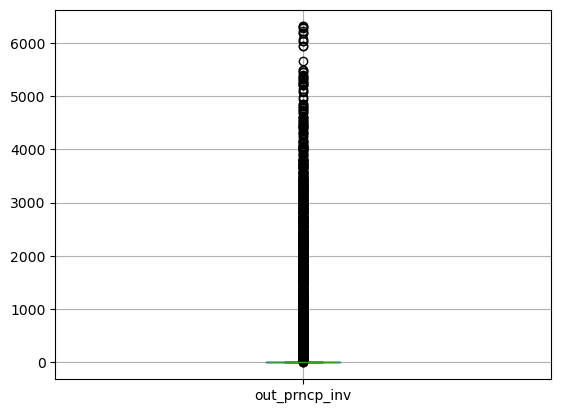

count    39717.000000
mean        50.989768
std        373.824457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64


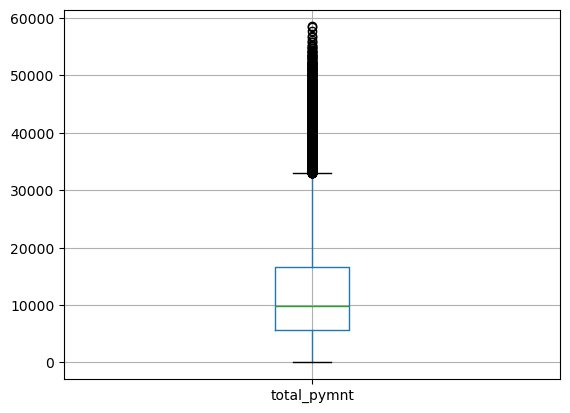

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64


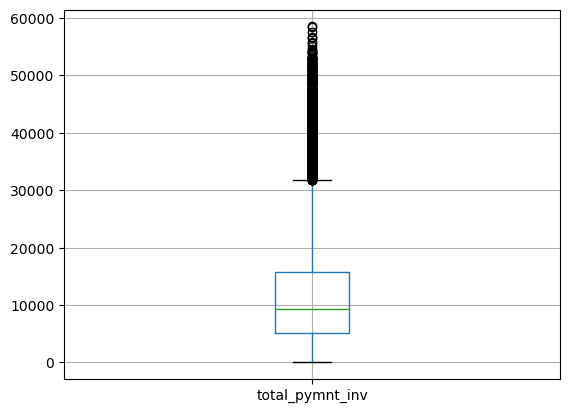

count    39717.000000
mean     11567.149118
std       8942.672613
min          0.000000
25%       5112.310000
50%       9287.150000
75%      15798.810000
max      58563.680000
Name: total_pymnt_inv, dtype: float64


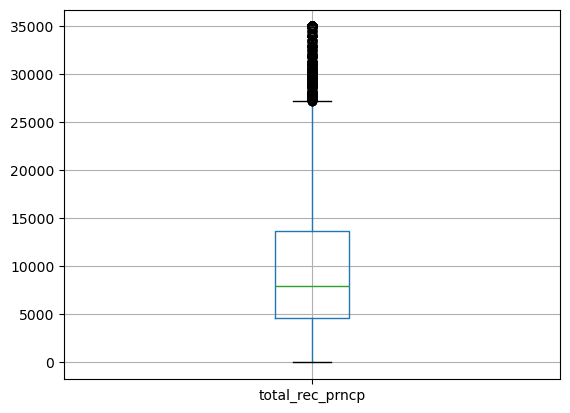

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64


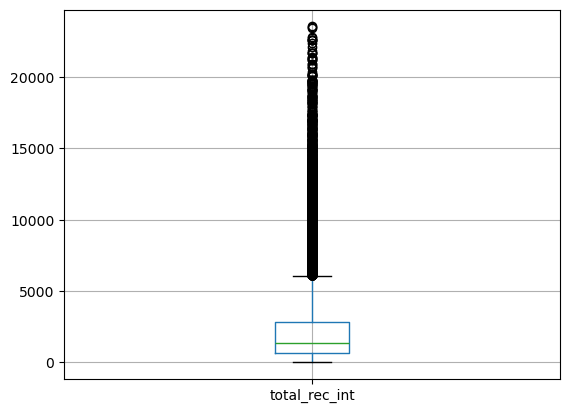

count    39717.000000
mean      2263.663172
std       2608.111964
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max      23563.680000
Name: total_rec_int, dtype: float64


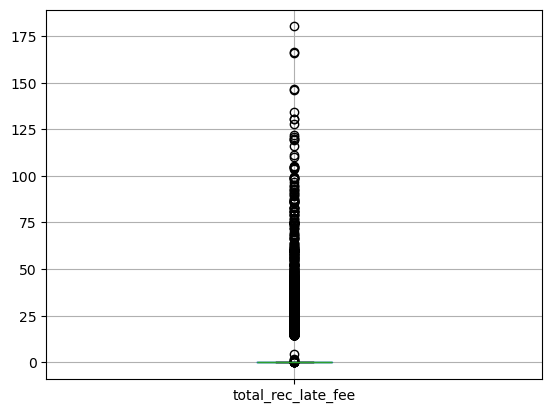

count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64


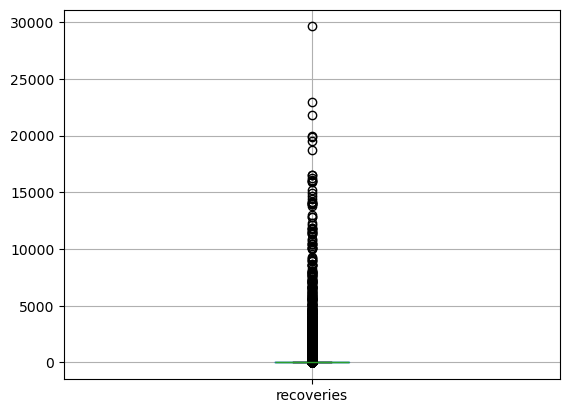

count    39717.000000
mean        95.221624
std        688.744771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64


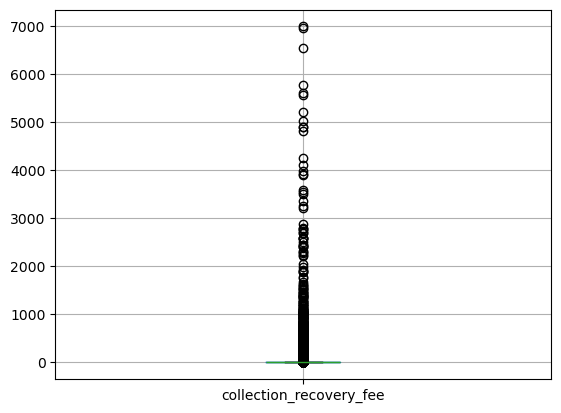

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64


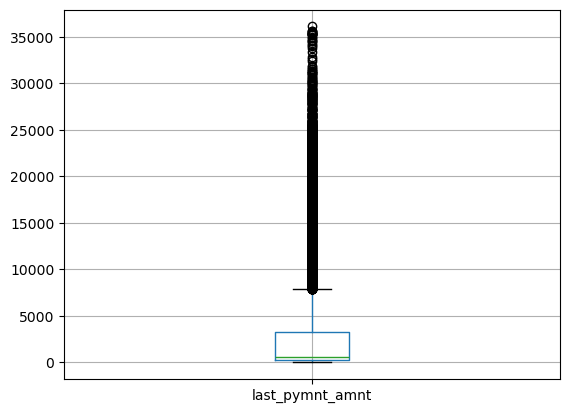

count    39717.000000
mean      2678.826162
std       4447.136012
min          0.000000
25%        218.680000
50%        546.140000
75%       3293.160000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64


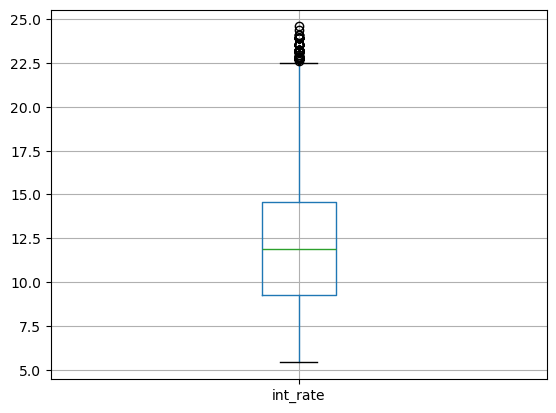

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


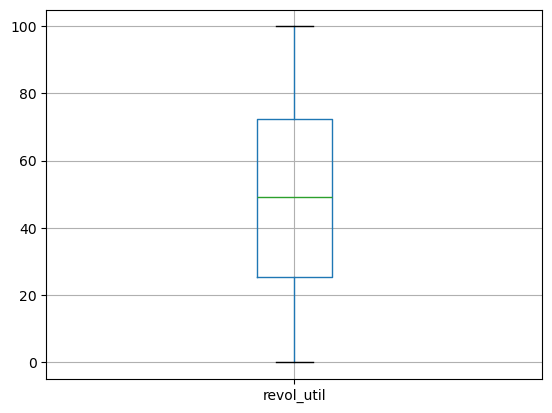

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64


In [18]:
#checking percentile split for the numerical columns along with the box plots for overall data
for i in numerical_columns:
    df.boxplot(column=i)
    plt.show()
    print(df[i].describe())

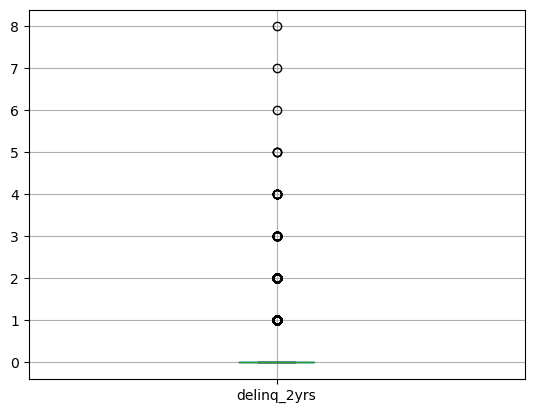

count    5627.000000
mean        0.170606
std         0.534986
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: delinq_2yrs, dtype: float64


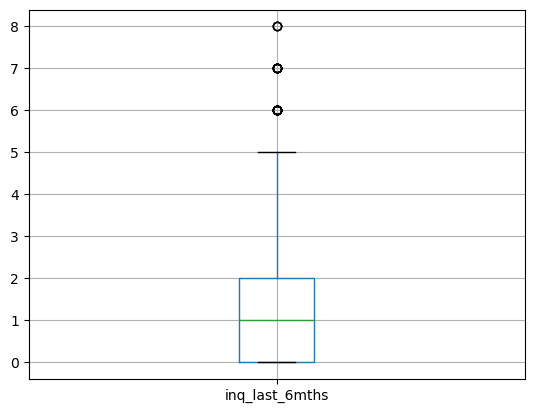

count    5627.000000
mean        1.058113
std         1.154136
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inq_last_6mths, dtype: float64


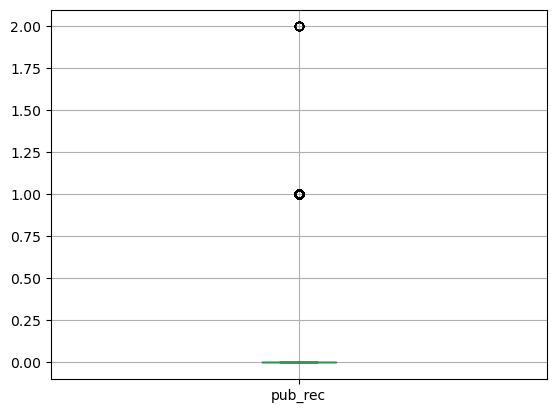

count    5627.000000
mean        0.084770
std         0.284873
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: pub_rec, dtype: float64


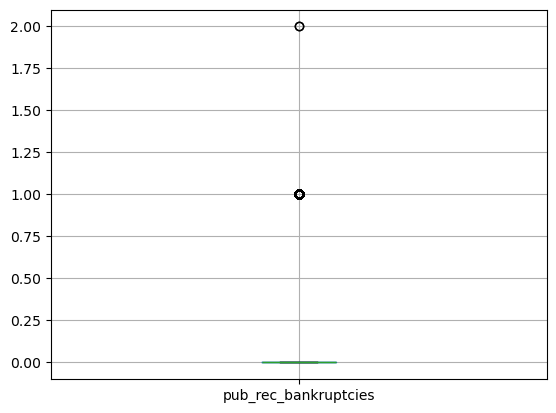

count    5627.000000
mean        0.065754
std         0.249304
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: pub_rec_bankruptcies, dtype: float64


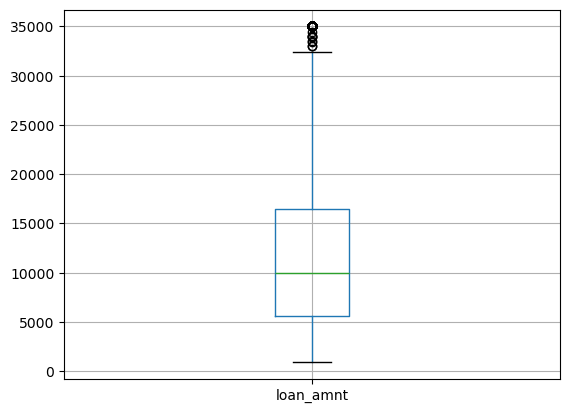

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64


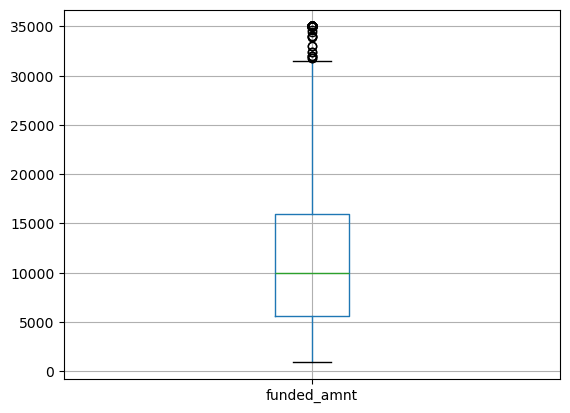

count     5627.000000
mean     11753.398792
std       7760.516335
min        900.000000
25%       5575.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


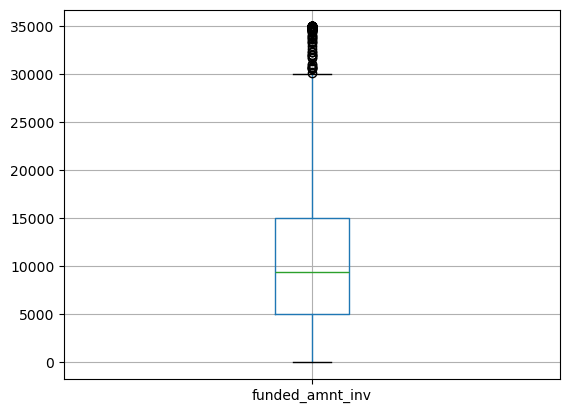

count     5627.000000
mean     10864.521324
std       7661.750540
min          0.000000
25%       5000.000000
50%       9401.209477
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


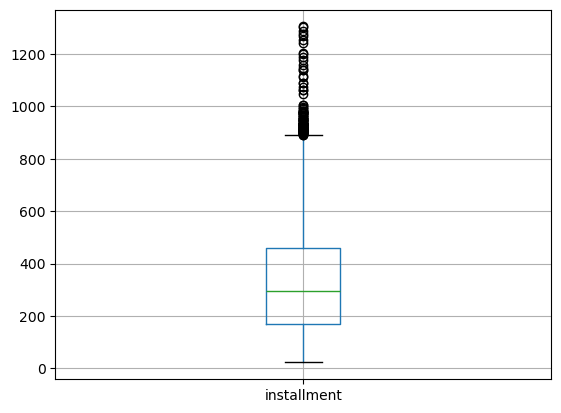

count    5627.000000
mean      336.175006
std       217.051841
min        22.790000
25%       168.555000
50%       293.870000
75%       457.840000
max      1305.190000
Name: installment, dtype: float64


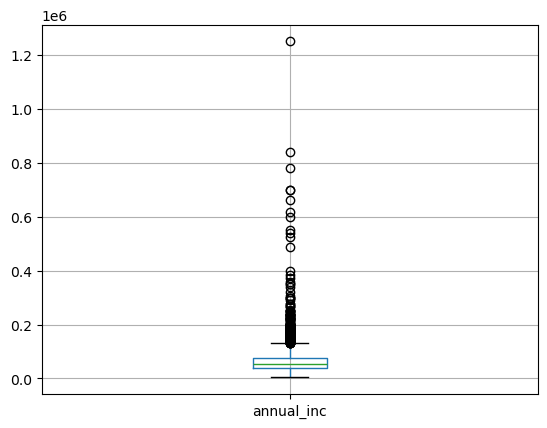

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64


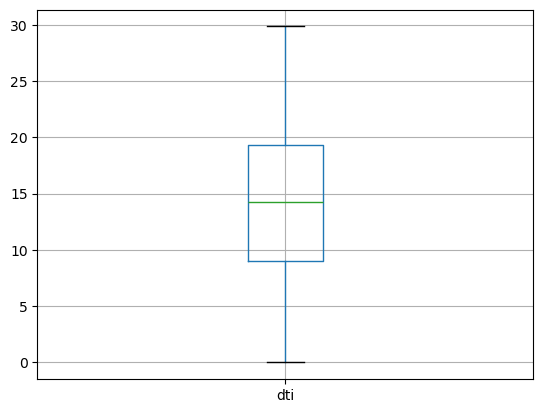

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64


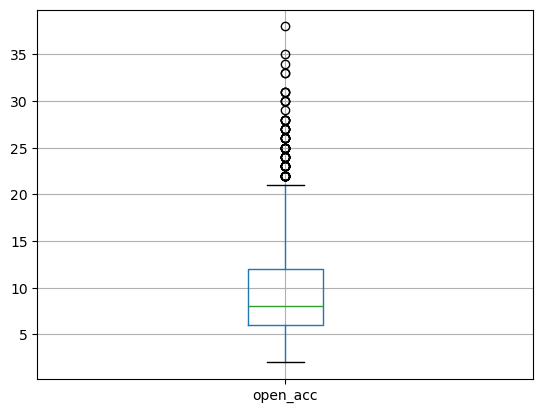

count    5627.000000
mean        9.178070
std         4.525937
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64


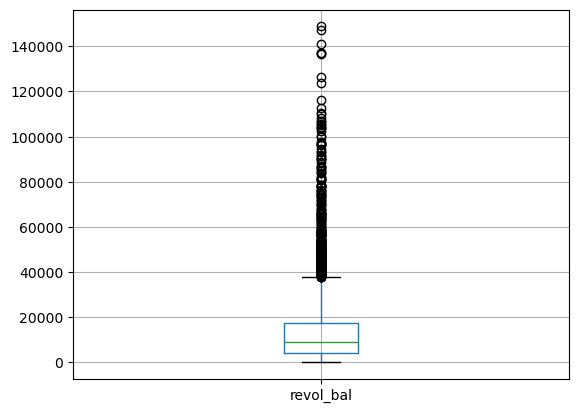

count      5627.000000
mean      13514.243647
std       15164.117475
min           0.000000
25%        3968.000000
50%        9211.000000
75%       17518.000000
max      148829.000000
Name: revol_bal, dtype: float64


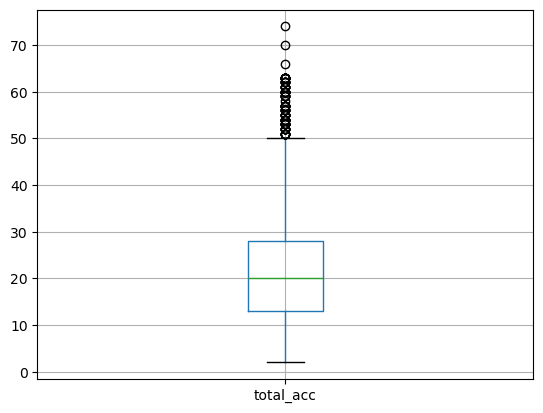

count    5627.000000
mean       21.427581
std        11.447427
min         2.000000
25%        13.000000
50%        20.000000
75%        28.000000
max        74.000000
Name: total_acc, dtype: float64


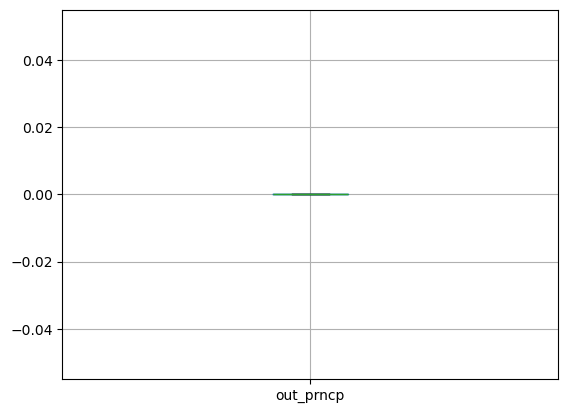

count    5627.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: out_prncp, dtype: float64


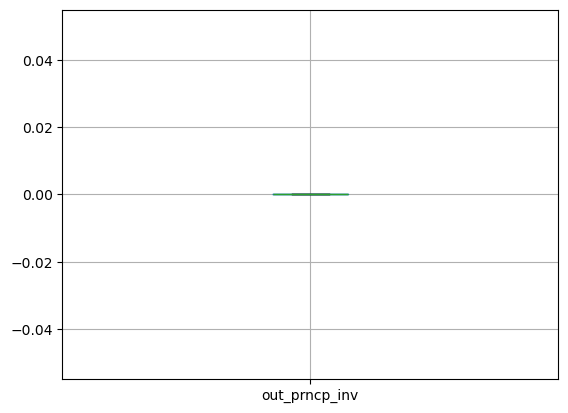

count    5627.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: out_prncp_inv, dtype: float64


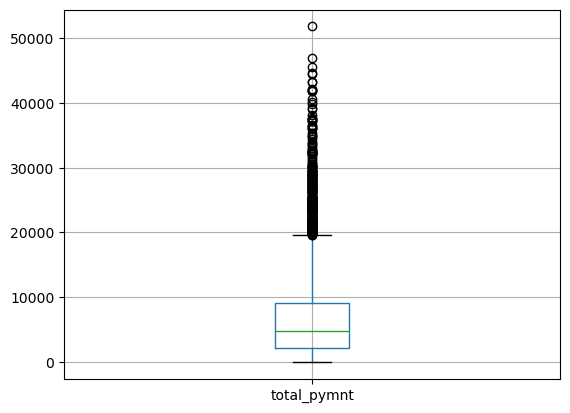

count     5627.000000
mean      6838.030941
std       6615.858854
min          0.000000
25%       2215.575000
50%       4839.000000
75%       9191.705000
max      51745.450000
Name: total_pymnt, dtype: float64


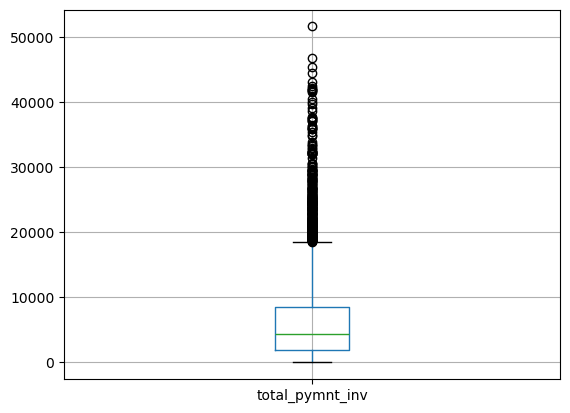

count     5627.000000
mean      6367.470474
std       6490.913020
min          0.000000
25%       1865.910000
50%       4345.740000
75%       8544.850000
max      51671.580000
Name: total_pymnt_inv, dtype: float64


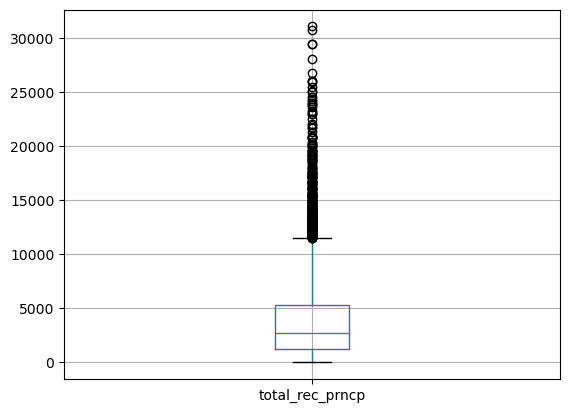

count     5627.000000
mean      3967.177947
std       3963.430777
min          0.000000
25%       1205.780000
50%       2729.590000
75%       5341.130000
max      31115.810000
Name: total_rec_prncp, dtype: float64


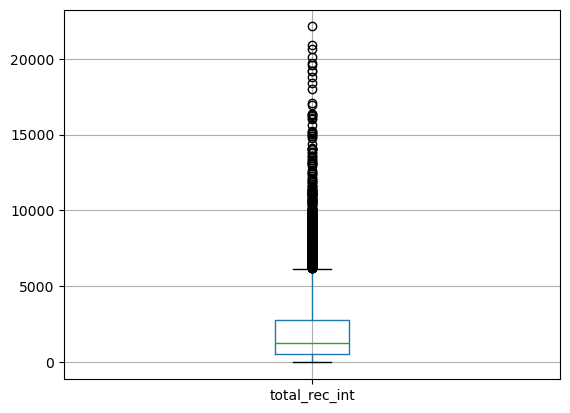

count     5627.000000
mean      2194.459385
std       2551.973930
min          0.000000
25%        555.010000
50%       1288.260000
75%       2801.615000
max      22122.300000
Name: total_rec_int, dtype: float64


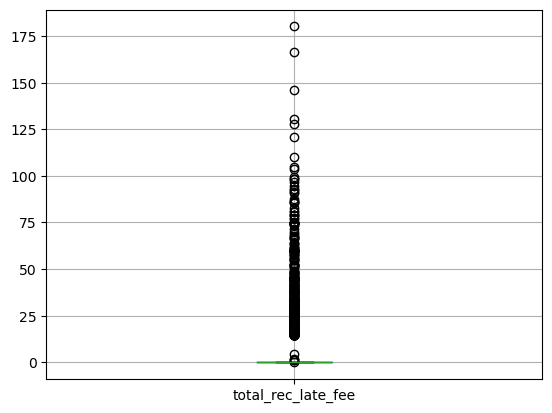

count    5627.000000
mean        4.291692
std        12.815790
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       180.200000
Name: total_rec_late_fee, dtype: float64


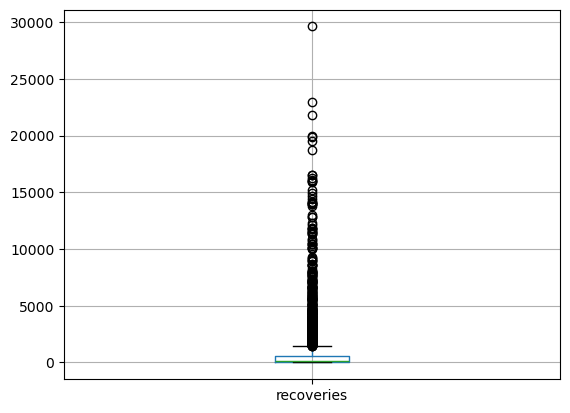

count     5627.000000
mean       672.101872
std       1720.742949
min          0.000000
25%          0.000000
50%        173.040000
75%        595.655000
max      29623.350000
Name: recoveries, dtype: float64


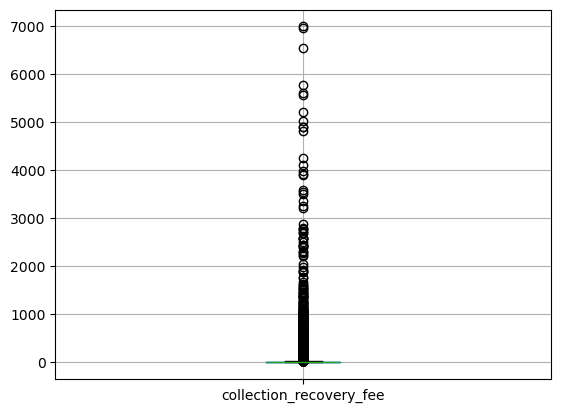

count    5627.000000
mean       87.565940
std       386.590605
min         0.000000
25%         0.000000
50%         2.513200
75%         9.365000
max      7002.190000
Name: collection_recovery_fee, dtype: float64


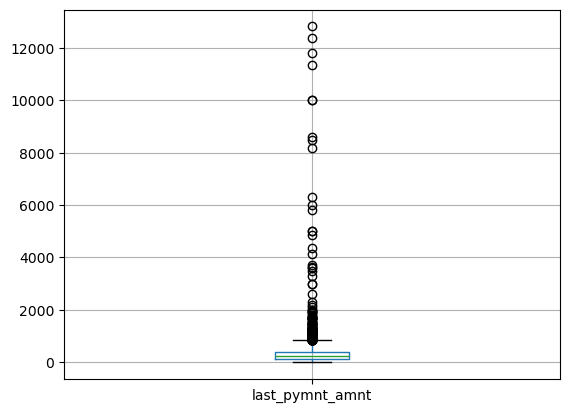

count     5627.000000
mean       326.020833
std        528.983051
min          0.000000
25%        112.885000
50%        238.250000
75%        405.705000
max      12818.380000
Name: last_pymnt_amnt, dtype: float64


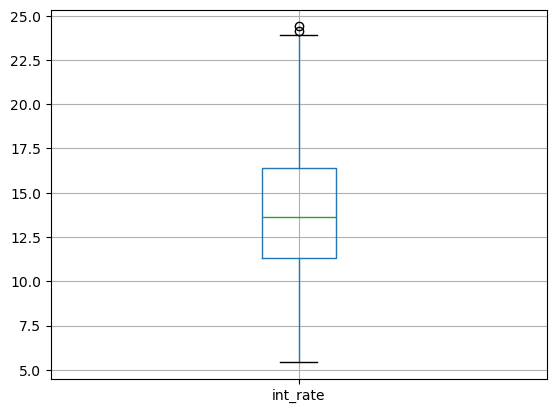

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64


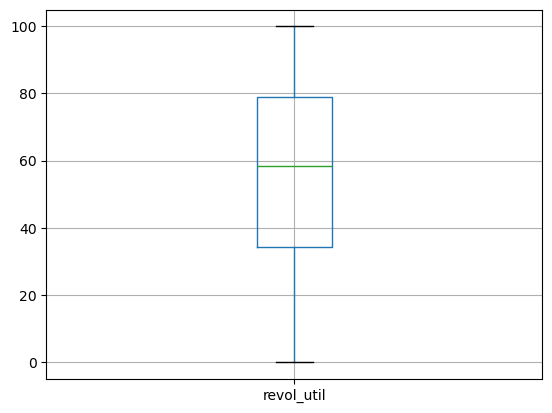

count    5611.000000
mean       55.572110
std        27.905282
min         0.000000
25%        34.400000
50%        58.400000
75%        79.000000
max        99.900000
Name: revol_util, dtype: float64


In [19]:
#checking percentile split for the numerical columns along with the box plots for defaulted customer data
for i in numerical_columns:
    df[df['loan_status']=='Charged Off'].boxplot(column=i)
    plt.show()
    print(df[df['loan_status']=='Charged Off'][i].describe())

In [91]:
#not removing any values as outliers based on the univariate checks as all of them fall within the sensible range around the business rules
#performing basic sense checks to observe if any variables calucations are off

#check to see if funded amount is greater than the loan amount requested
print("Count of records with higher loan amount than requested:",len(df[df['loan_amnt']<df['funded_amnt']]))

#check to see if investor amount is greater than the funded amount:
print("Count of records with higher investor amount than loan:",len(df[df['funded_amnt']<df['funded_amnt_inv']]))

#check if any of the historical date columns are more than the current date
for i in ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']:
      print("Count of records with higher historical dates than current date for",i,":", df[i].apply(lambda x: False if x<current_date else True).sum())


Count of records with higher loan amount than requested: 0
Count of records with higher investor amount than loan: 0
Count of records with higher historical dates than current date for issue_d : 0
Count of records with higher historical dates than current date for earliest_cr_line : 90
Count of records with higher historical dates than current date for last_pymnt_d : 71
Count of records with higher historical dates than current date for last_credit_pull_d : 2


In [93]:
#removing the records with the date higher than current date for historical dates
for i in ['earliest_cr_line','last_pymnt_d','last_credit_pull_d']:
    df=df[df[i]<current_date]


### Data Exploration section 
Comprises the univariate analysis (including univariate segmented) along with the bivariate checks across all the numerical and categorical variables

In [21]:
#performing frequency checks across the customers for all the categorical variables for overall and default customers
for i in categorical_columns:
    if i not in ['member_id','id']:
        #Creating a combined table across the 3 cohorts of data
        res=df.groupby(i).agg({'id':'count'}).reset_index().rename(columns={'id':'over_val'}).merge(df[df['loan_status']=='Charged Off'].groupby(i).agg({'id':'count'}).reset_index().rename(columns={'id':'def_val'}),on=i).merge(df[df['loan_status']!='Charged Off'].groupby(i).agg({'id':'count'}).reset_index().rename(columns={'id':'non_def_val'}),on=i)
        
        #calculating the total values across the respective fields
        total_overall=res['over_val'].sum()
        total_default=res['def_val'].sum()
        total_nondefault=res['non_def_val'].sum()
        
        #calculating the null percentage values
        res['perc_overall']=(res['over_val']/total_overall)*100
        res['perc_default']=(res['def_val']/total_default)*100
        res['perc_nondefault']=(res['non_def_val']/total_nondefault)*100
        print(res[[i,'over_val','perc_overall','perc_default','perc_nondefault']])

##################             Synthesis                 ####################

#Most of the metrics have same same distribution across overall and default customers except for the term and the grade (and consequently sub-grade) dimensions
#In-depth analysis of the variable to create insights will be done in later in the notebook

         term  over_val  perc_overall  perc_default  perc_nondefault
0   36 months     29096     73.258302     57.348498        75.884424
1   60 months     10621     26.741698     42.651502        24.115576
  grade  over_val  perc_overall  perc_default  perc_nondefault
0     A     10085     25.392149     10.698418        27.817542
1     B     12020     30.264119     25.324329        31.079495
2     C      8098     20.389254     23.938155        19.803461
3     D      5307     13.362036     19.868491        12.288061
4     E      2842      7.155626     12.706593         6.239366
5     F      1049      2.641186      5.669095         2.141390
6     G       316      0.795629      1.794917         0.630683
   sub_grade  over_val  perc_overall  perc_default  perc_nondefault
0         A1      1139      2.867790      0.533144         3.253153
1         A2      1508      3.796863      1.315088         4.206512
2         A3      1810      4.557242      1.830460         5.007334
3         A4     

Frequency distribution of delinq_2yrs


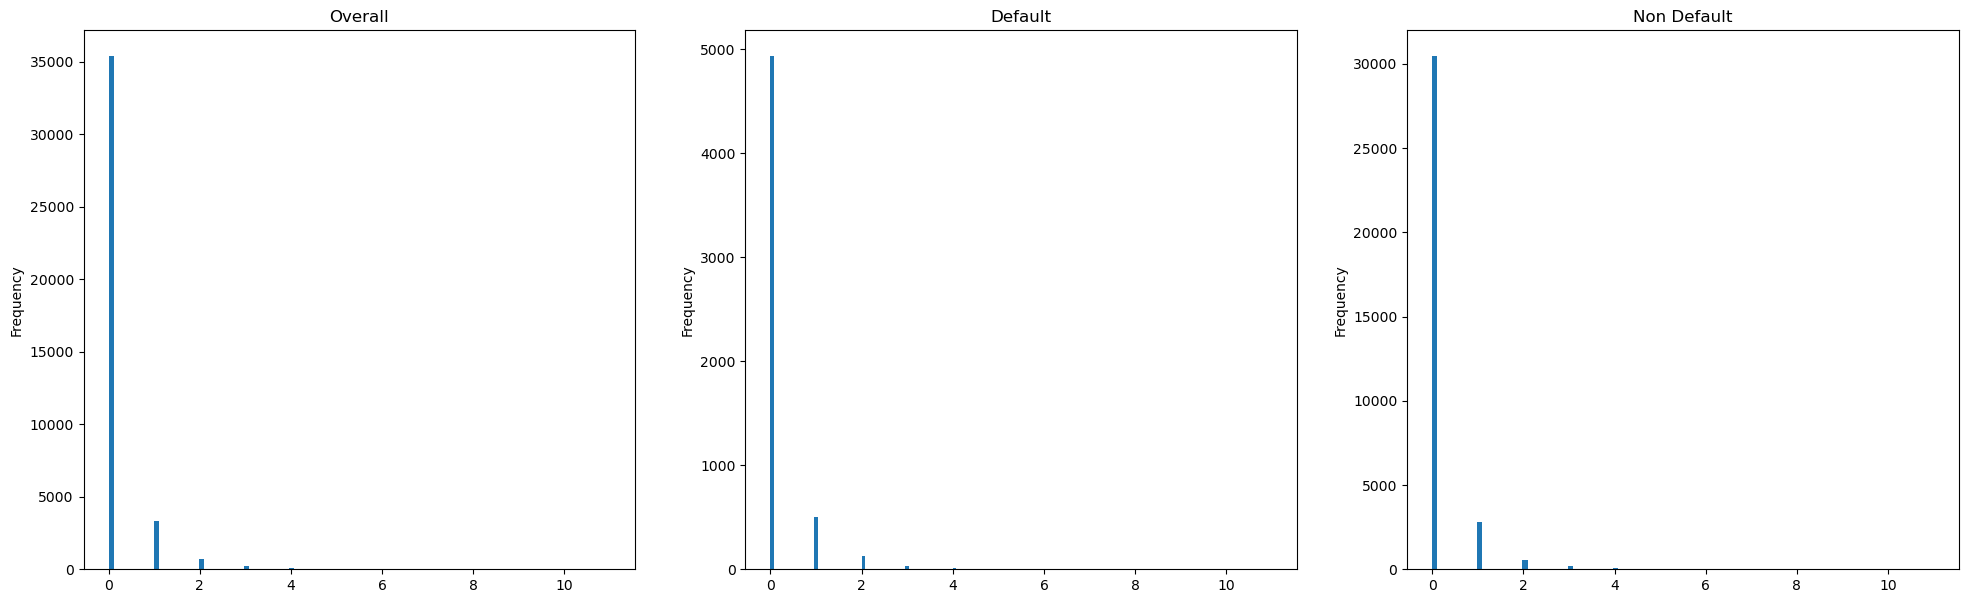

Frequency distribution of inq_last_6mths


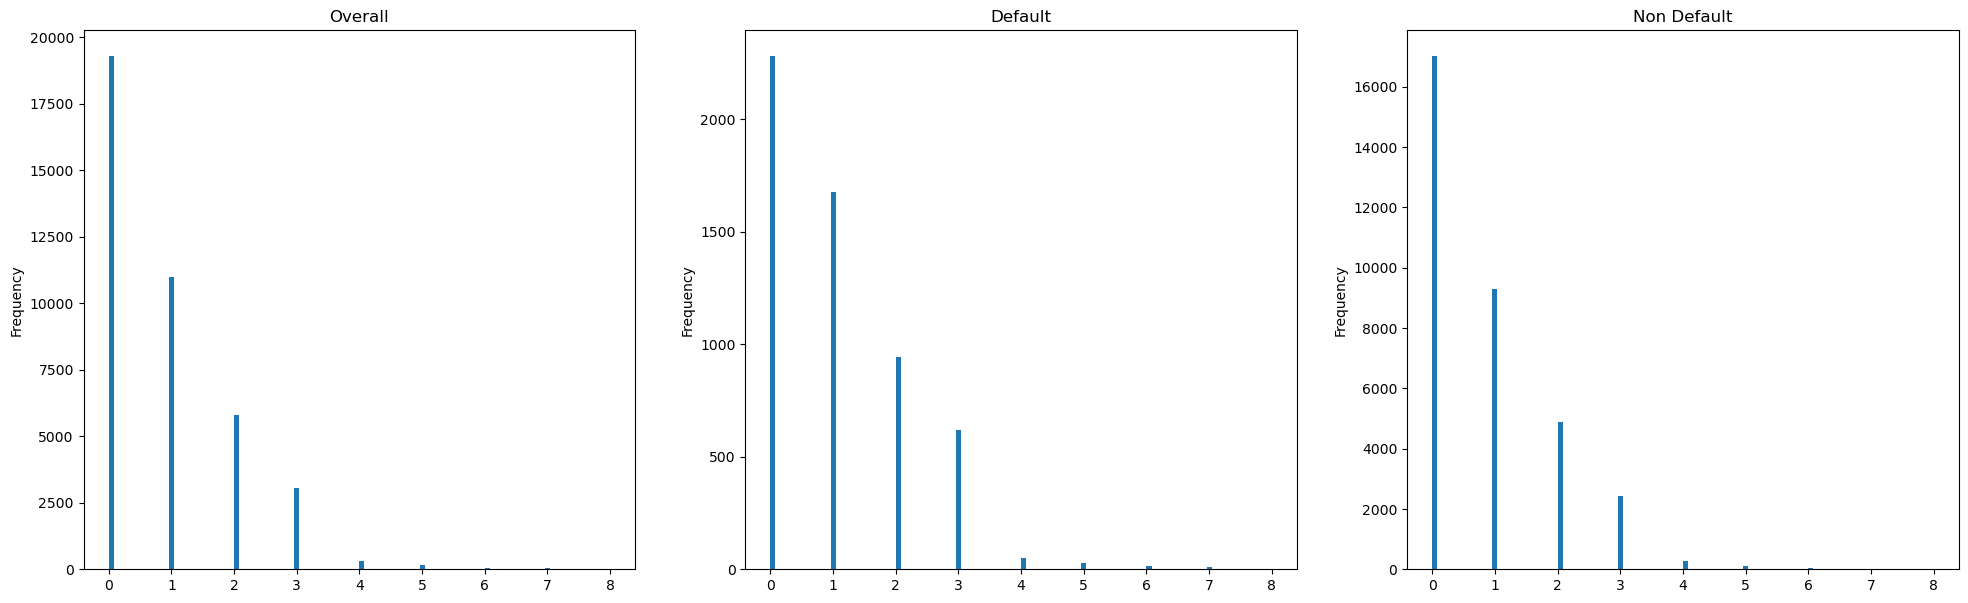

Frequency distribution of pub_rec


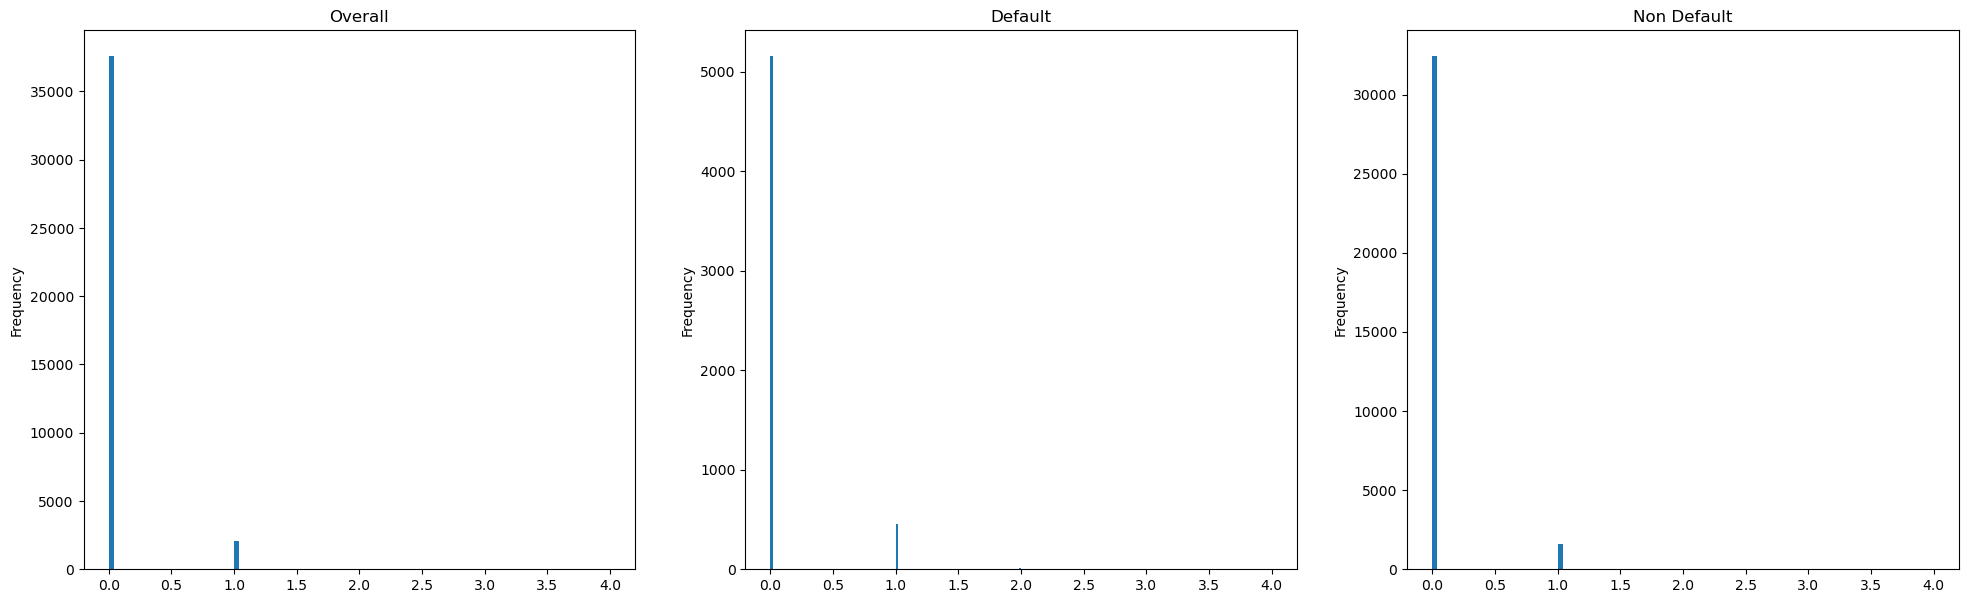

Frequency distribution of pub_rec_bankruptcies


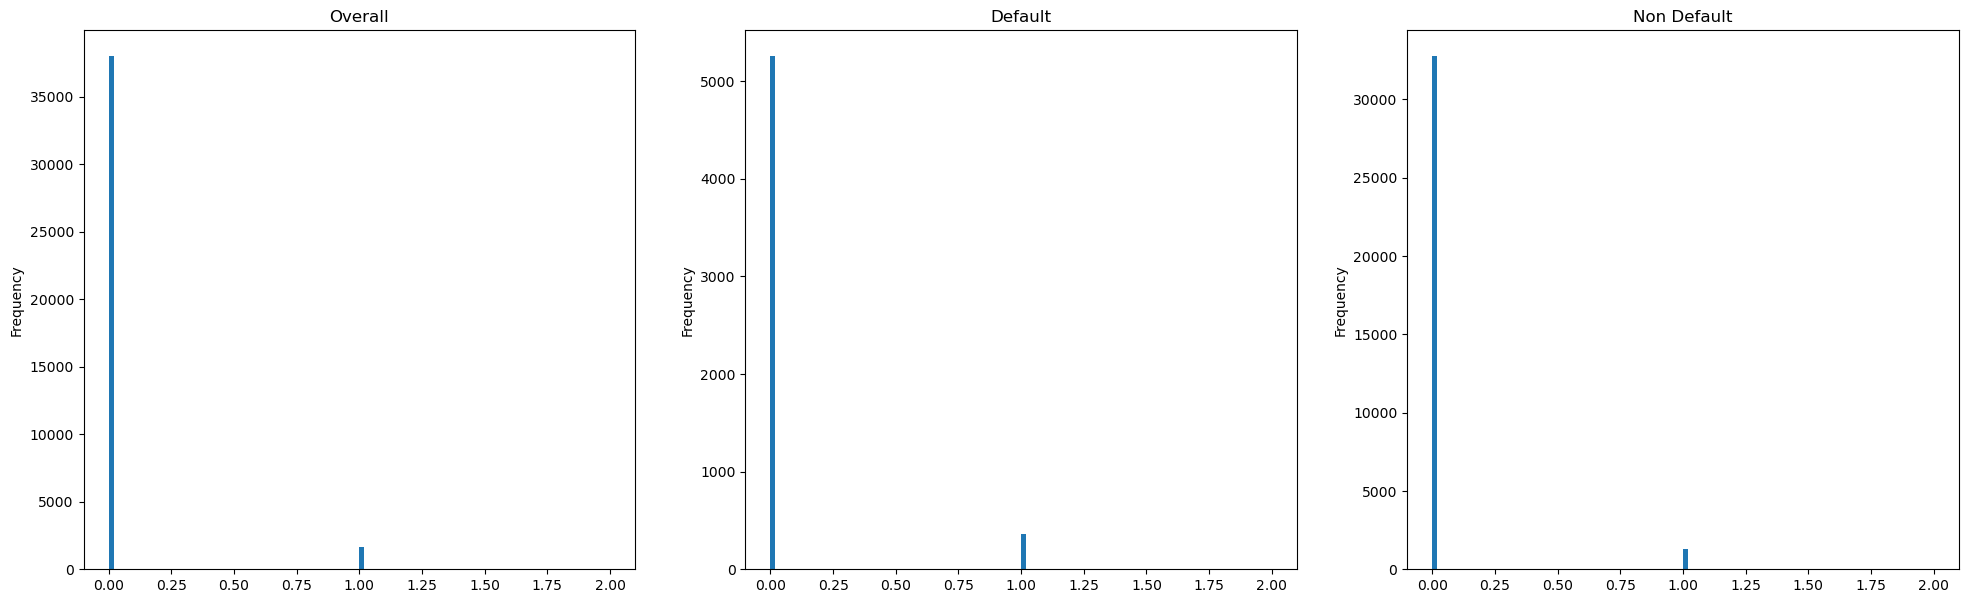

Frequency distribution of loan_amnt


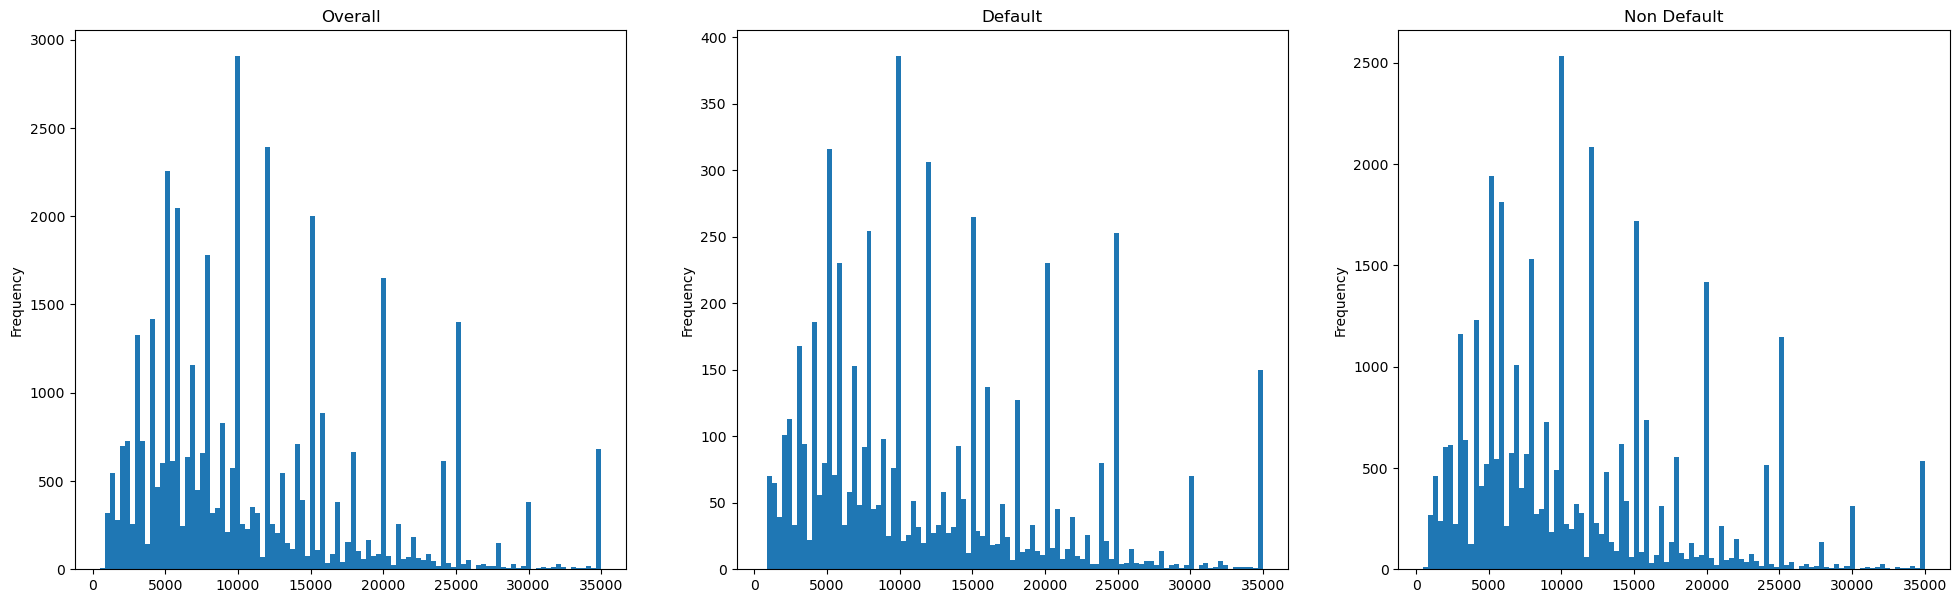

Frequency distribution of funded_amnt


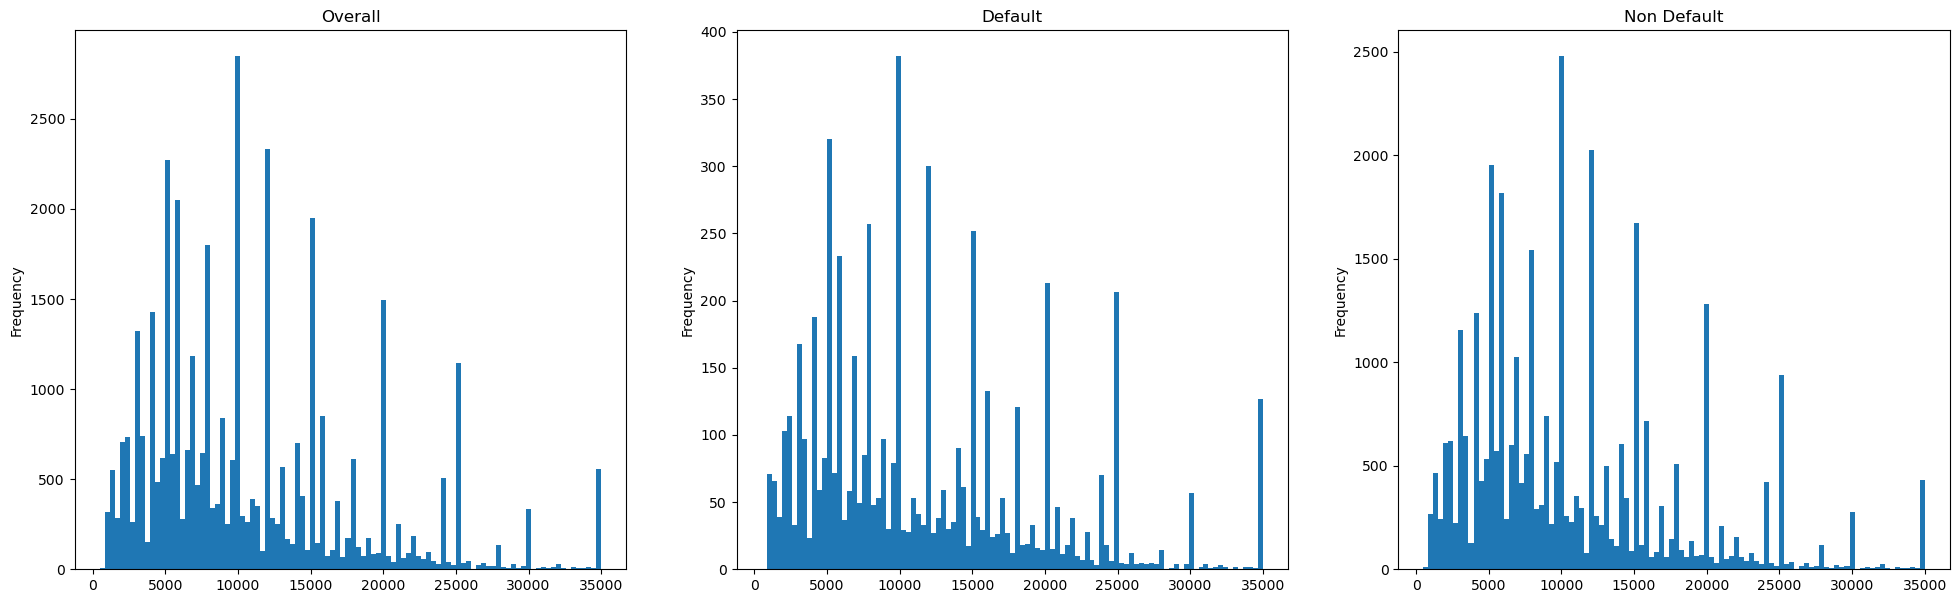

Frequency distribution of funded_amnt_inv


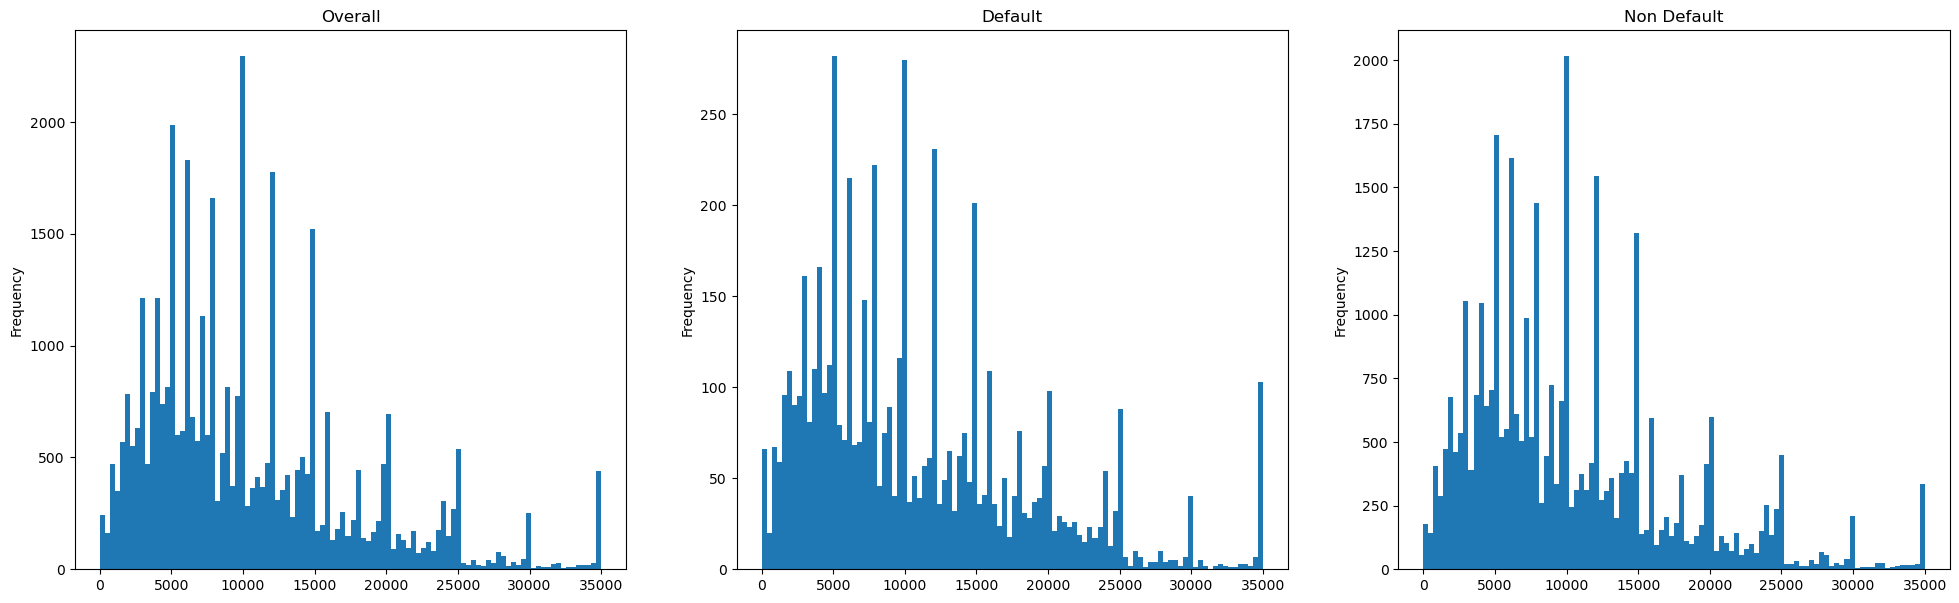

Frequency distribution of installment


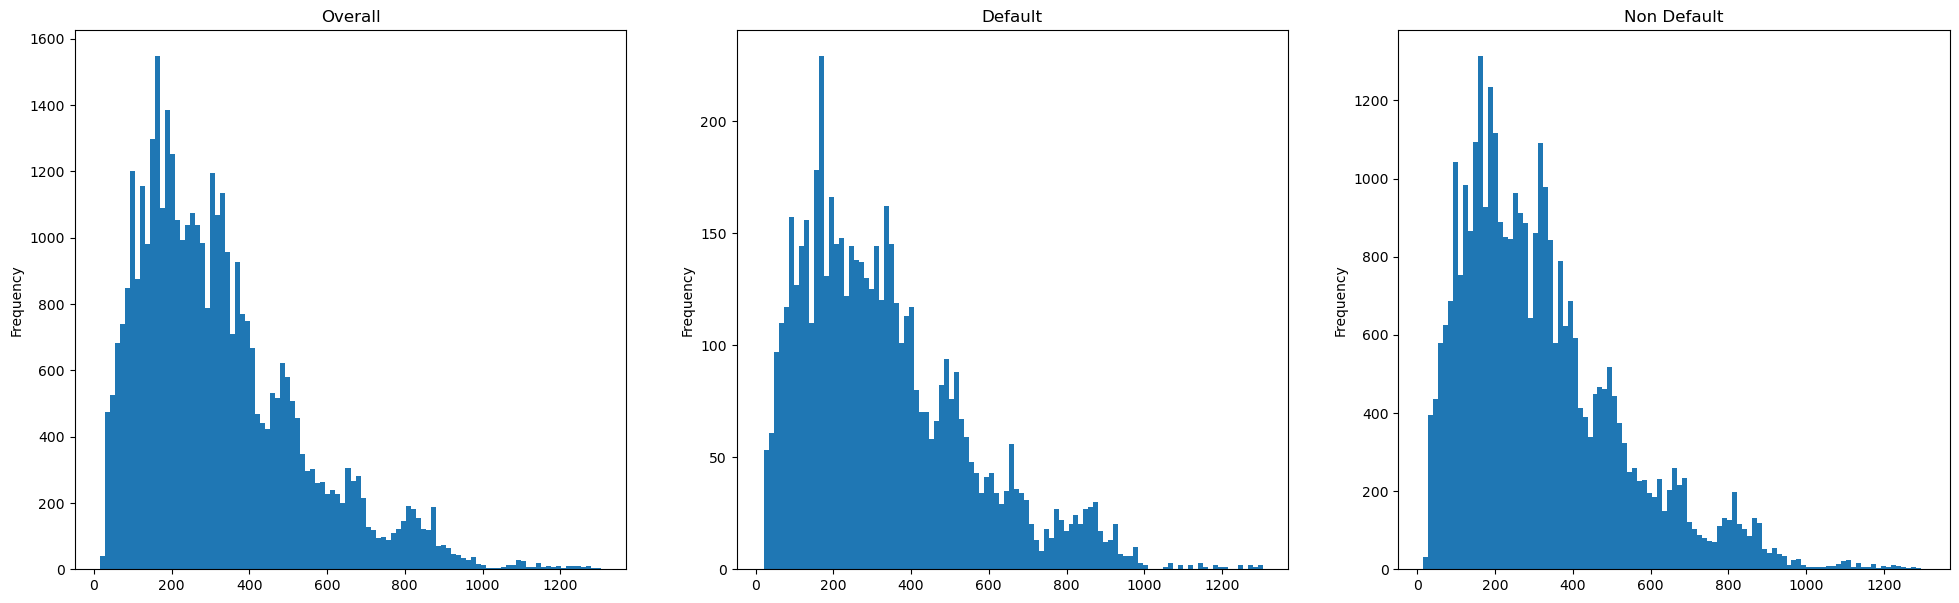

Frequency distribution of annual_inc


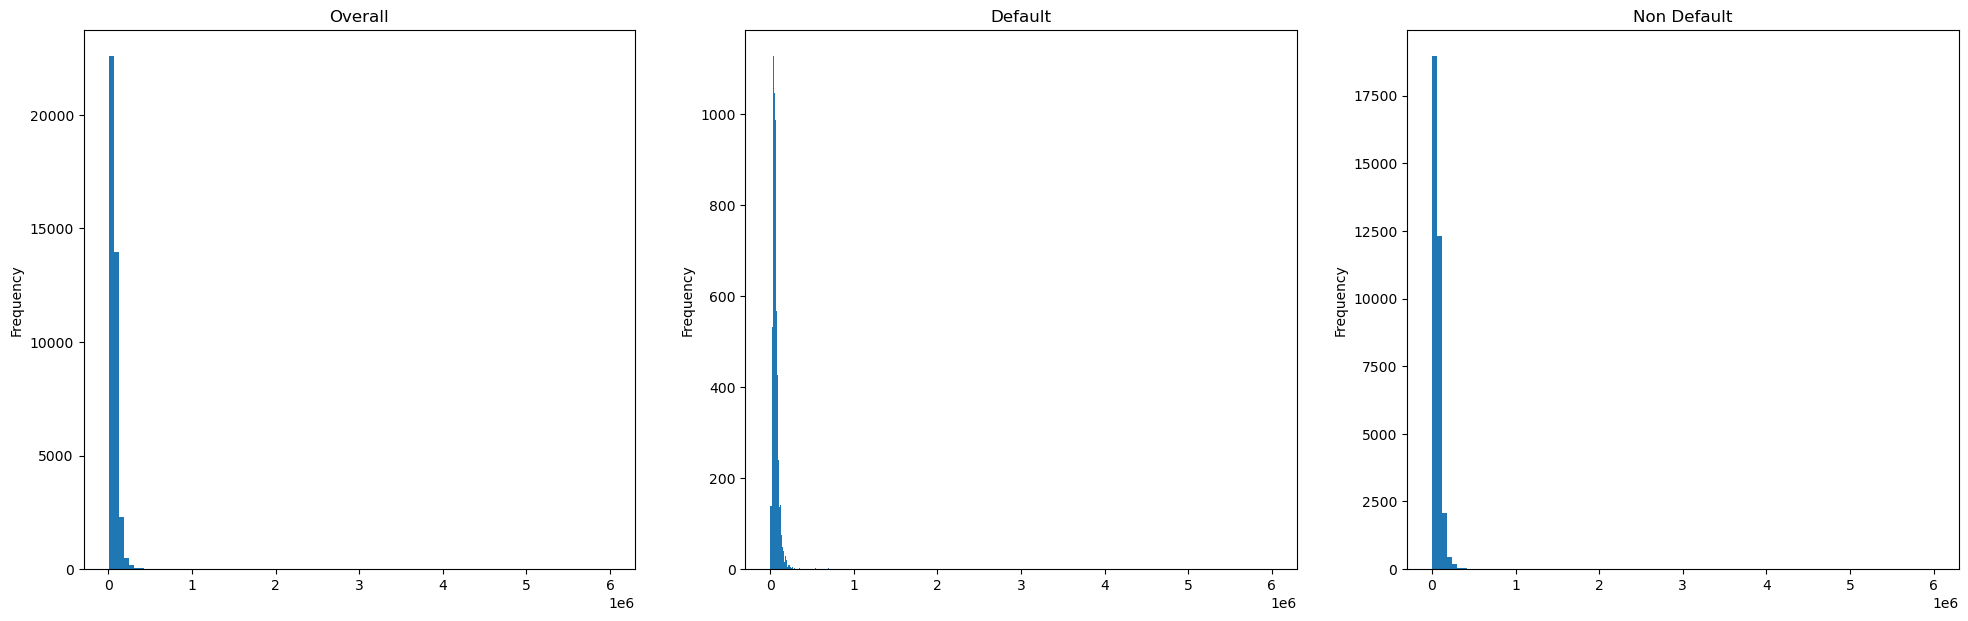

Frequency distribution of dti


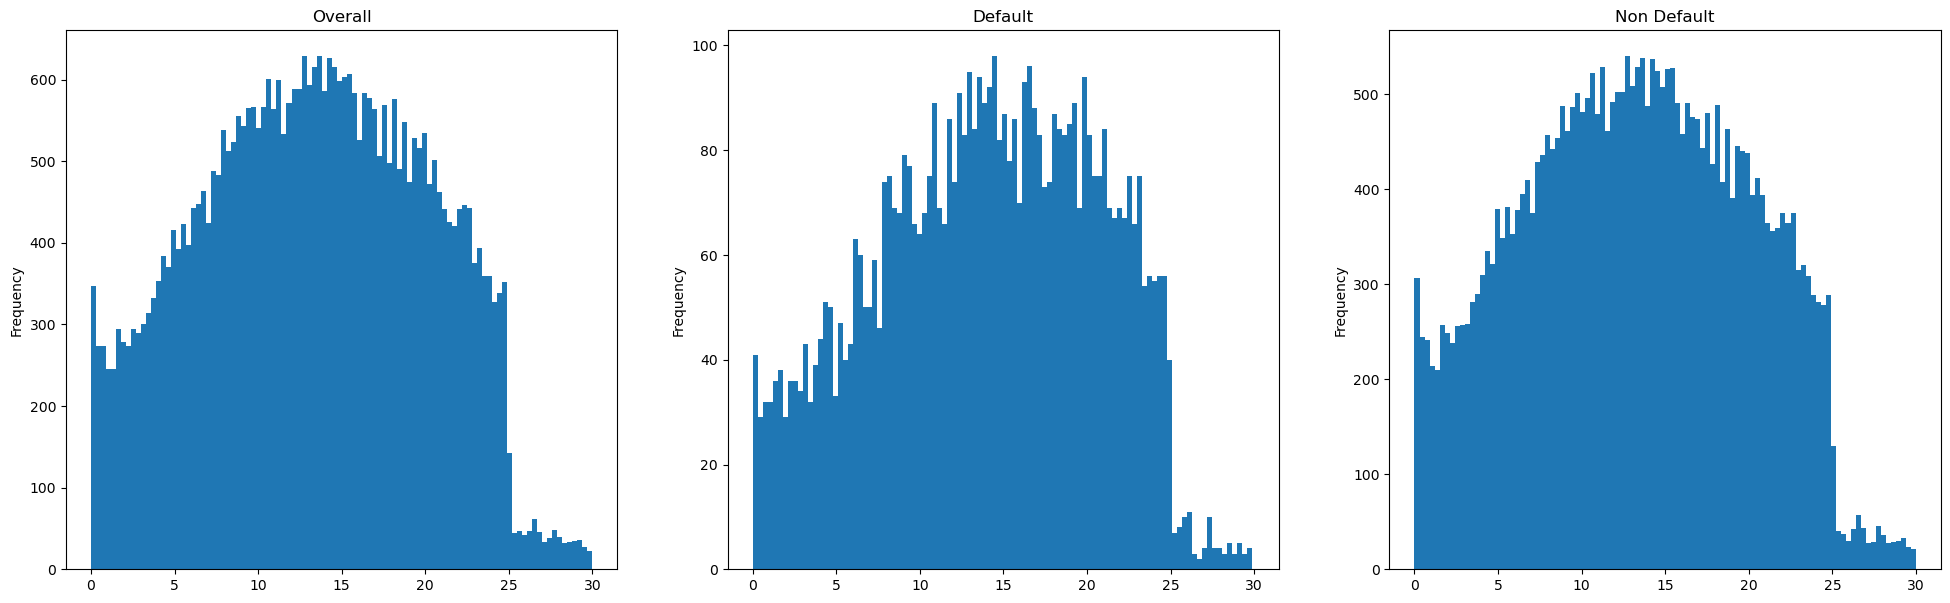

Frequency distribution of open_acc


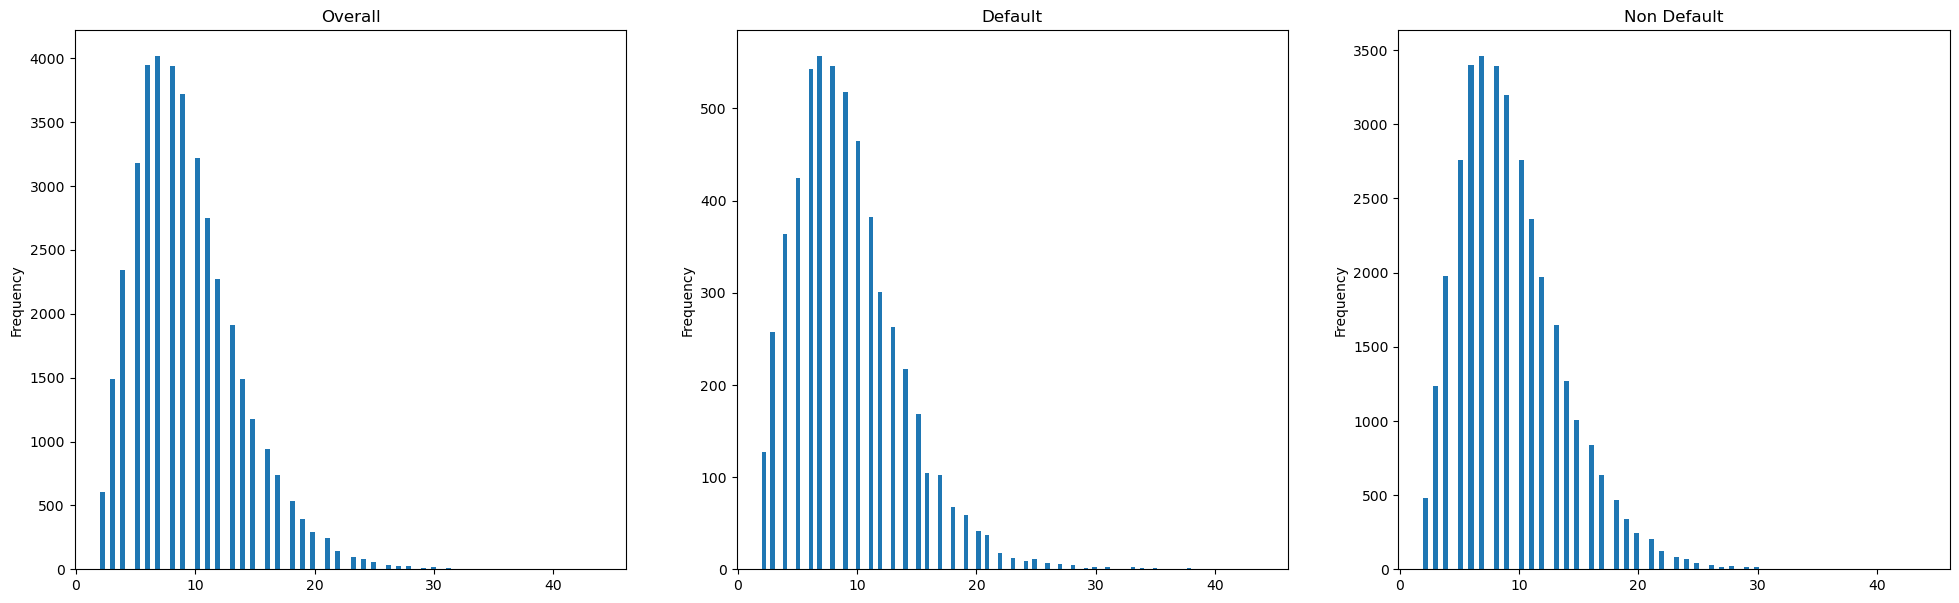

Frequency distribution of revol_bal


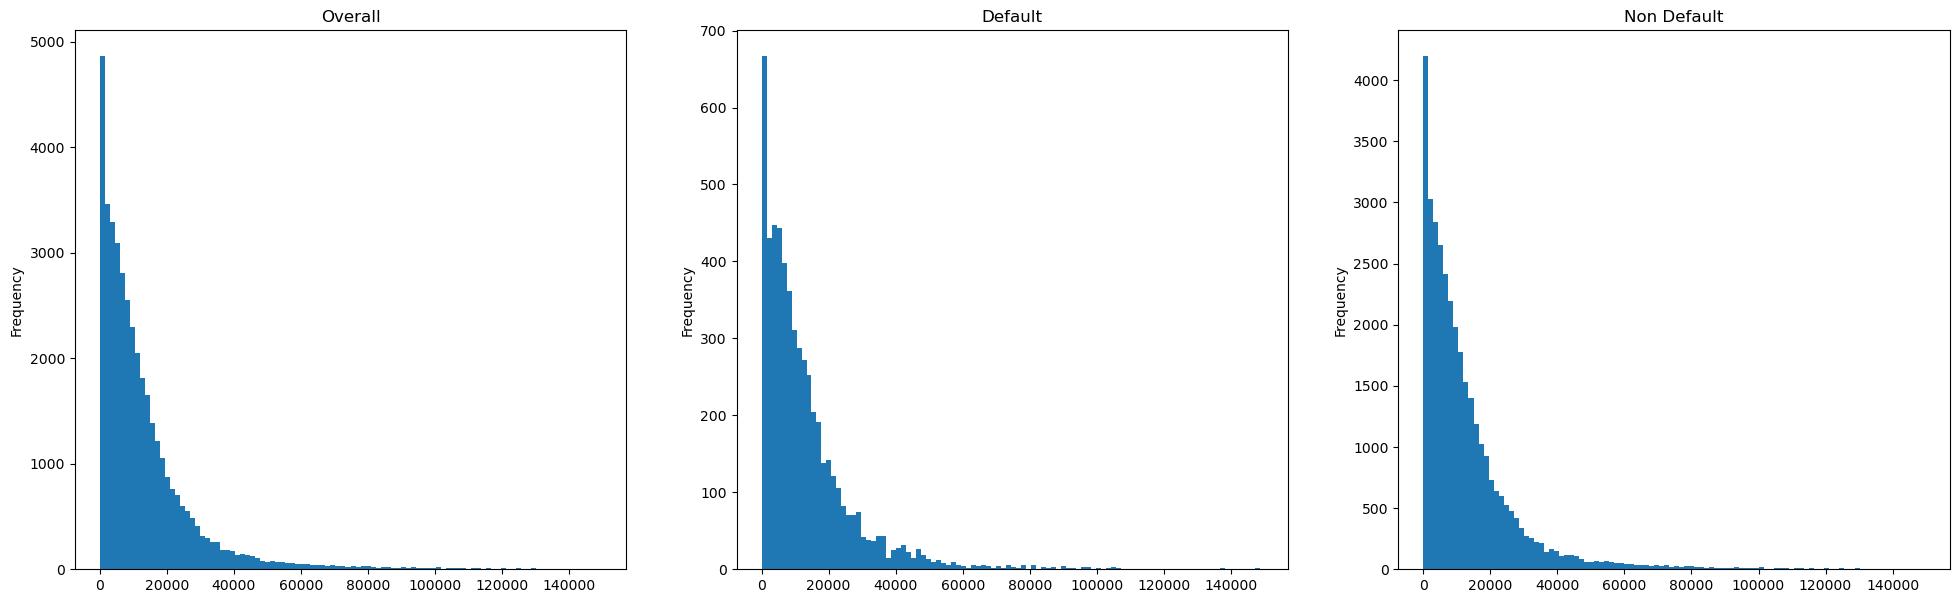

Frequency distribution of total_acc


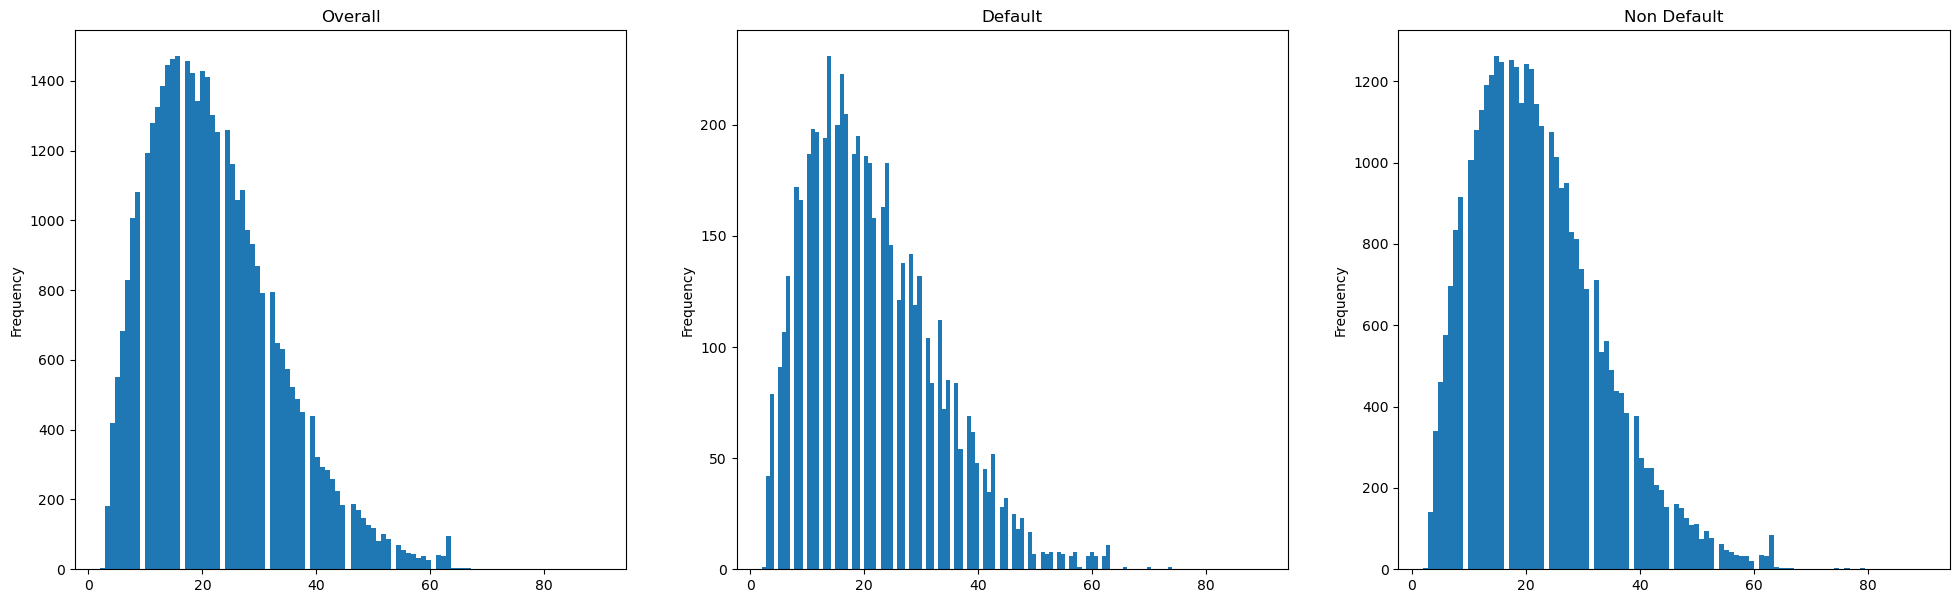

Frequency distribution of out_prncp


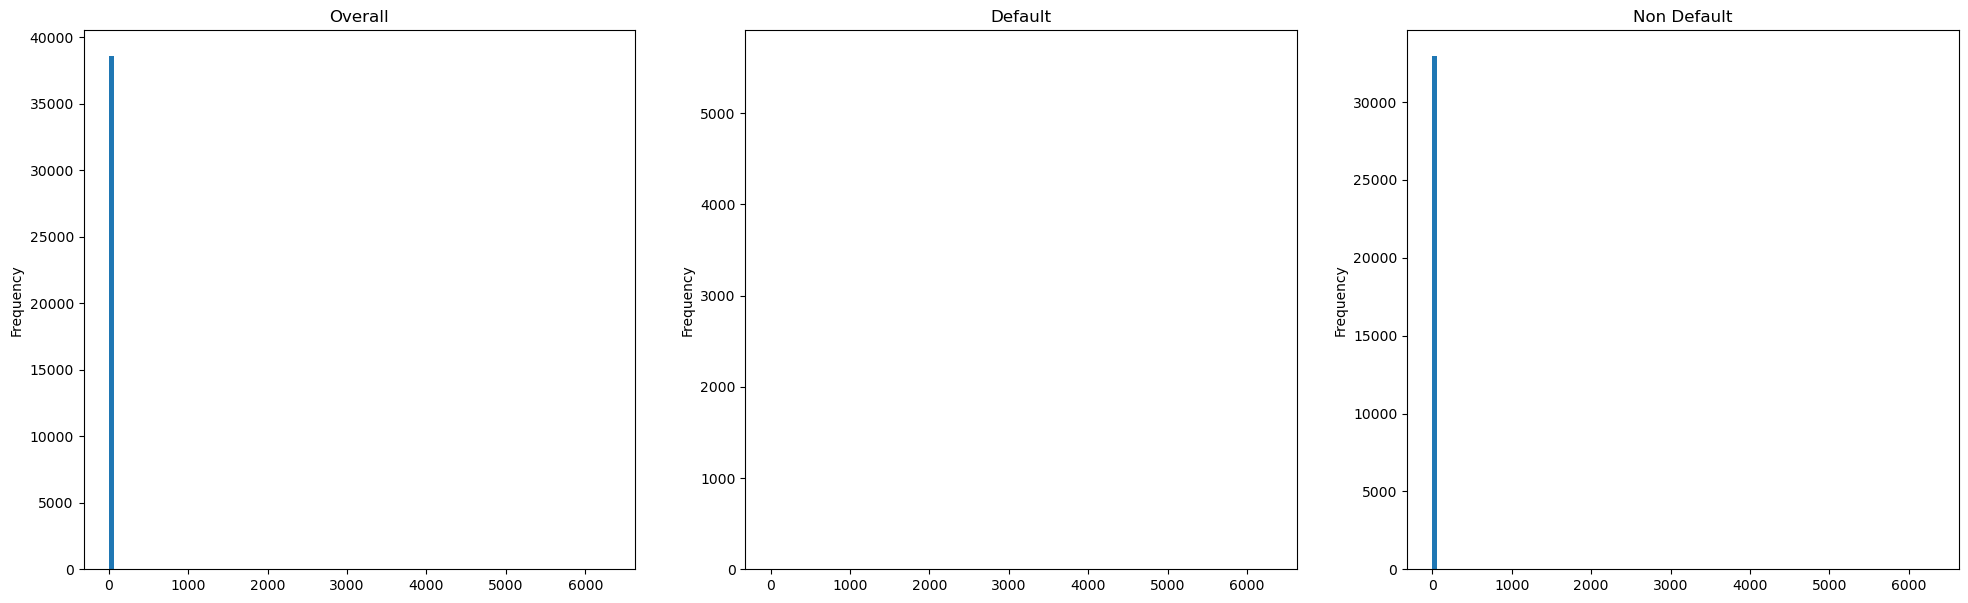

Frequency distribution of out_prncp_inv


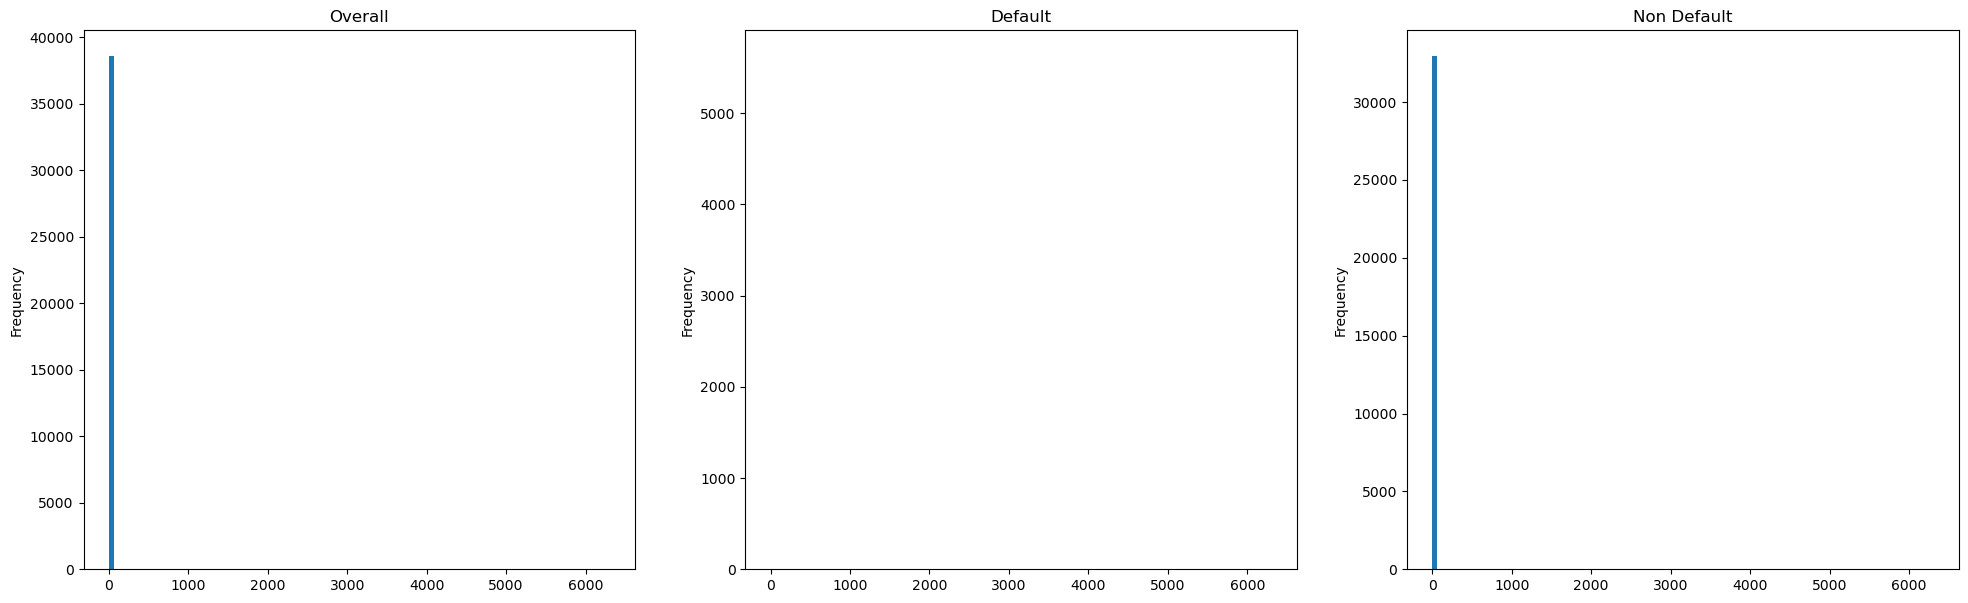

Frequency distribution of total_pymnt


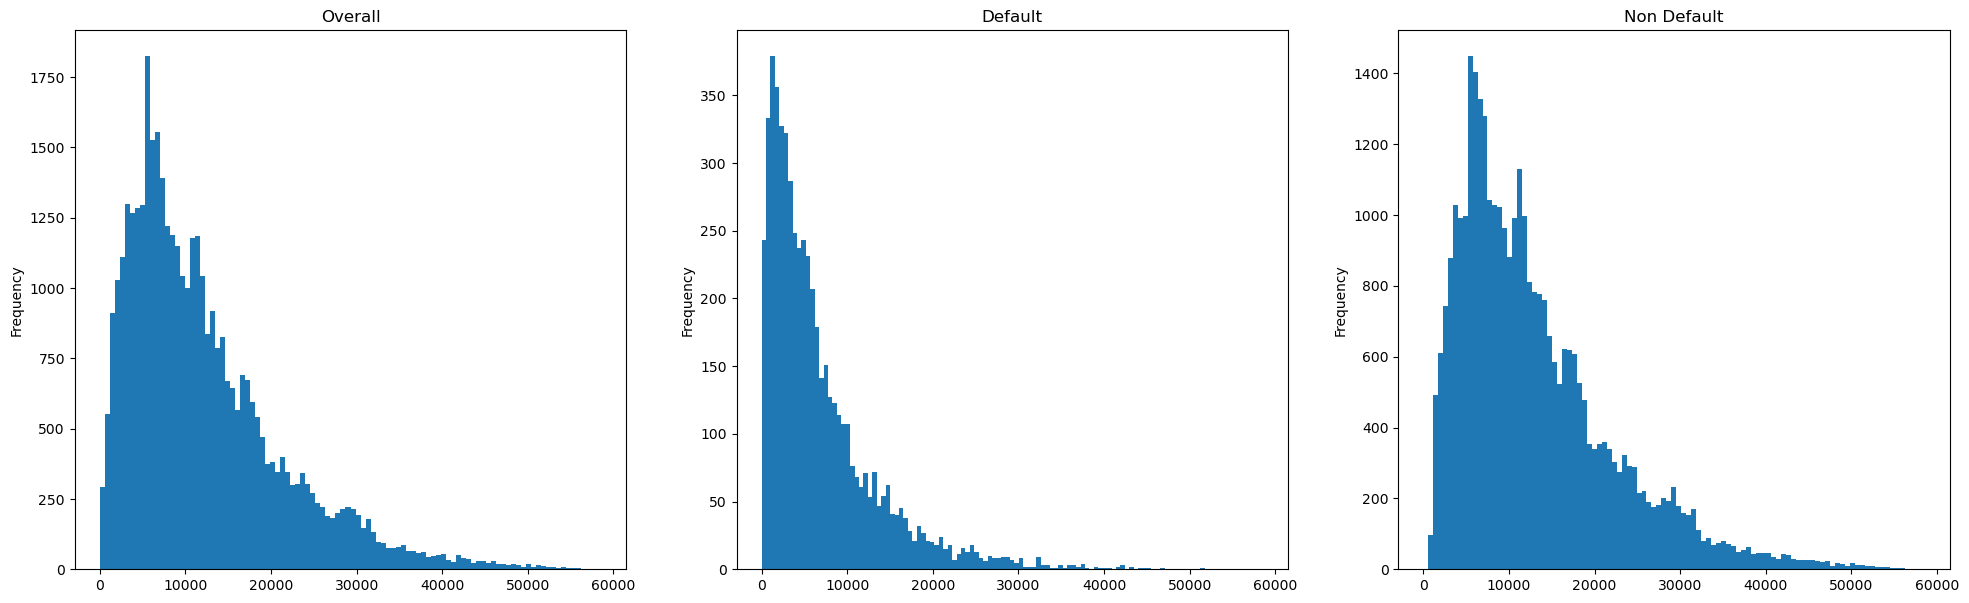

Frequency distribution of total_pymnt_inv


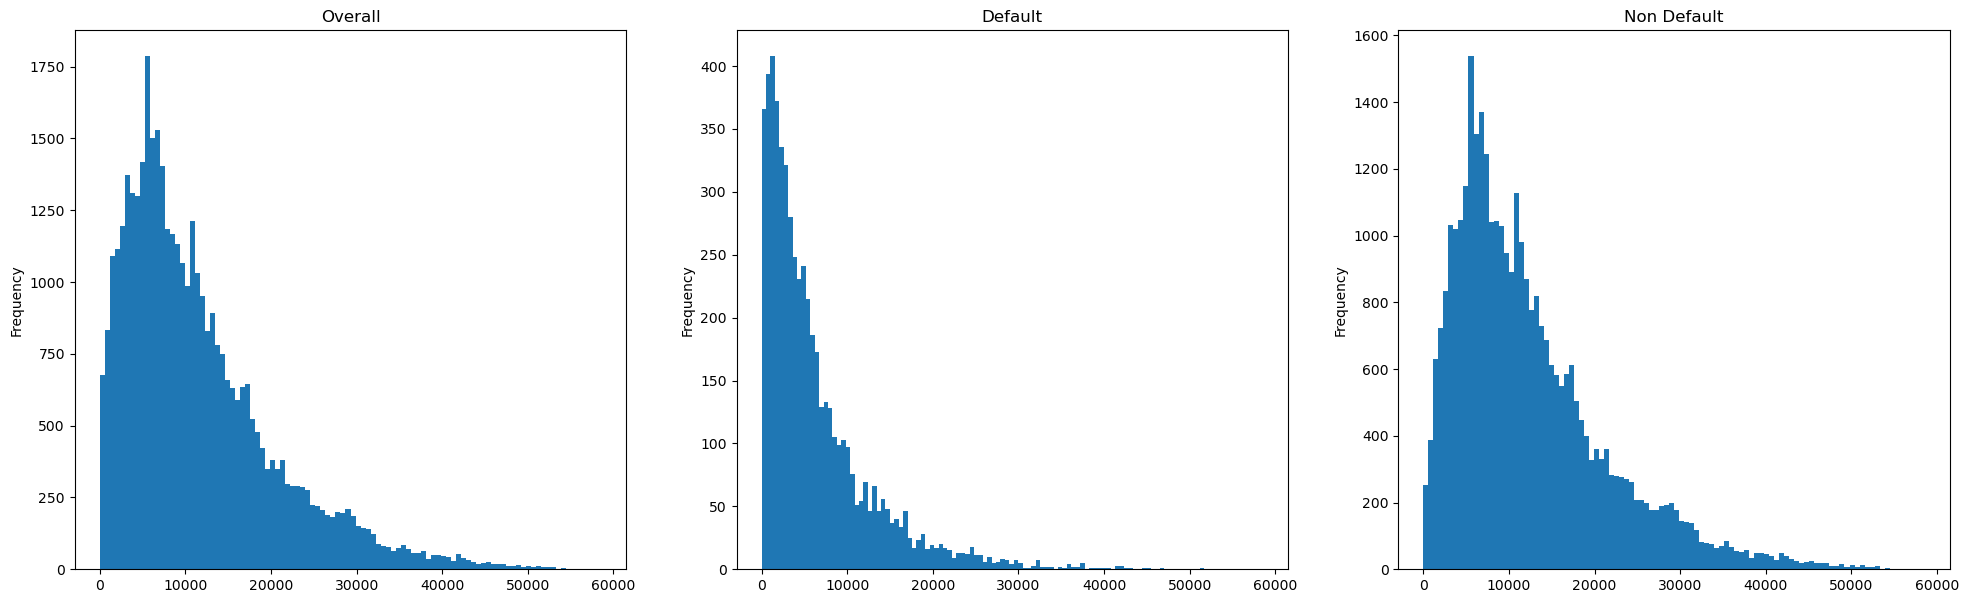

Frequency distribution of total_rec_prncp


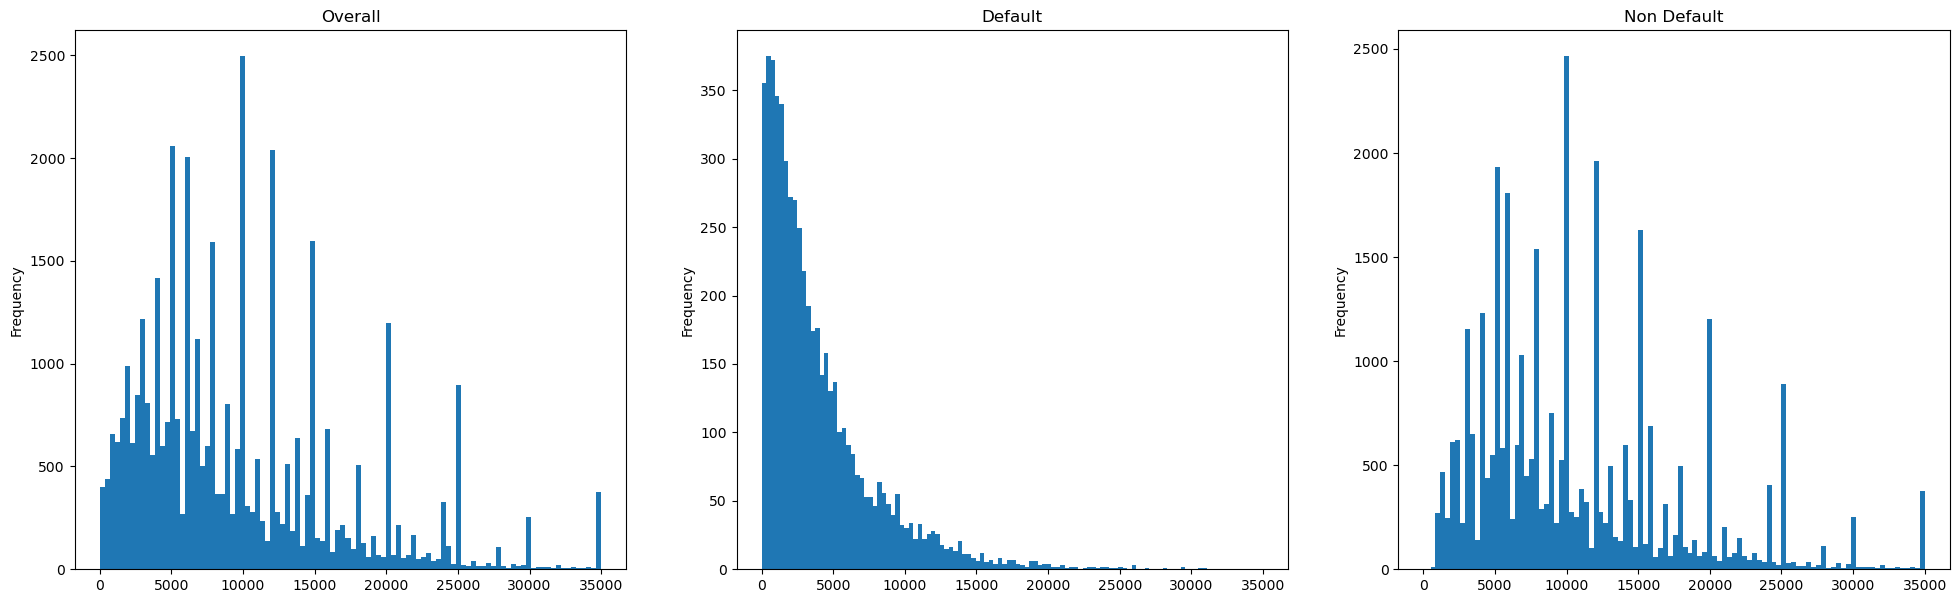

Frequency distribution of total_rec_int


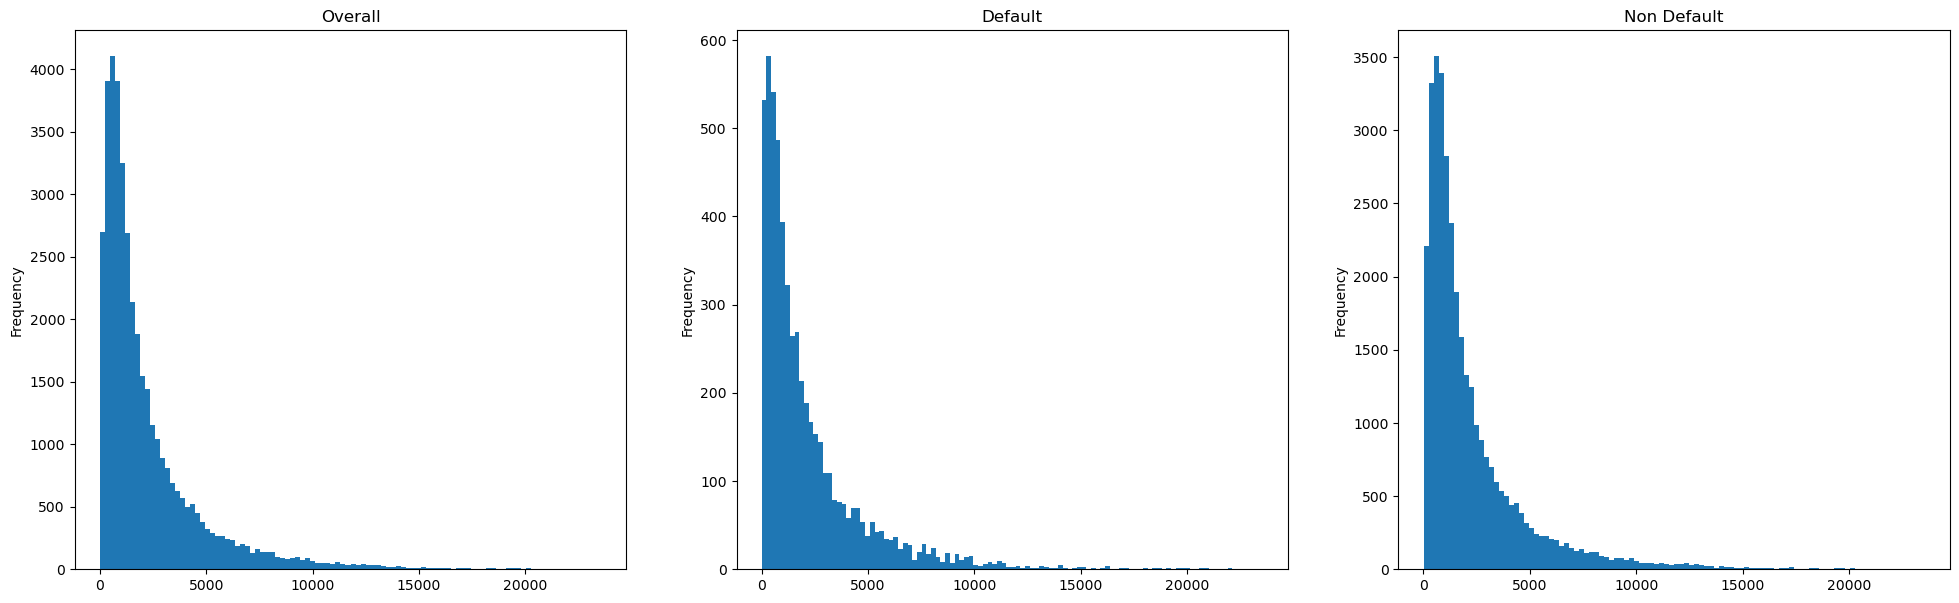

Frequency distribution of total_rec_late_fee


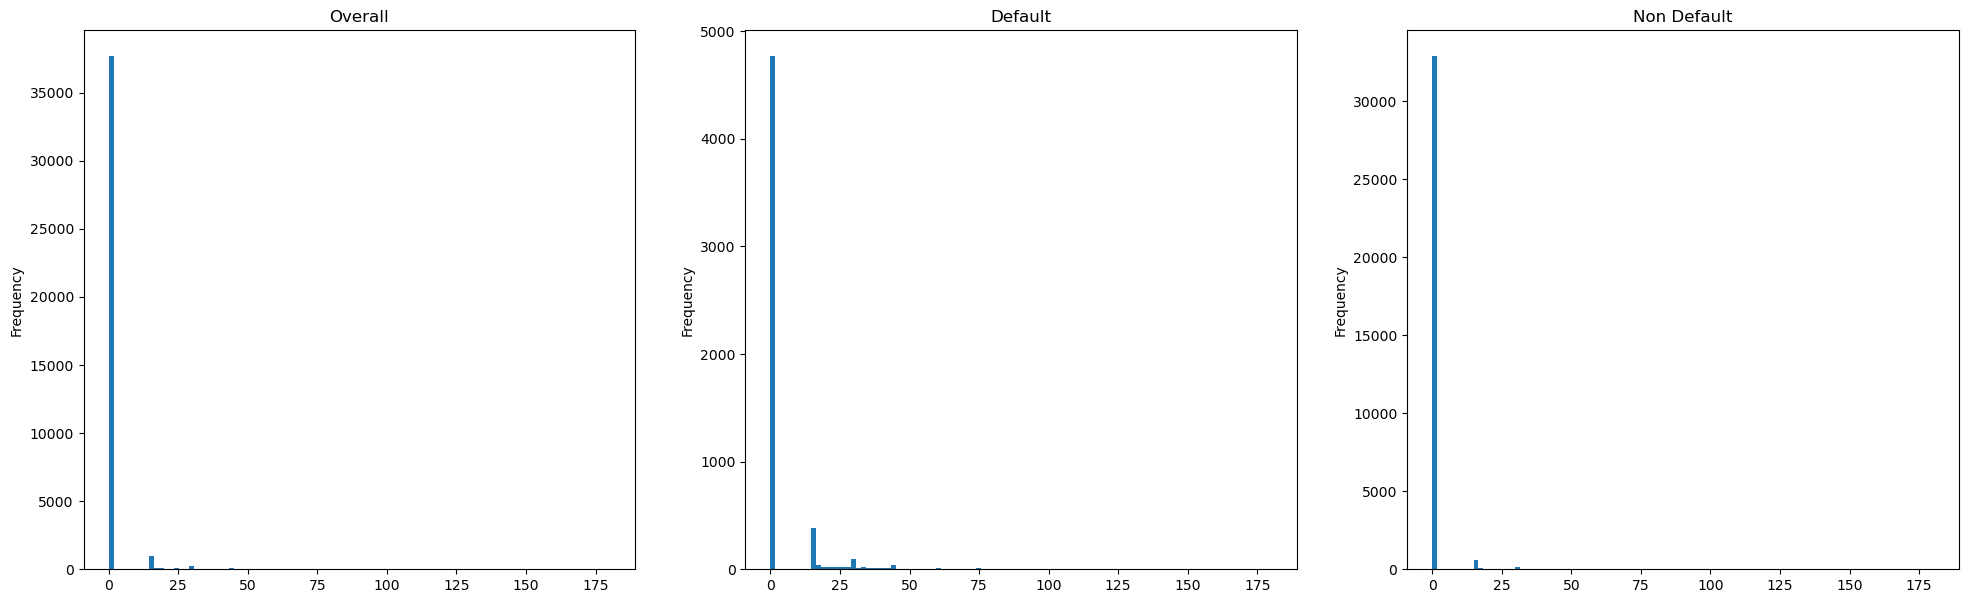

Frequency distribution of recoveries


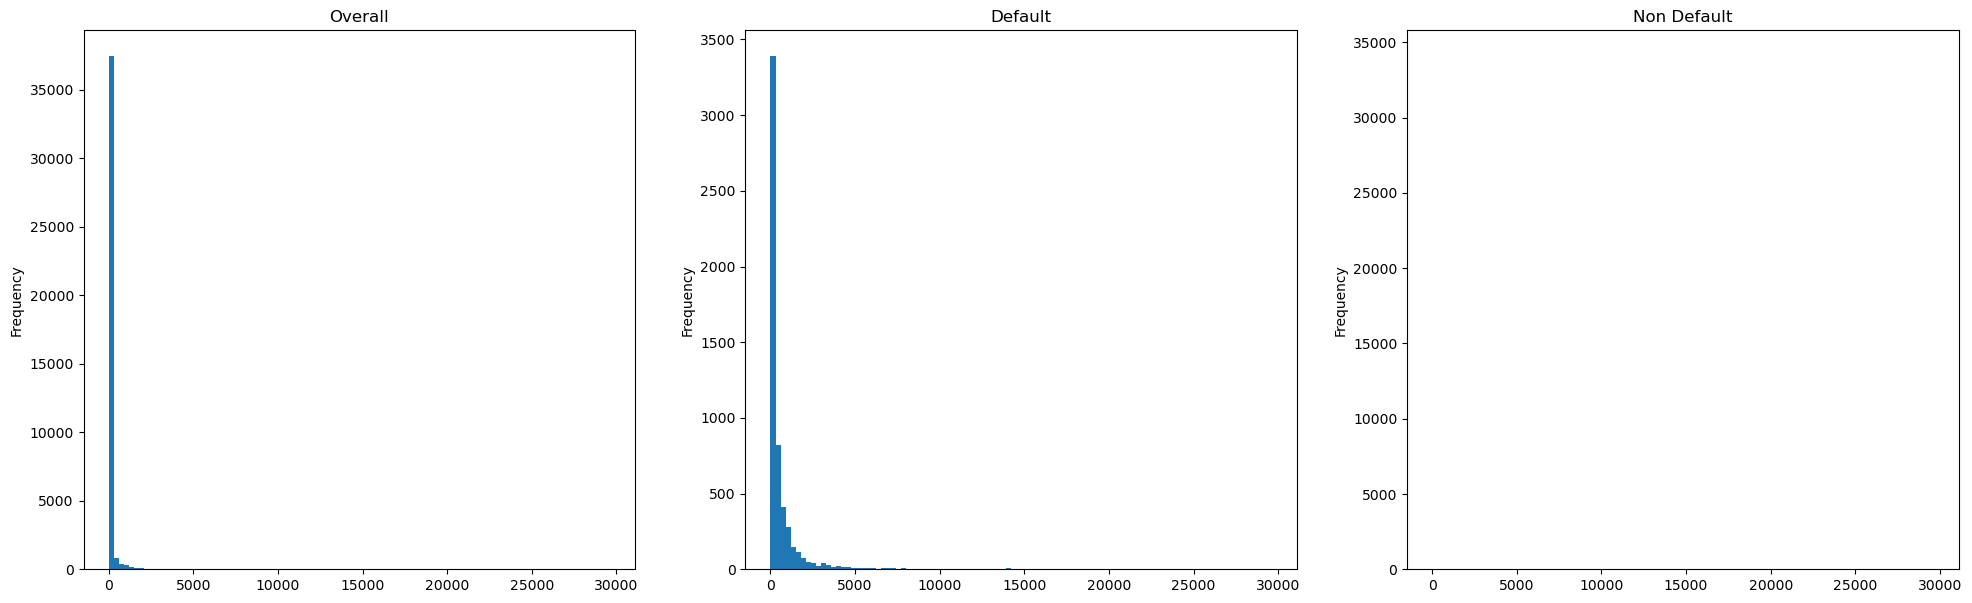

Frequency distribution of collection_recovery_fee


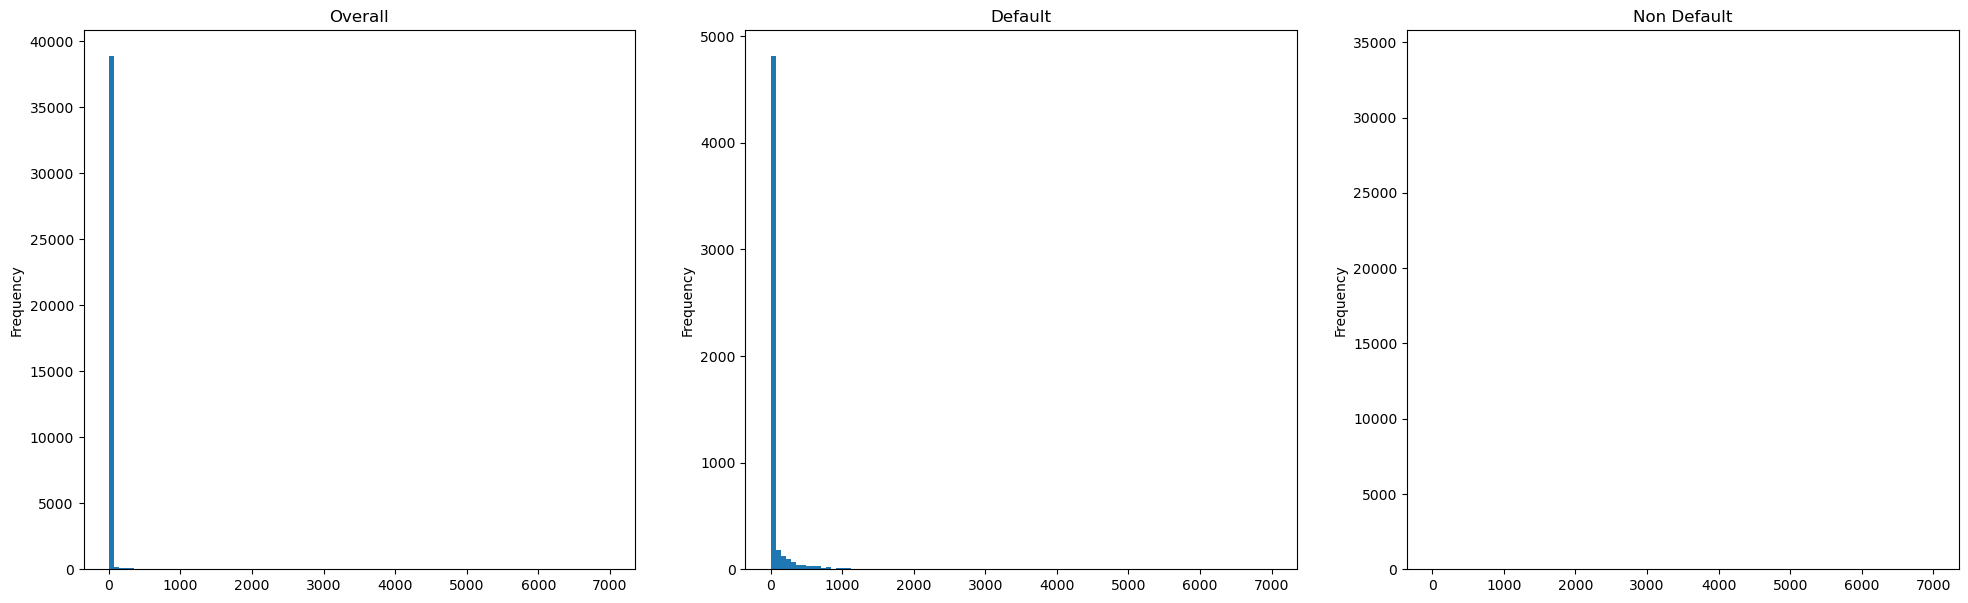

Frequency distribution of last_pymnt_amnt


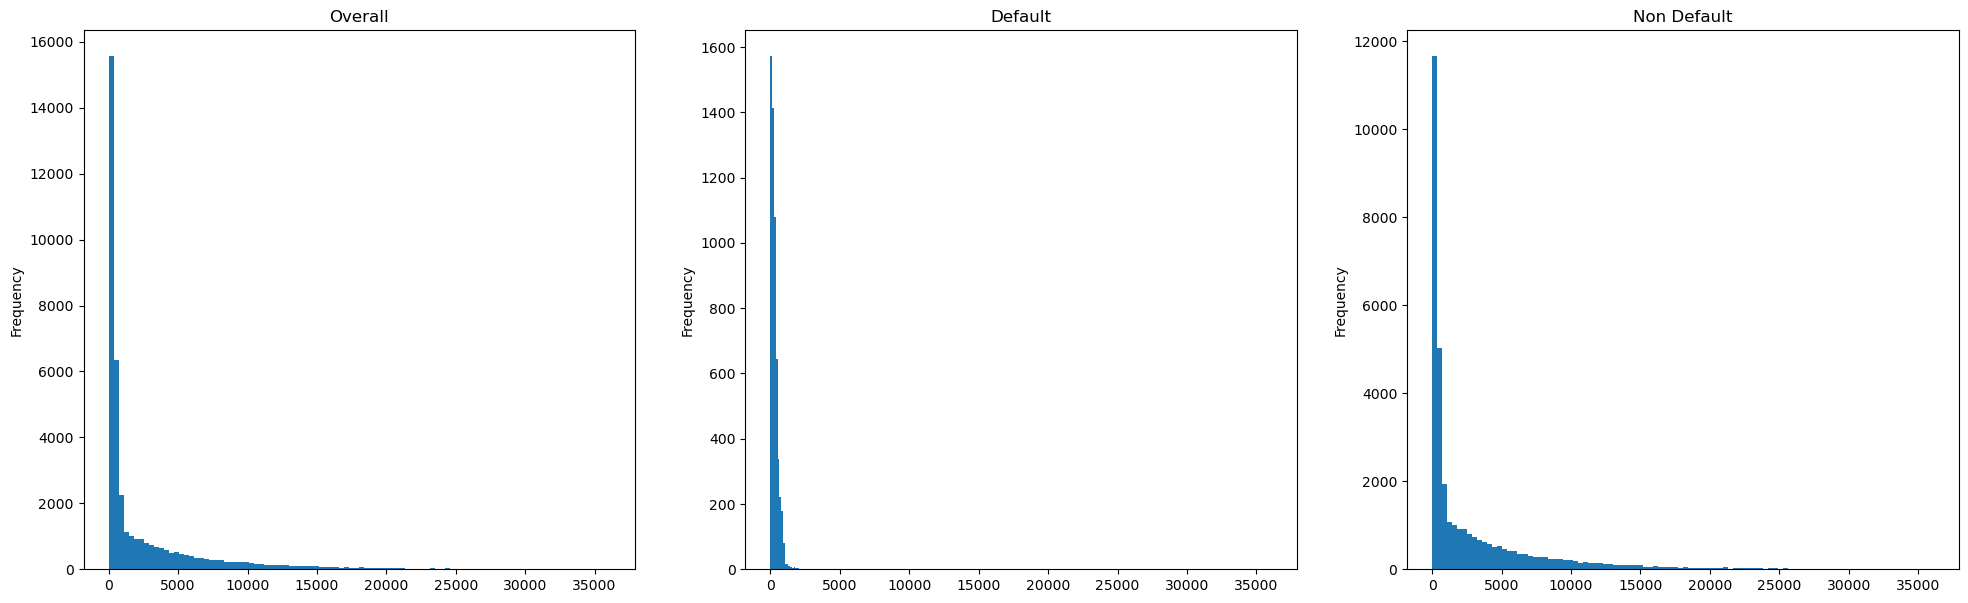

Frequency distribution of int_rate


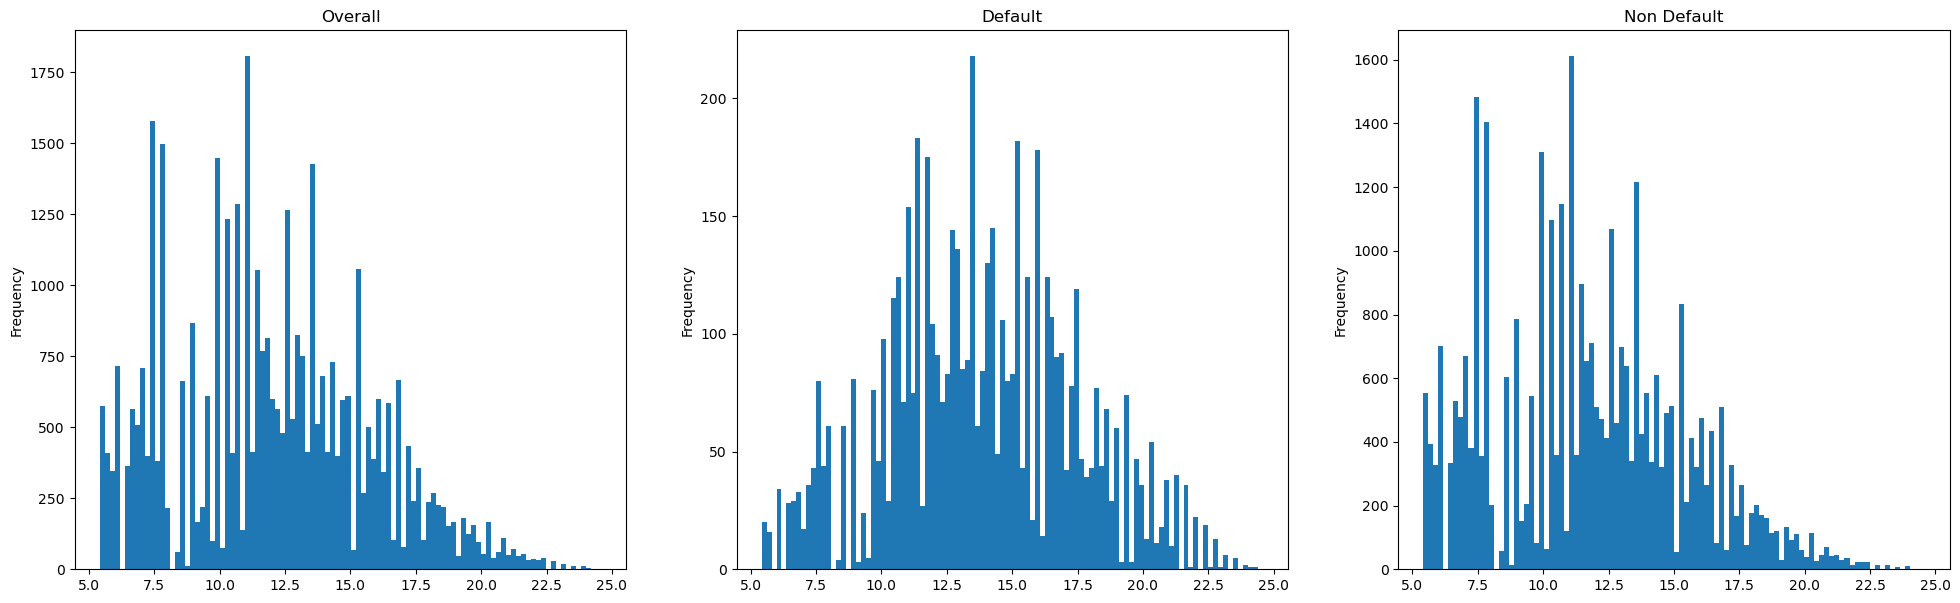

Frequency distribution of revol_util


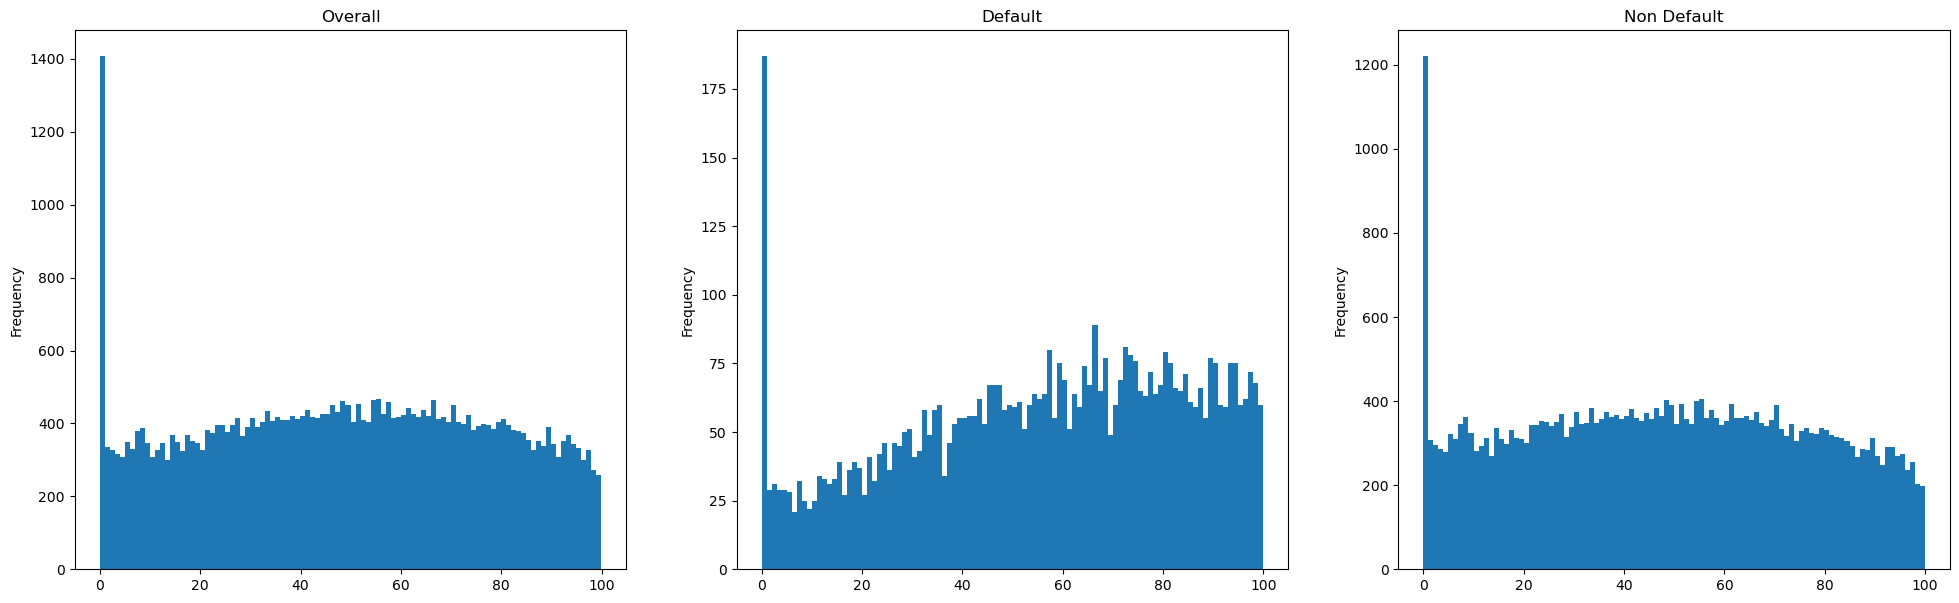

In [22]:
#performing distribution checks across the numerical variables
for i in numerical_columns:
    #Creating a subplot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7), sharey=False,sharex=True)
    
    #Creating the overall freq plot
    df[i].plot(kind='hist',ax=axes[0], bins=100, title='Overall')
    
    #Creating the default freq plot
    df[df['loan_status']=='Charged Off'][i].plot(kind='hist',ax=axes[1], bins=100, title='Default')
    
    #creating the non default freq plot
    df[df['loan_status']!='Charged Off'][i].plot(kind='hist',ax=axes[2], bins=100, title='Non Default')
    print("Frequency distribution of",i)
    
    #adjusting the space beside the plot
    plt.subplots_adjust(right=2)
    plt.show()

##################             Synthesis                 ####################

#as evident by the distribution there is no significant distribution variation for most of the numerical metrics across the cohorts
#There is a difference observed in disribution for loan_amnt, int_rate and last_pymnt_amnt
#further exploration on the above metrics will be done on the above metrics in later section

Aggregate distribution of delinq_2yrs


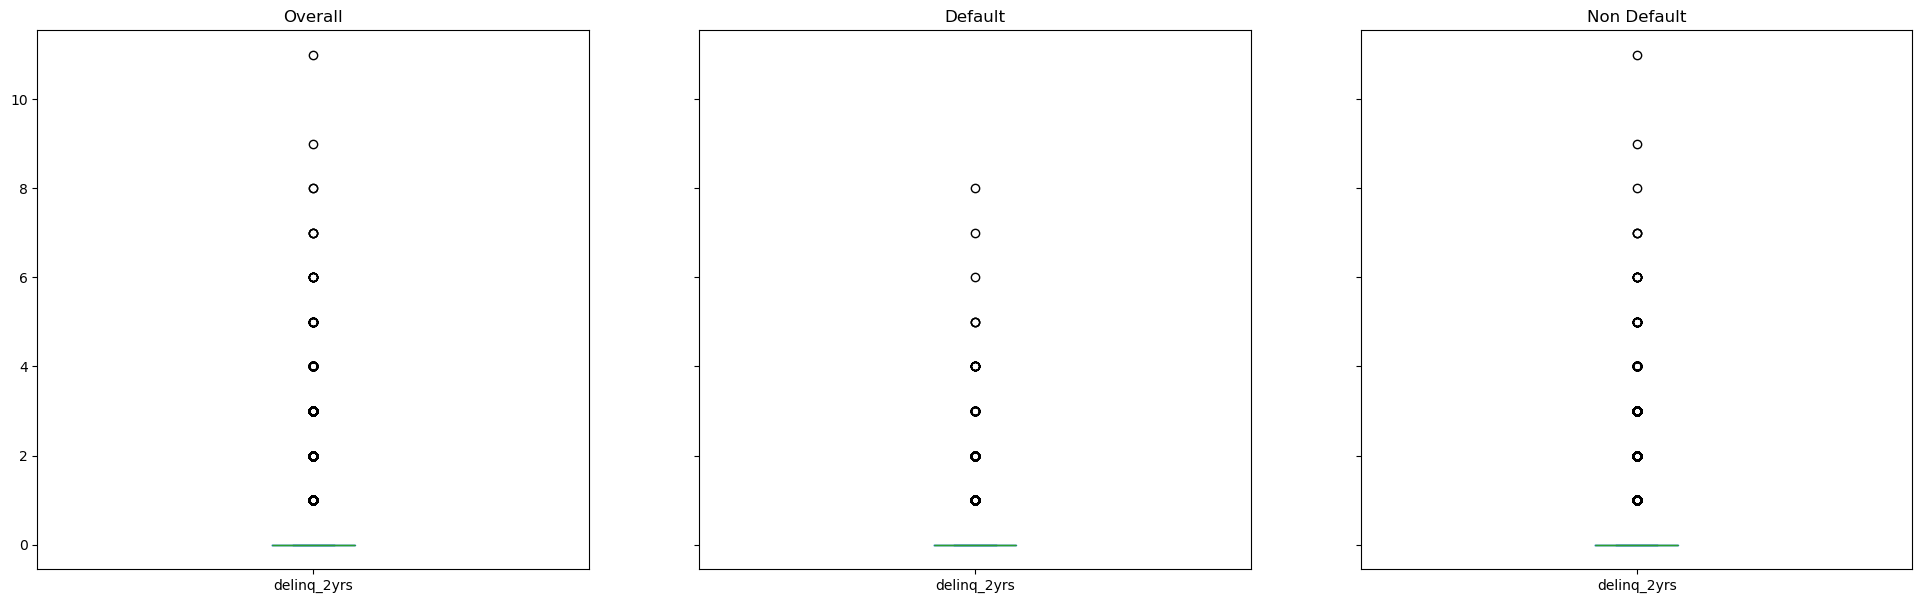

Aggregate distribution of inq_last_6mths


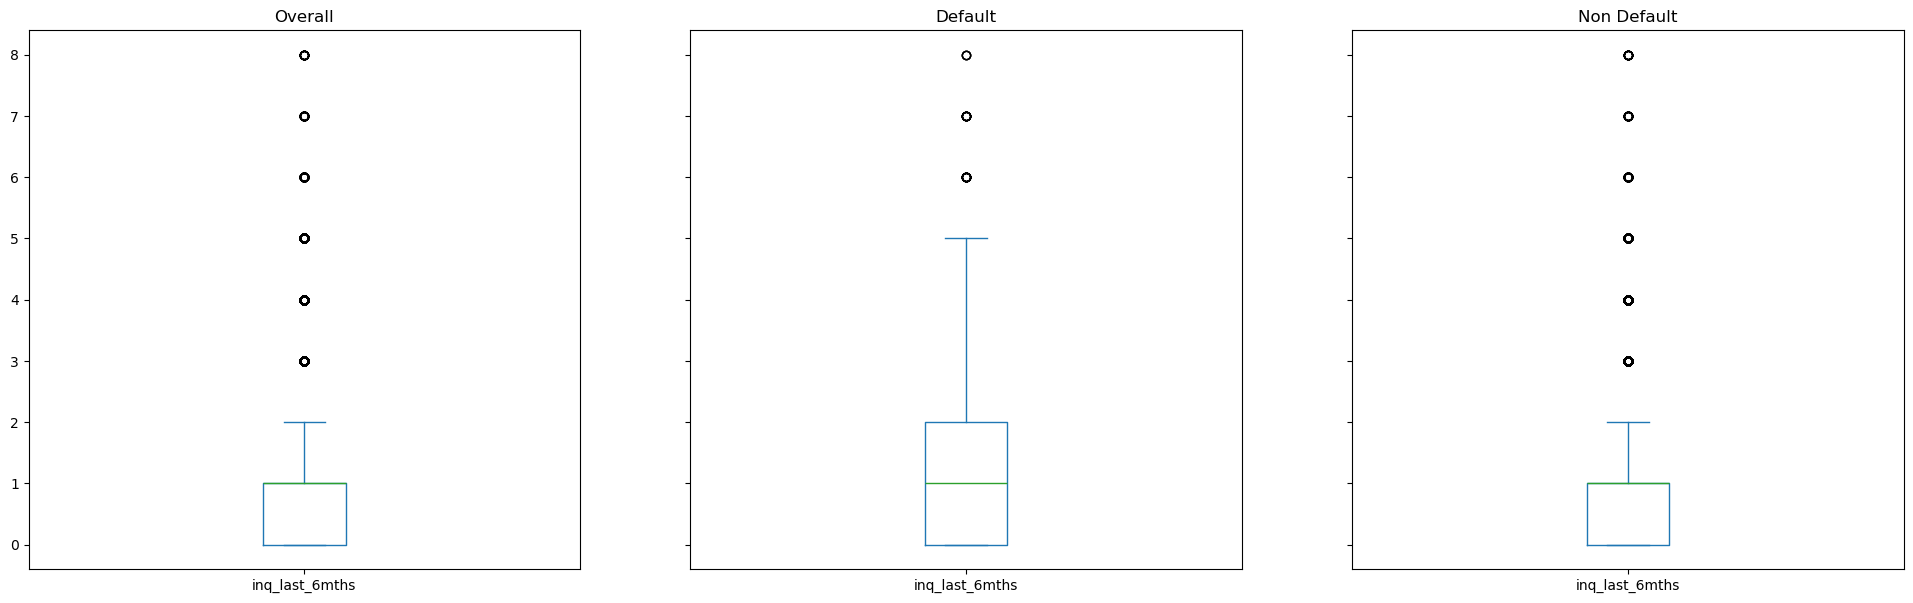

Aggregate distribution of pub_rec


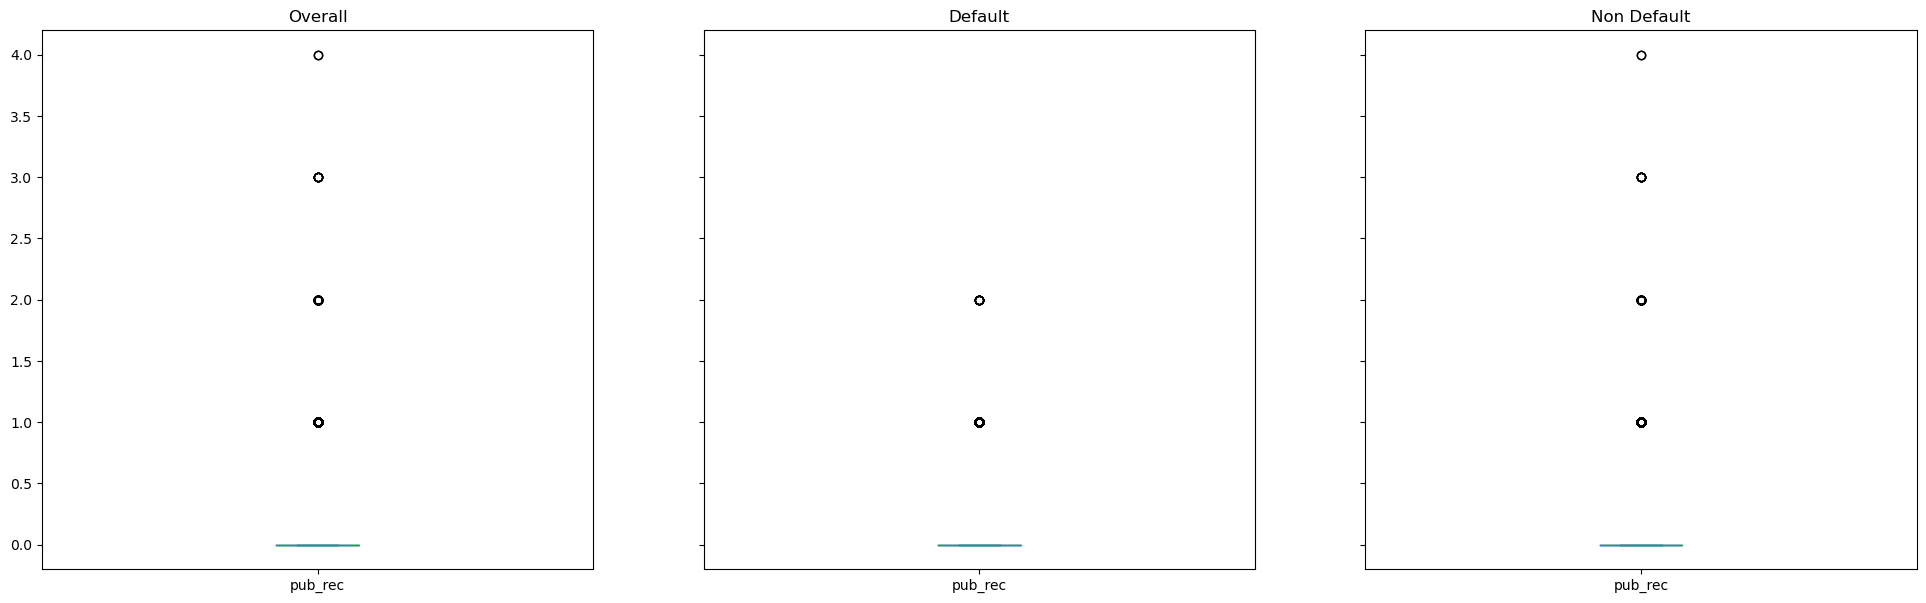

Aggregate distribution of pub_rec_bankruptcies


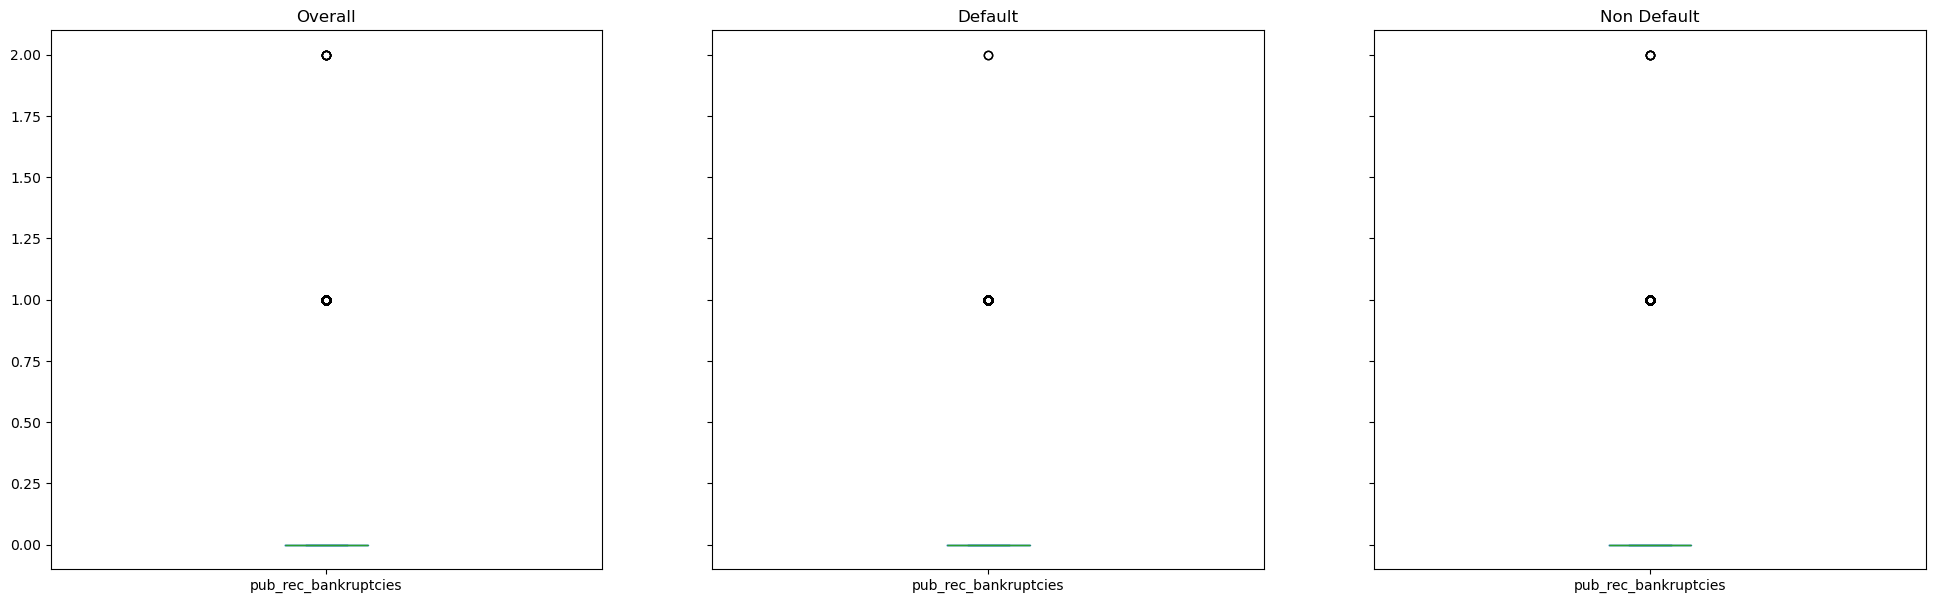

Aggregate distribution of loan_amnt


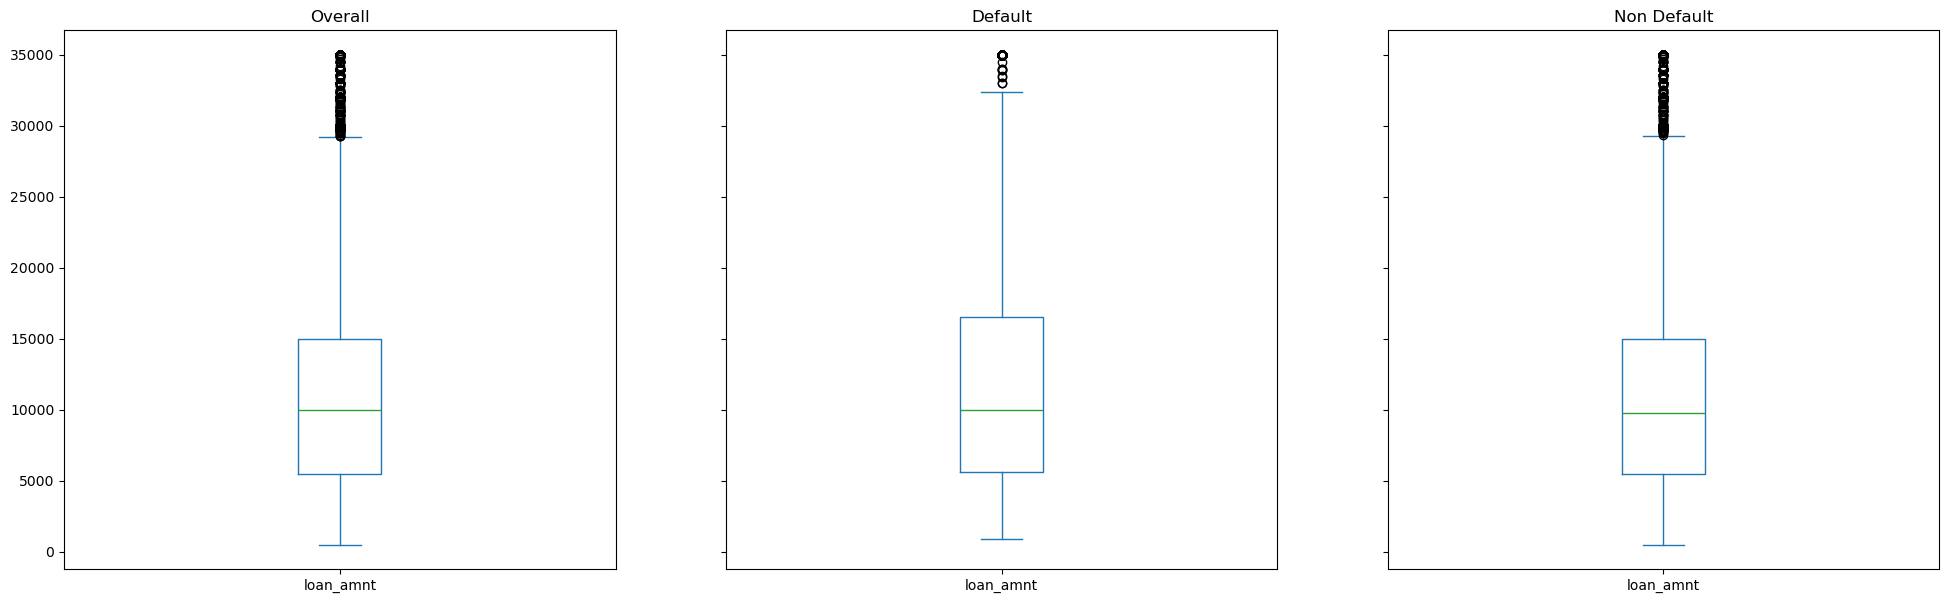

Aggregate distribution of funded_amnt


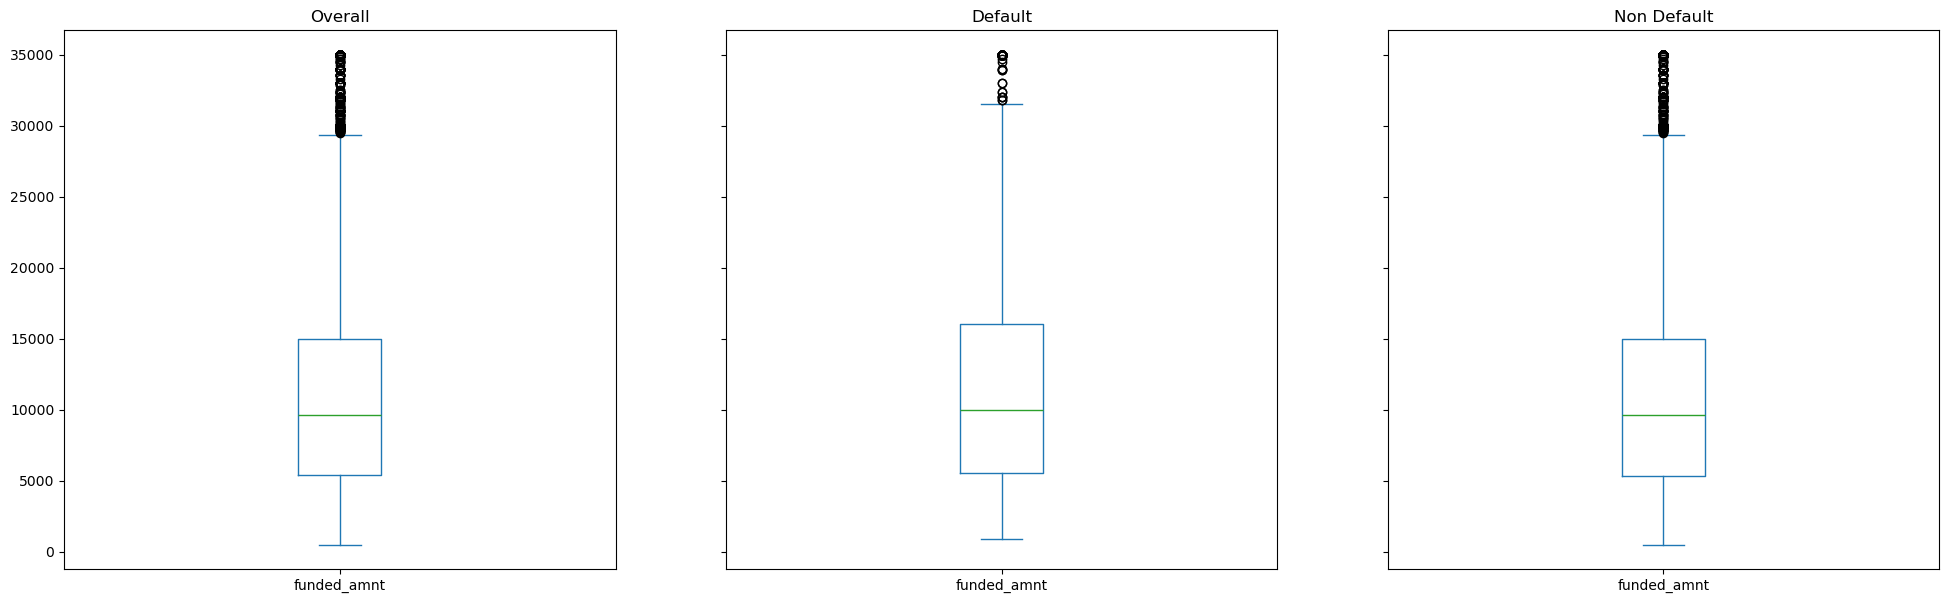

Aggregate distribution of funded_amnt_inv


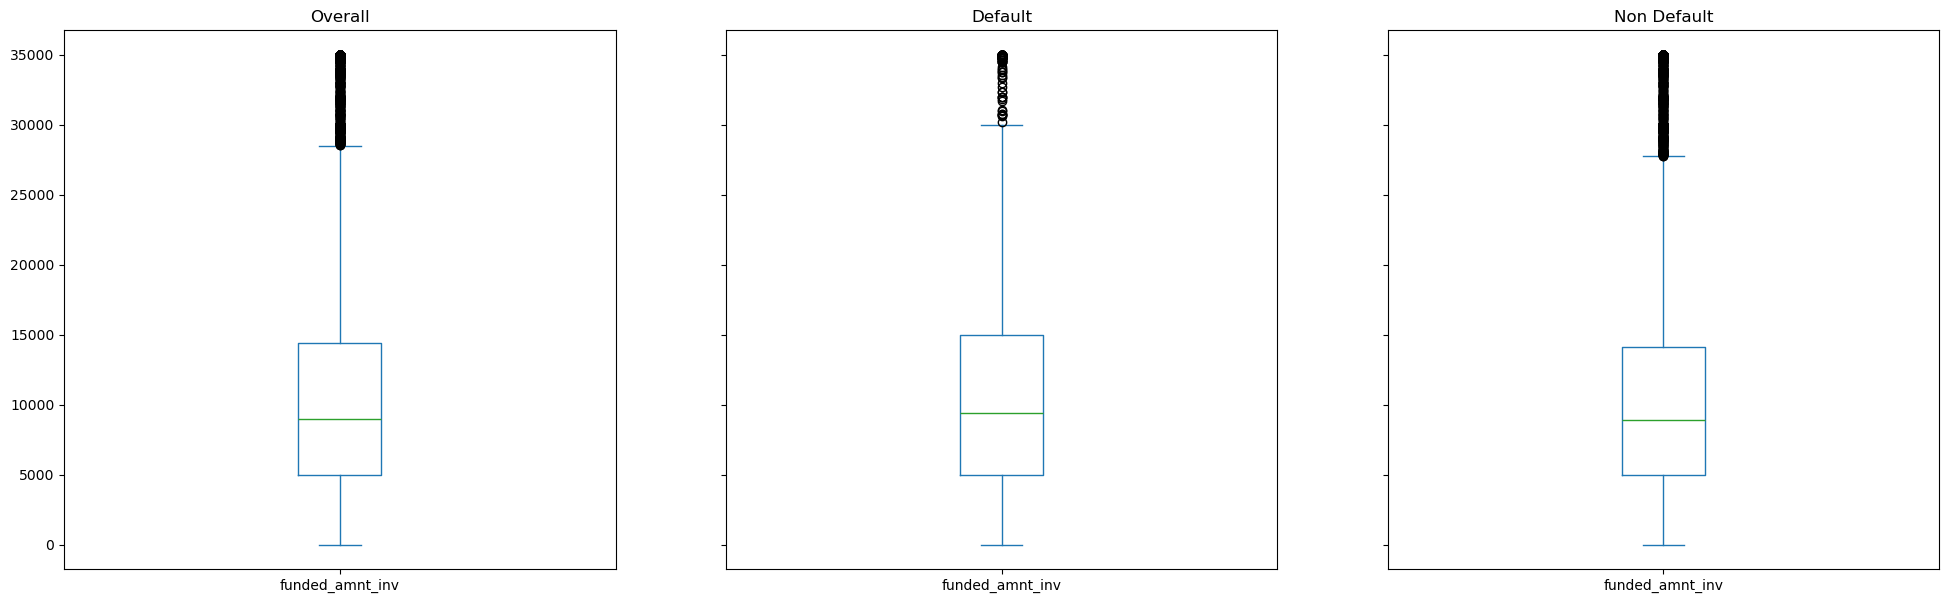

Aggregate distribution of installment


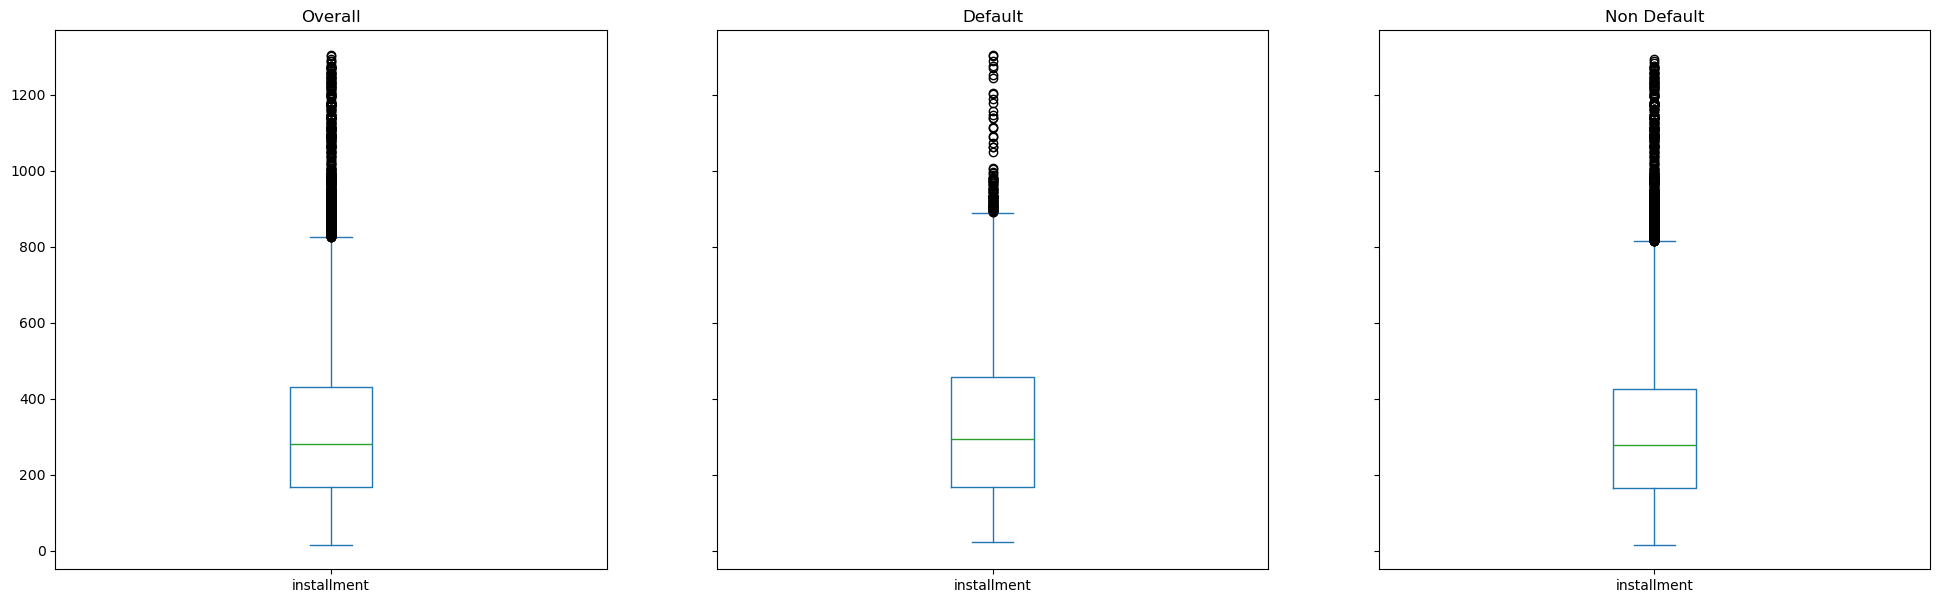

Aggregate distribution of annual_inc


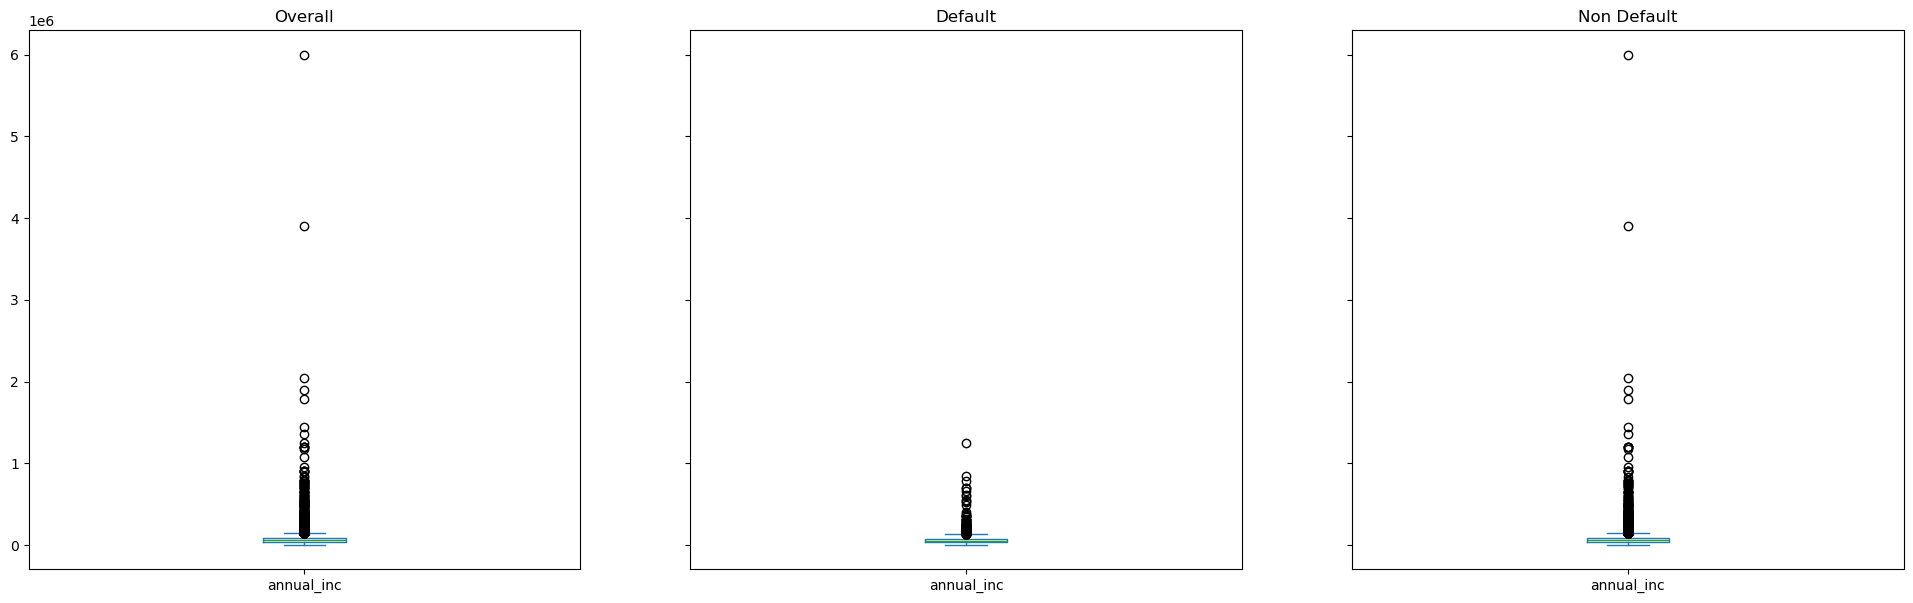

Aggregate distribution of dti


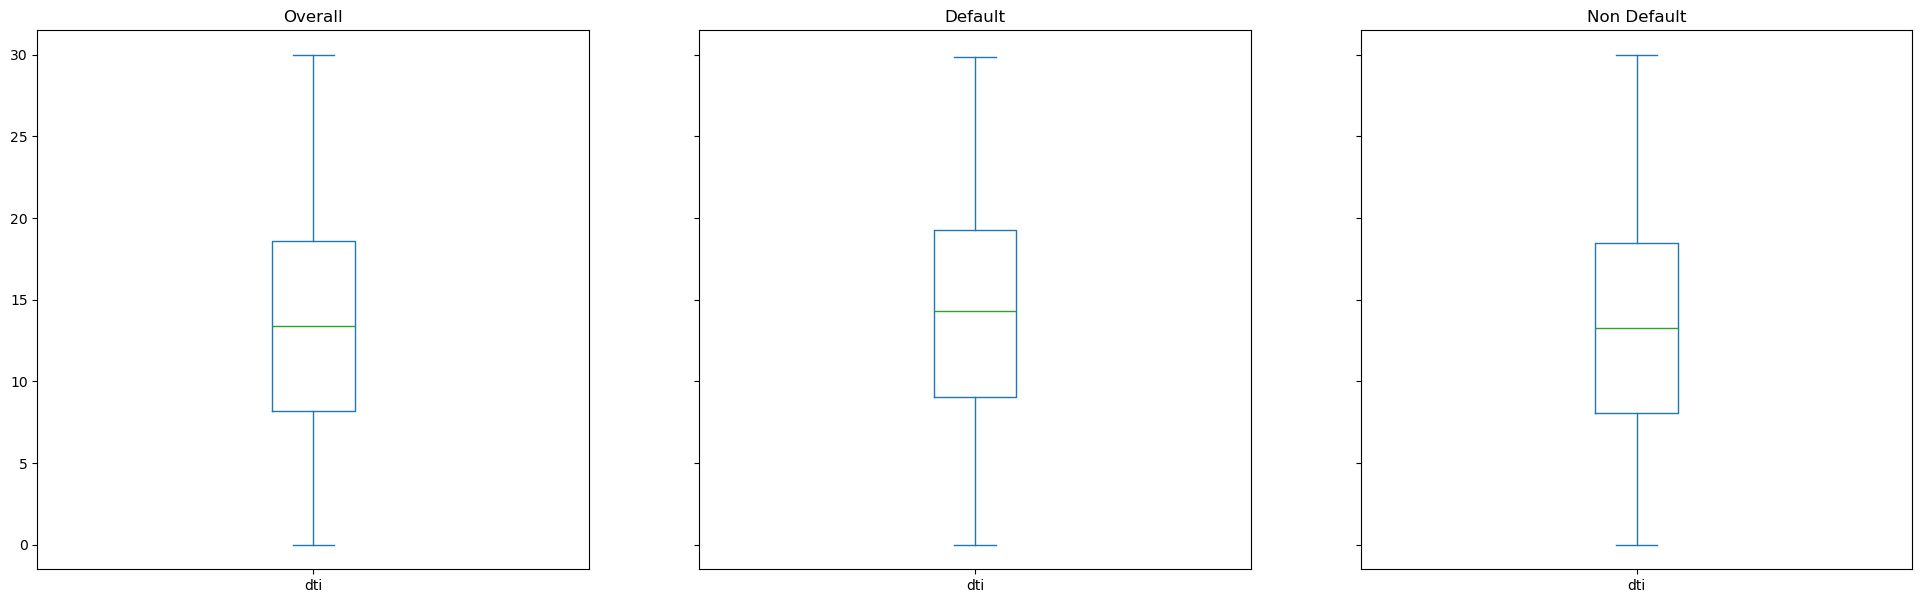

Aggregate distribution of open_acc


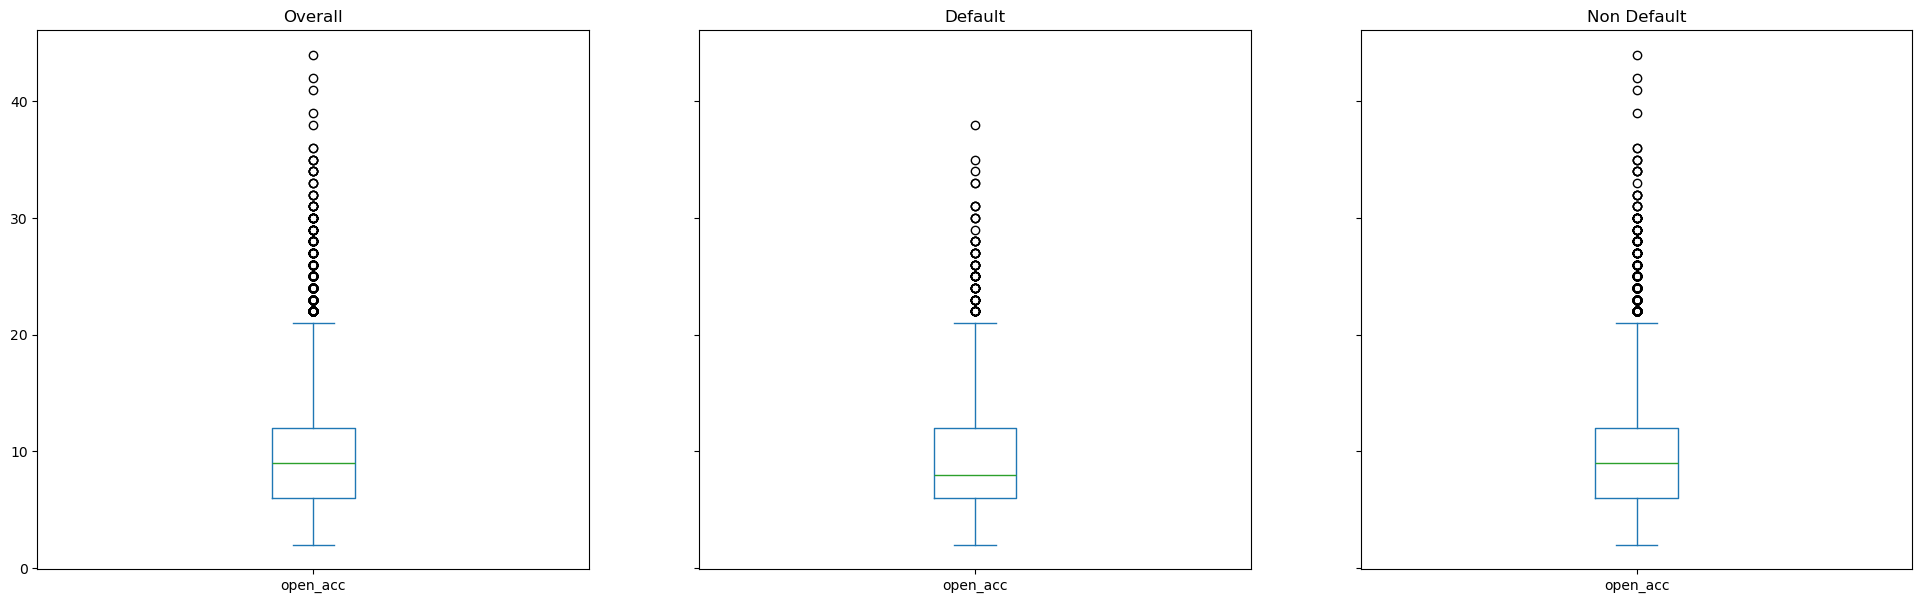

Aggregate distribution of revol_bal


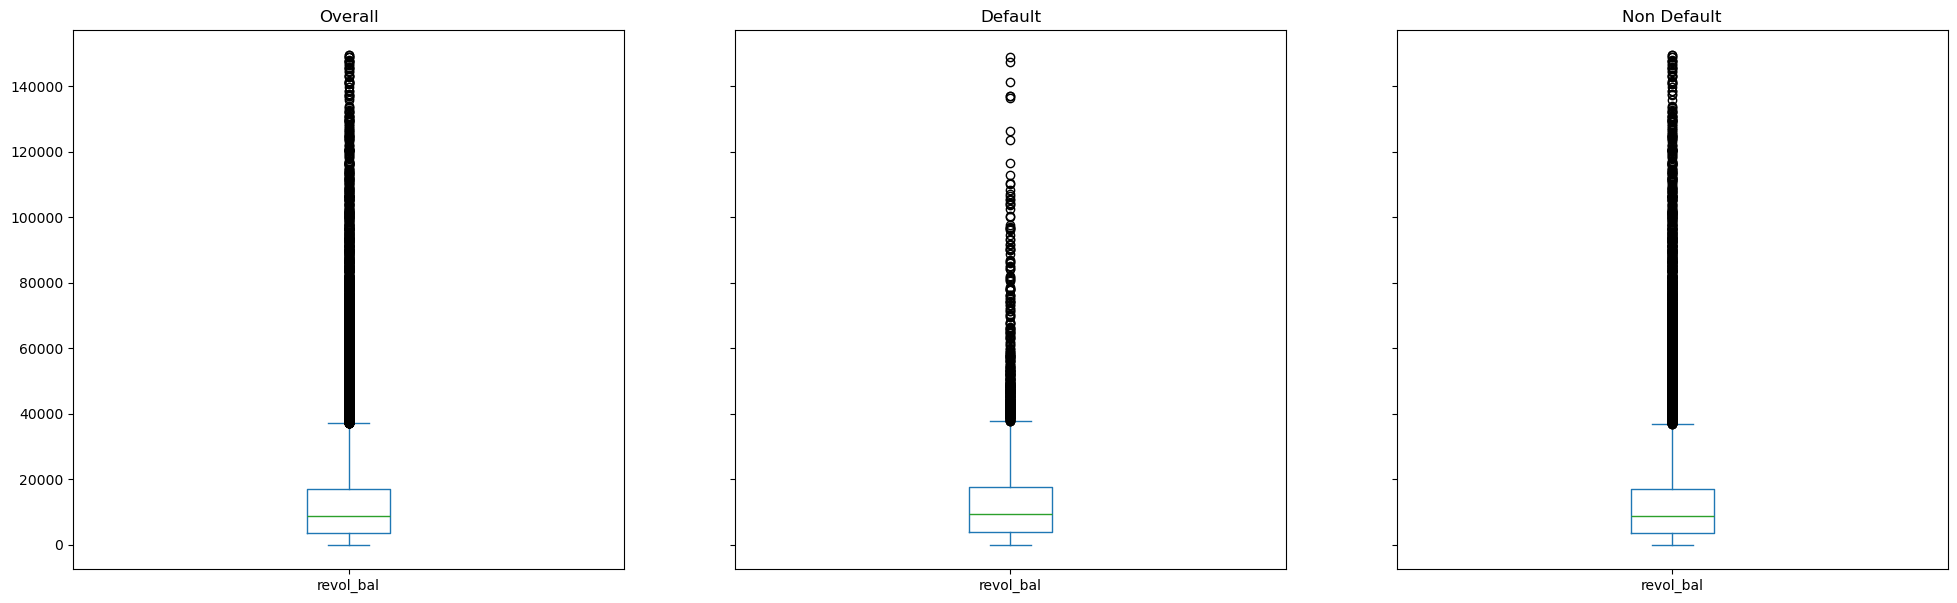

Aggregate distribution of total_acc


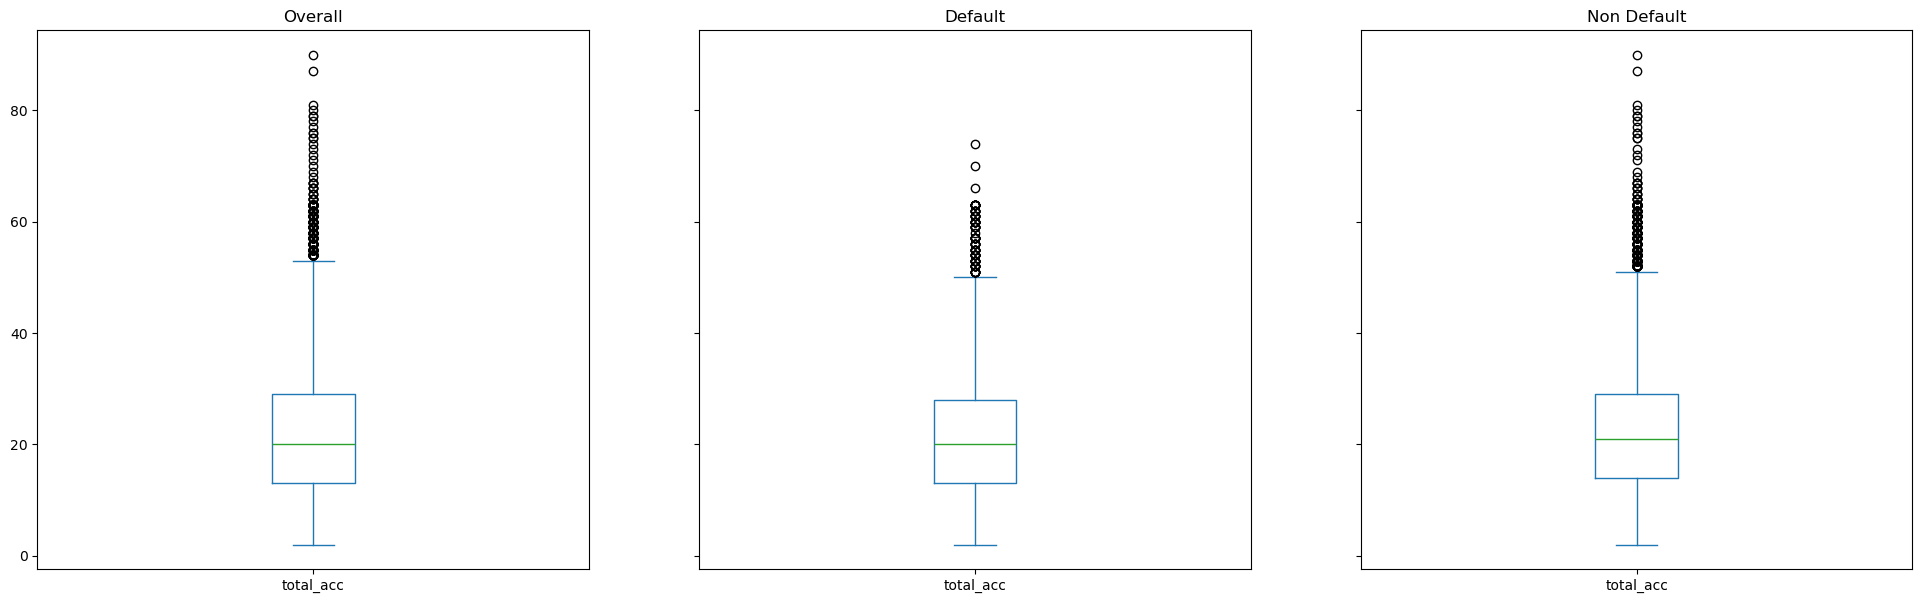

Aggregate distribution of out_prncp


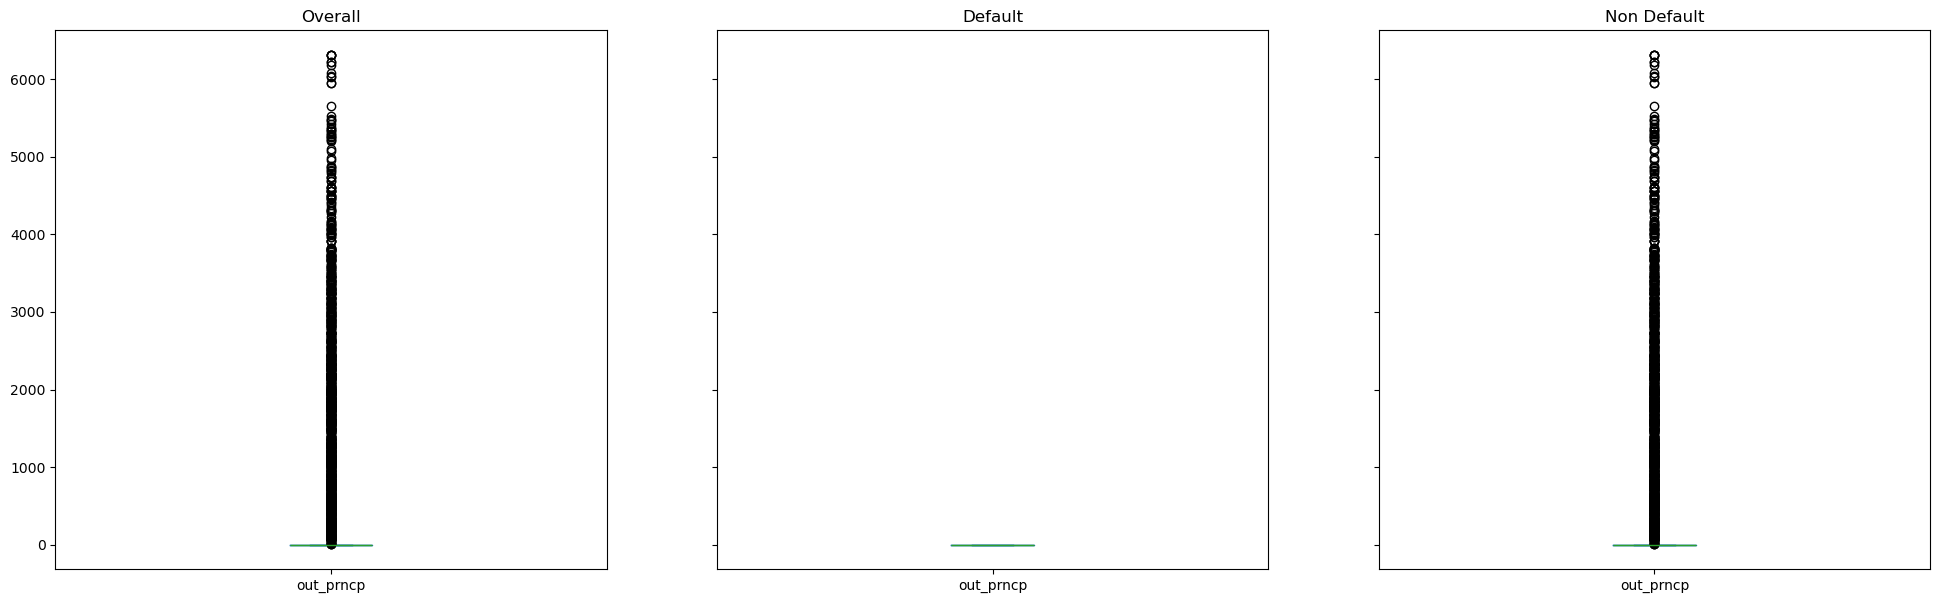

Aggregate distribution of out_prncp_inv


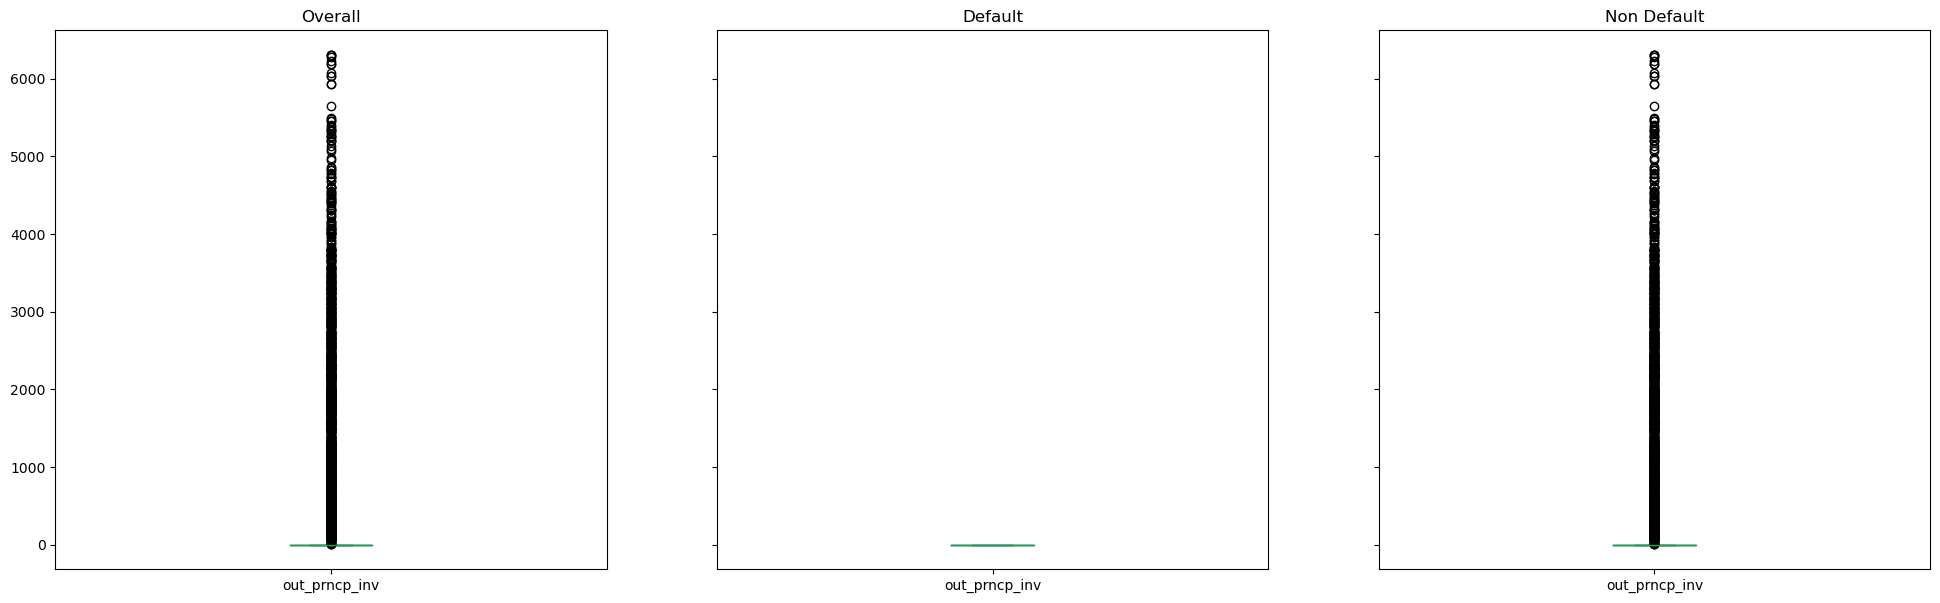

Aggregate distribution of total_pymnt


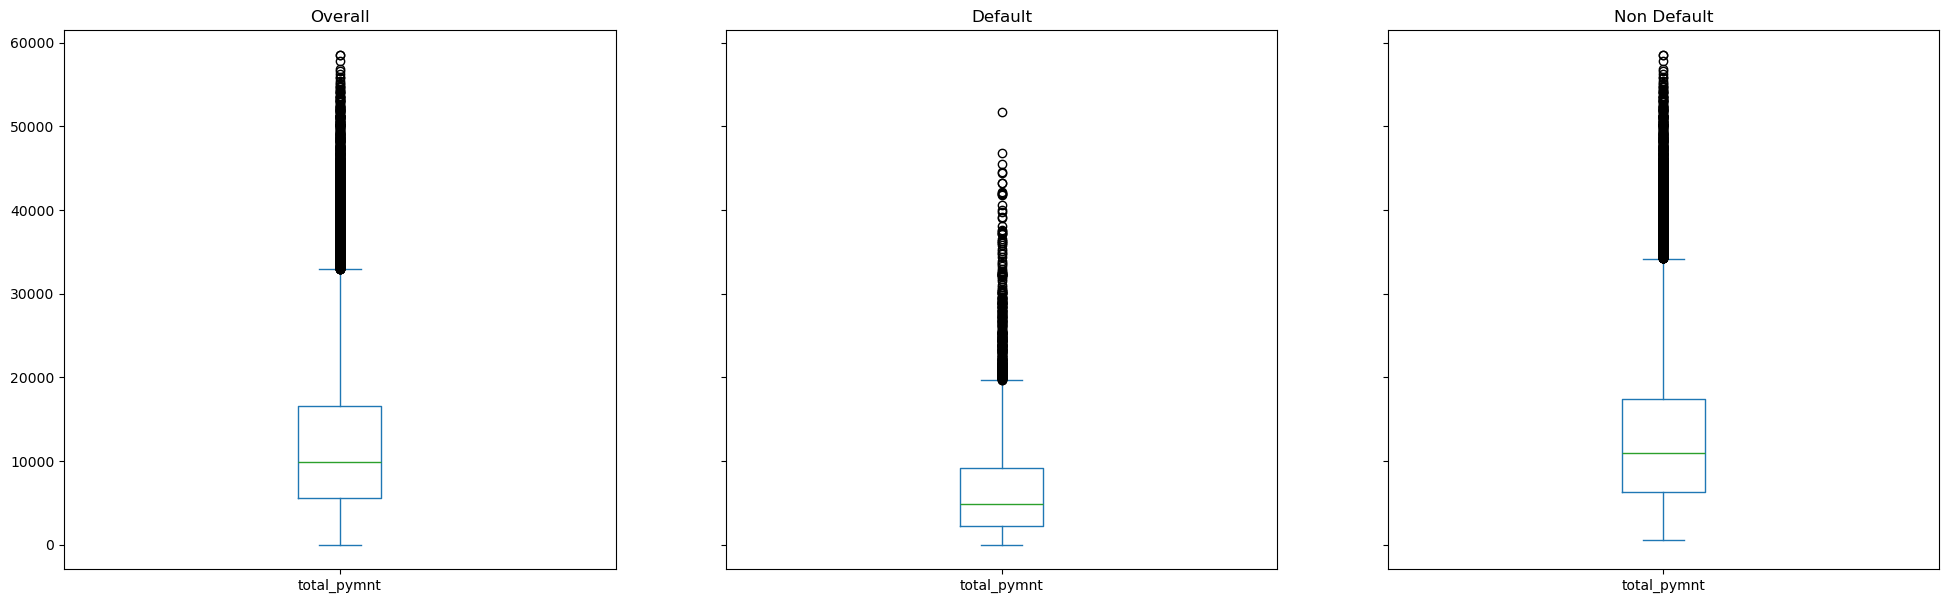

Aggregate distribution of total_pymnt_inv


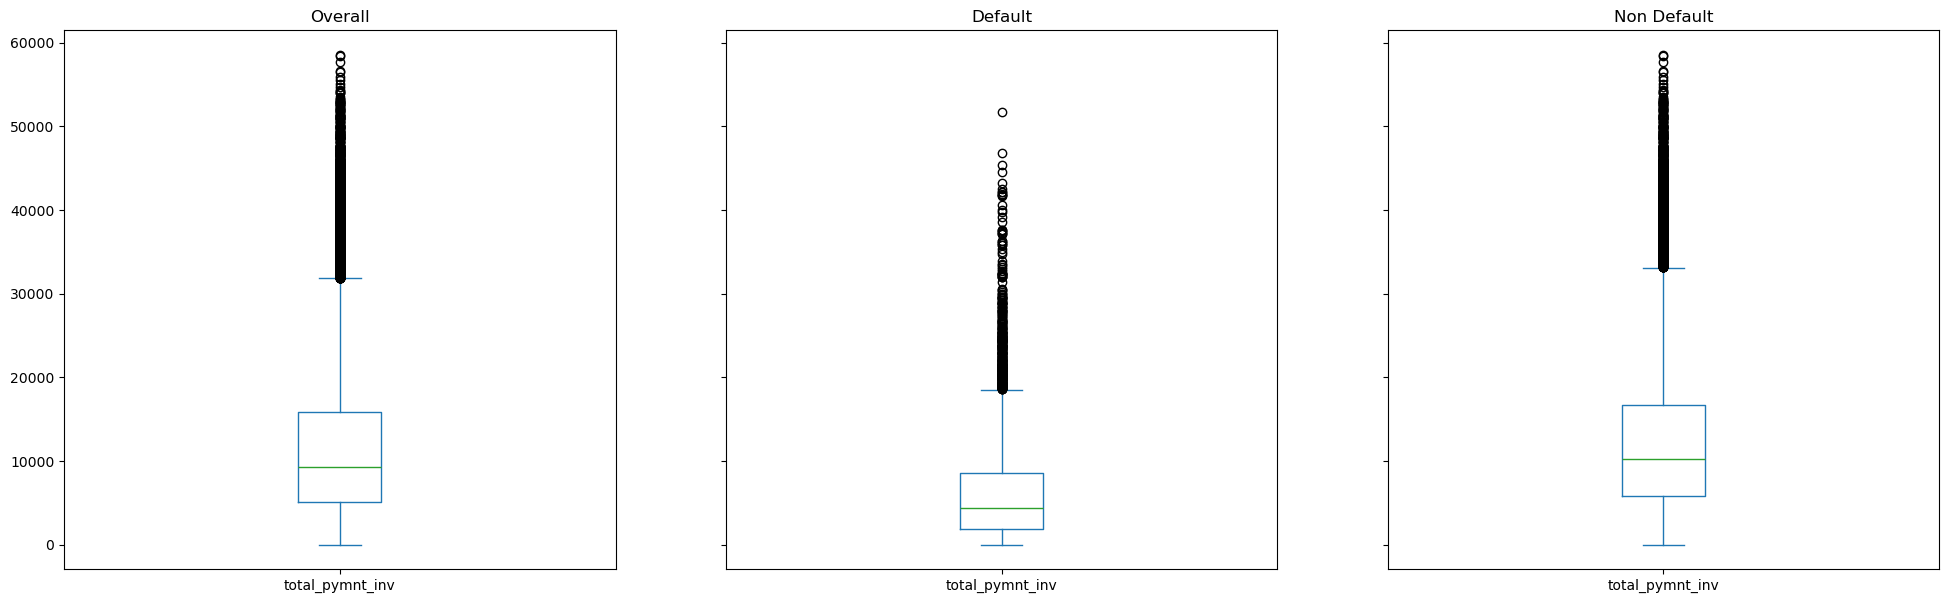

Aggregate distribution of total_rec_prncp


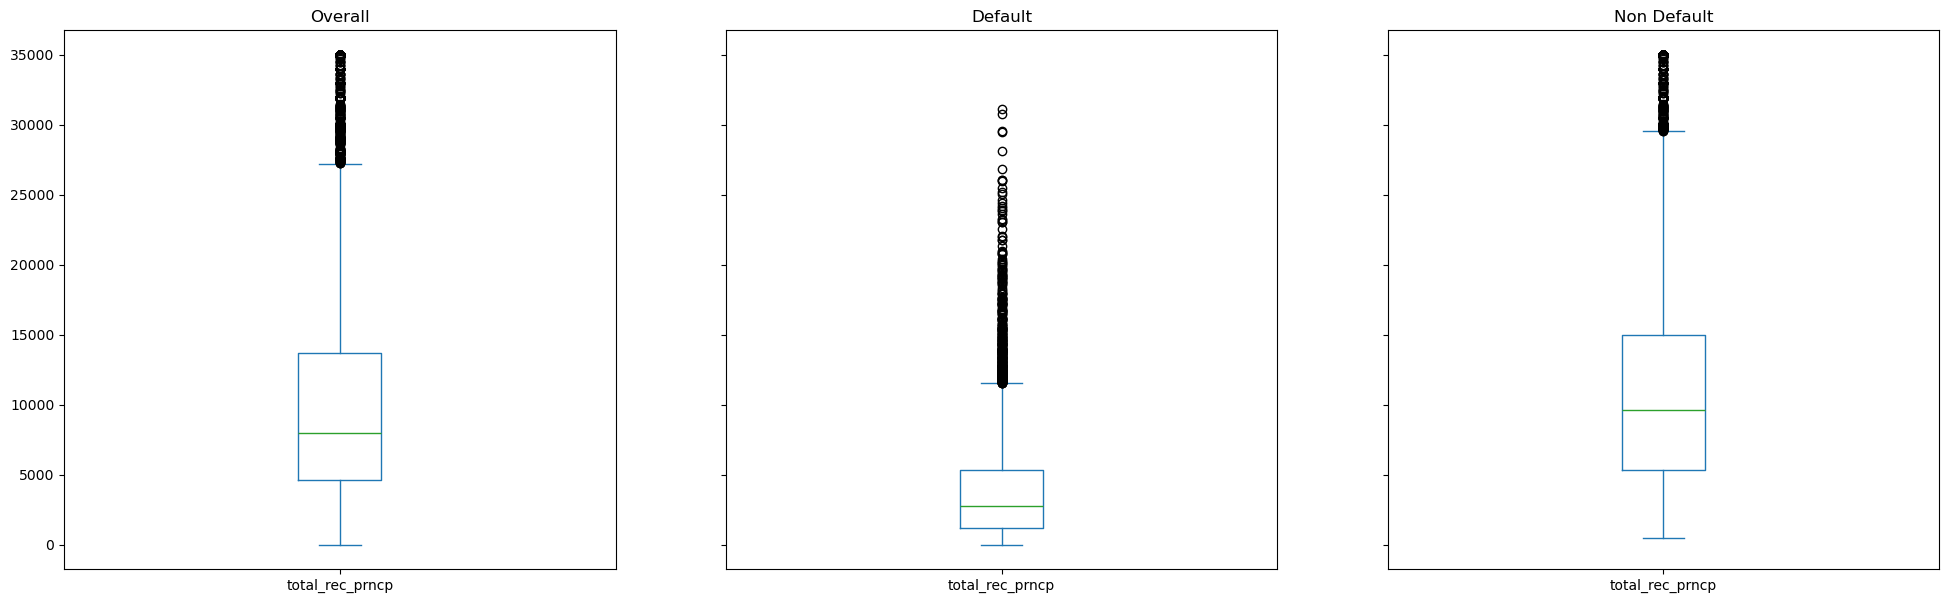

Aggregate distribution of total_rec_int


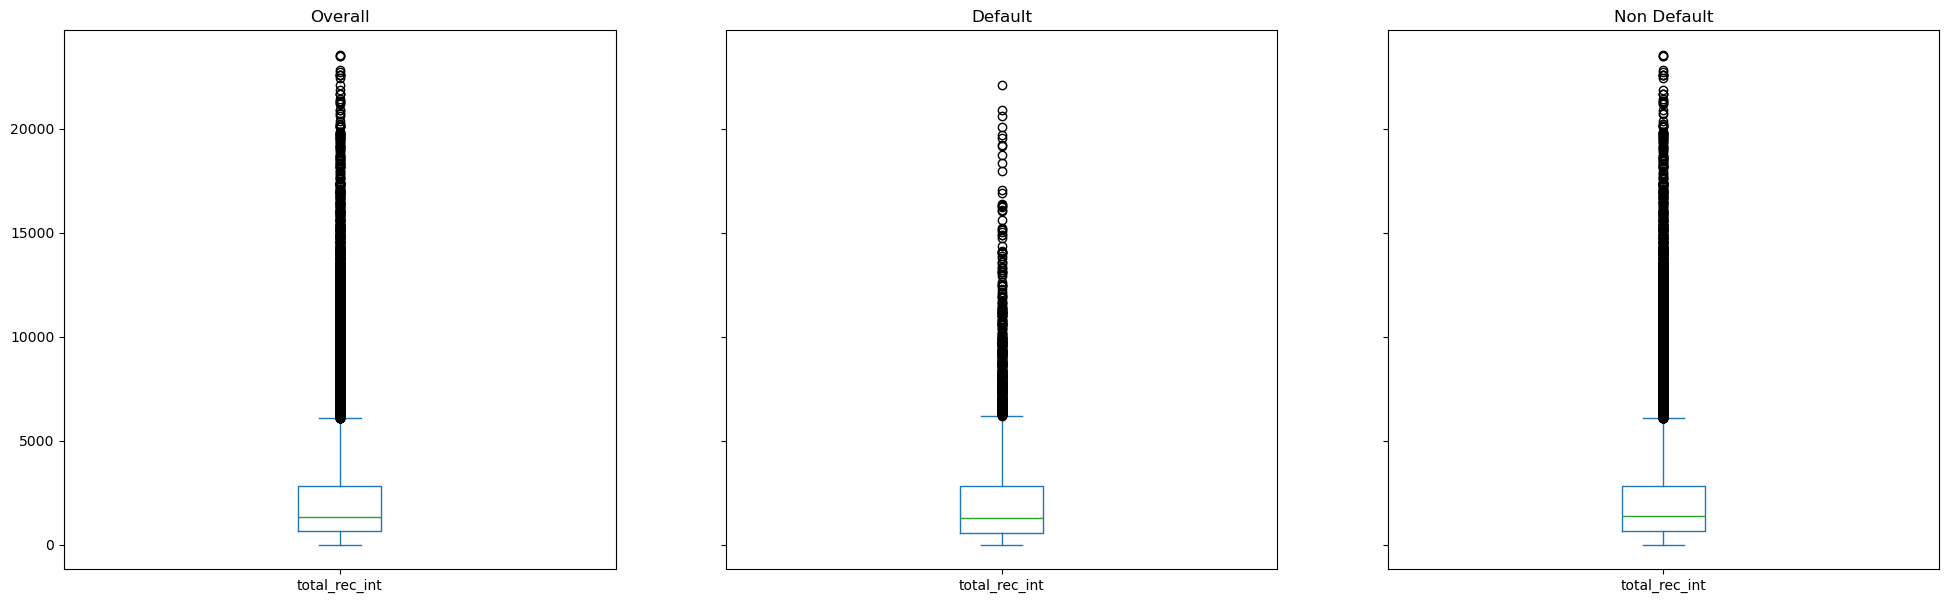

Aggregate distribution of total_rec_late_fee


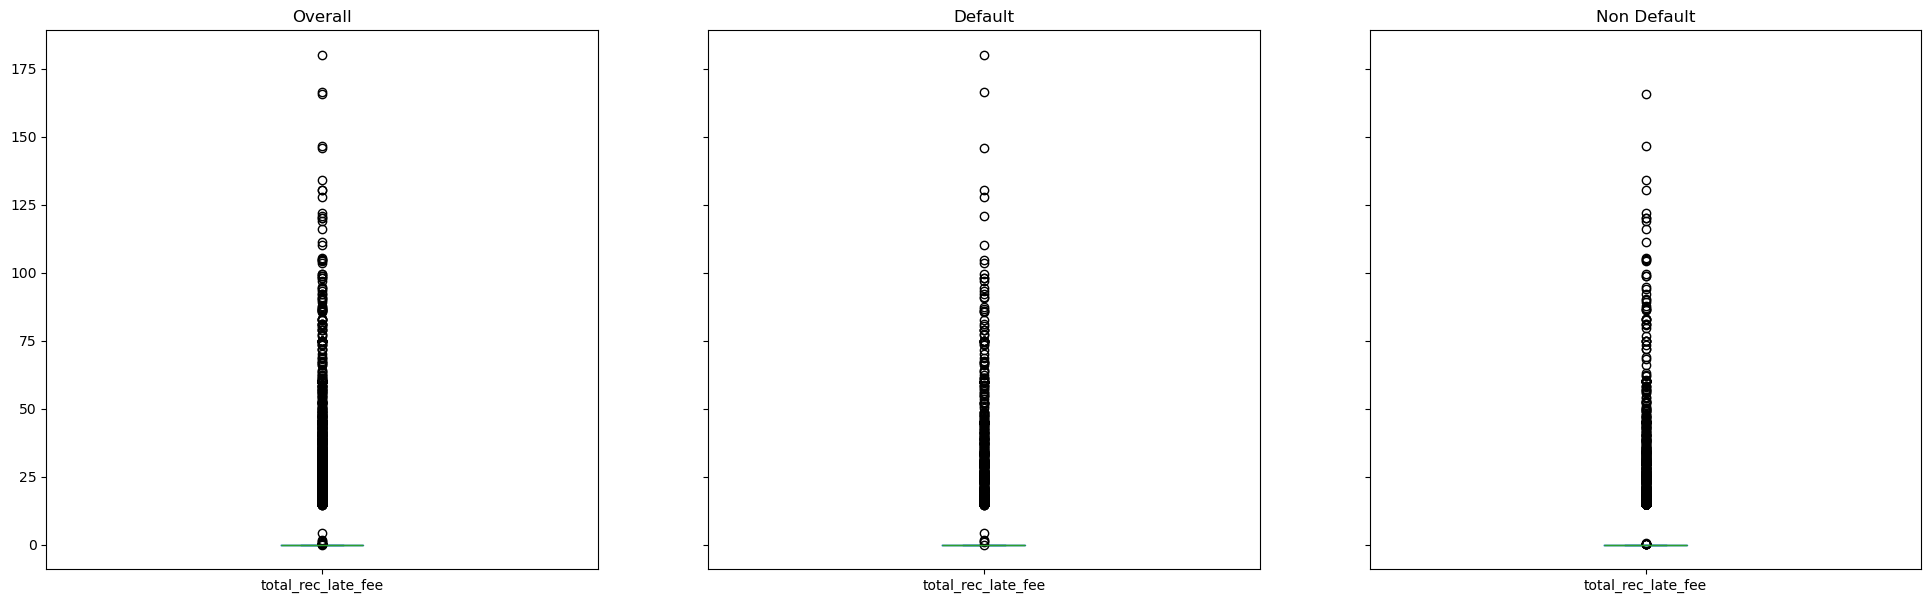

Aggregate distribution of recoveries


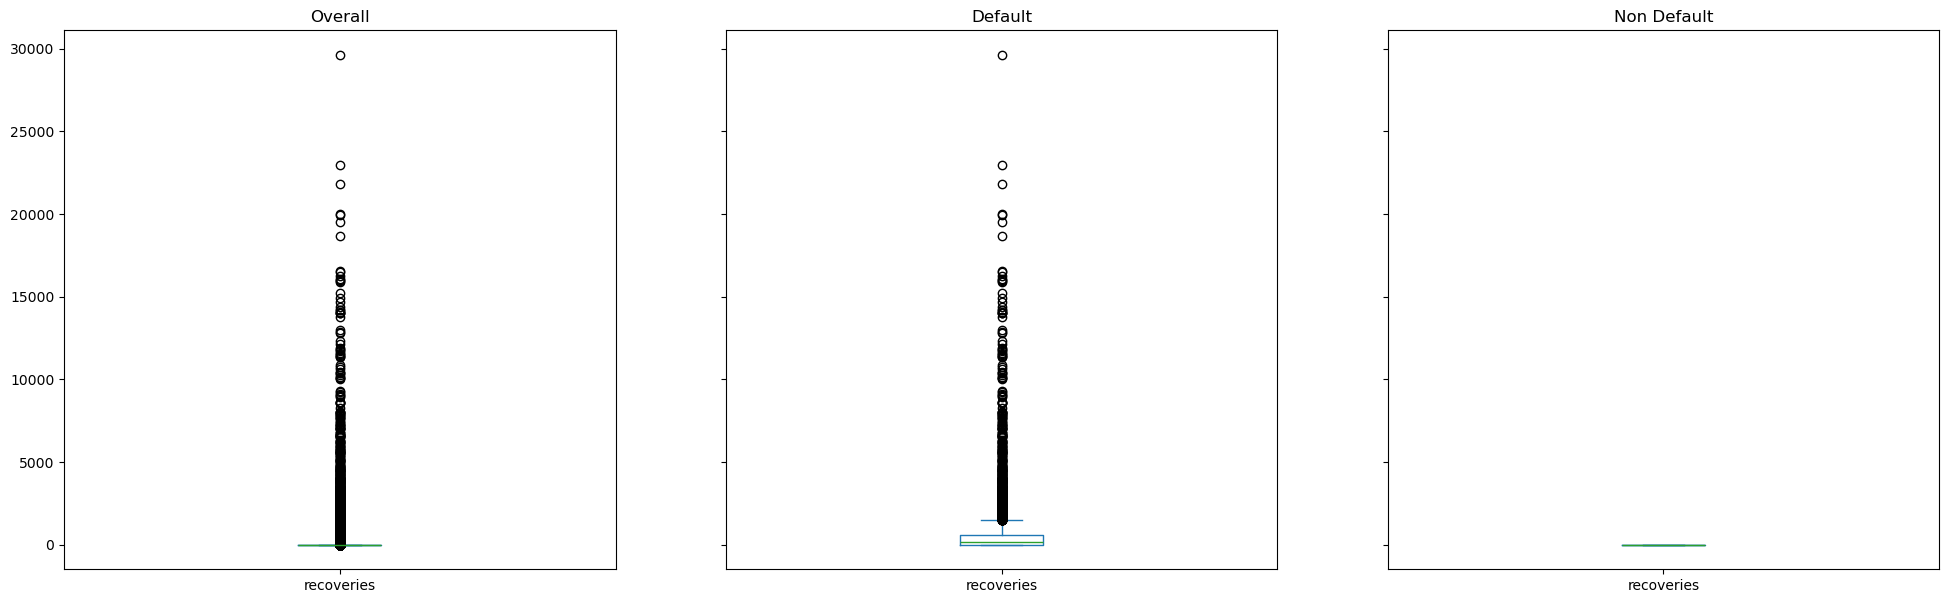

Aggregate distribution of collection_recovery_fee


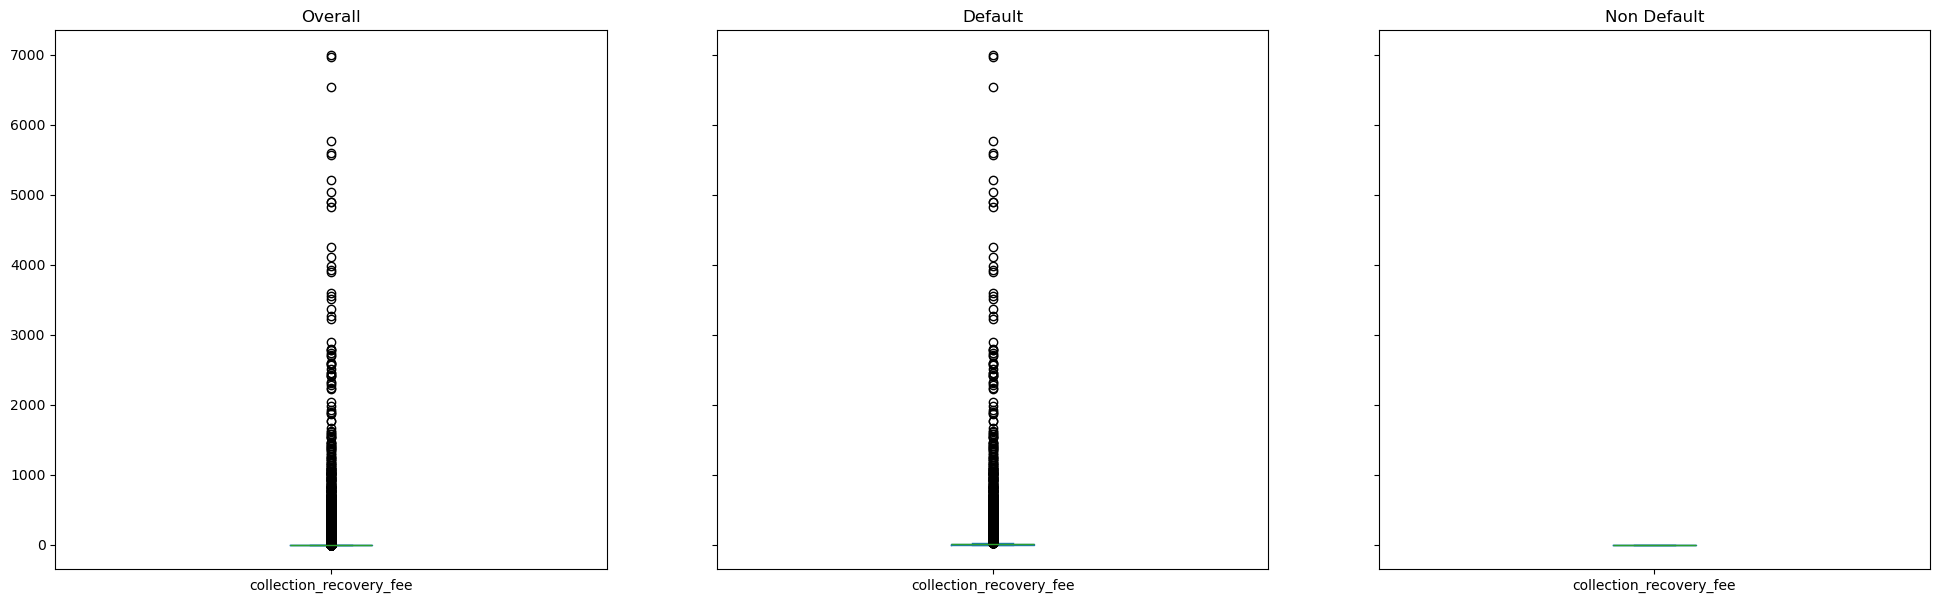

Aggregate distribution of last_pymnt_amnt


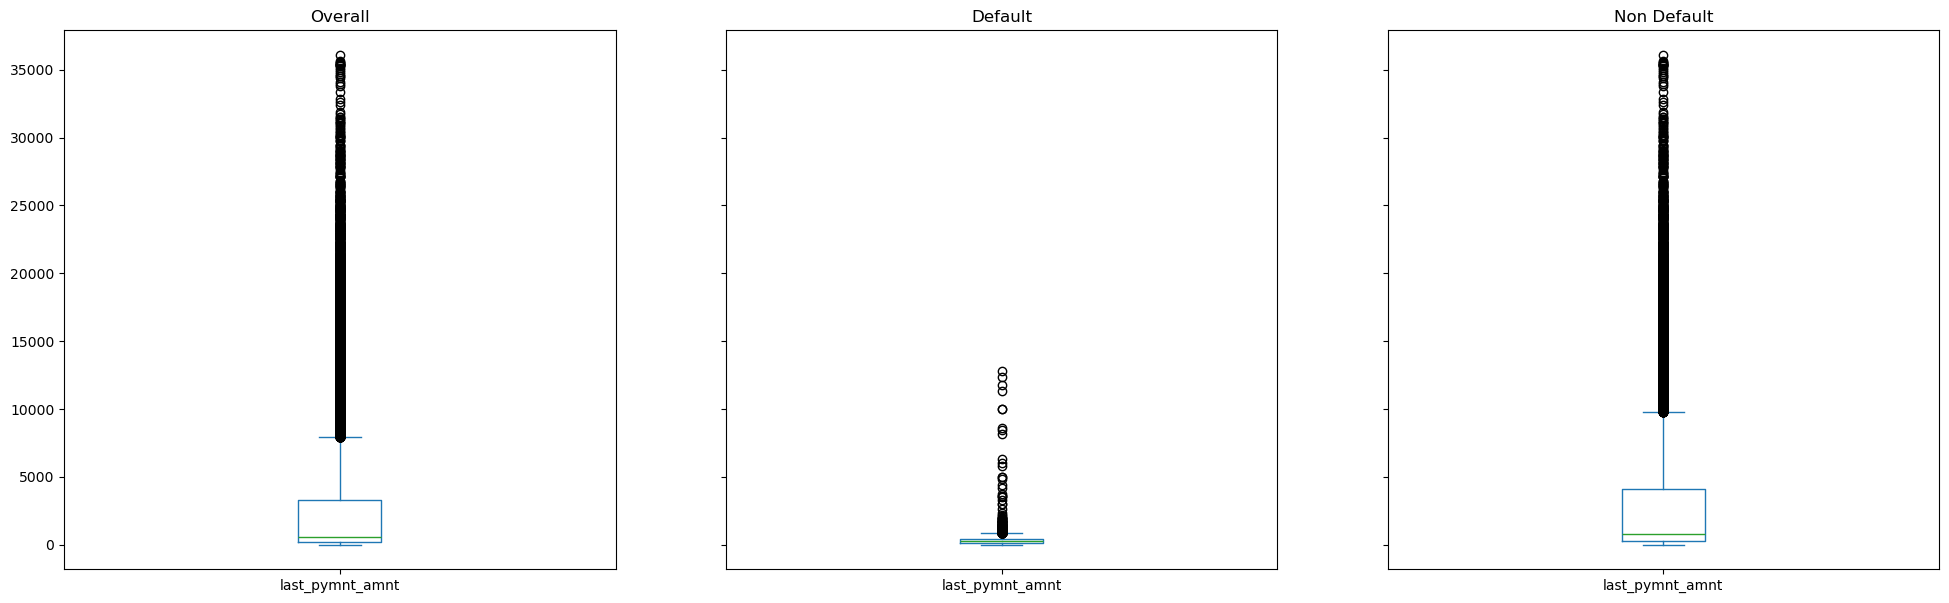

Aggregate distribution of int_rate


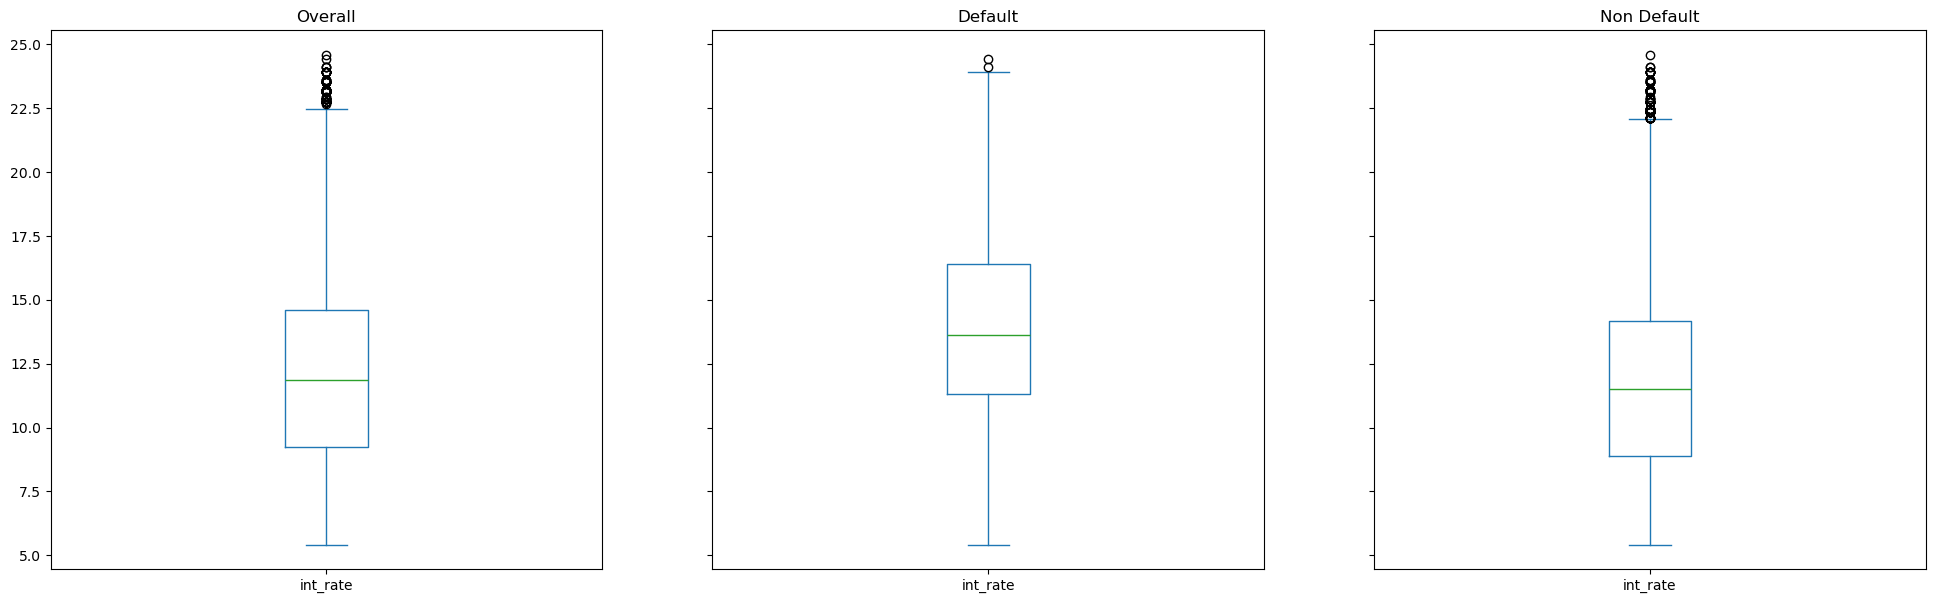

Aggregate distribution of revol_util


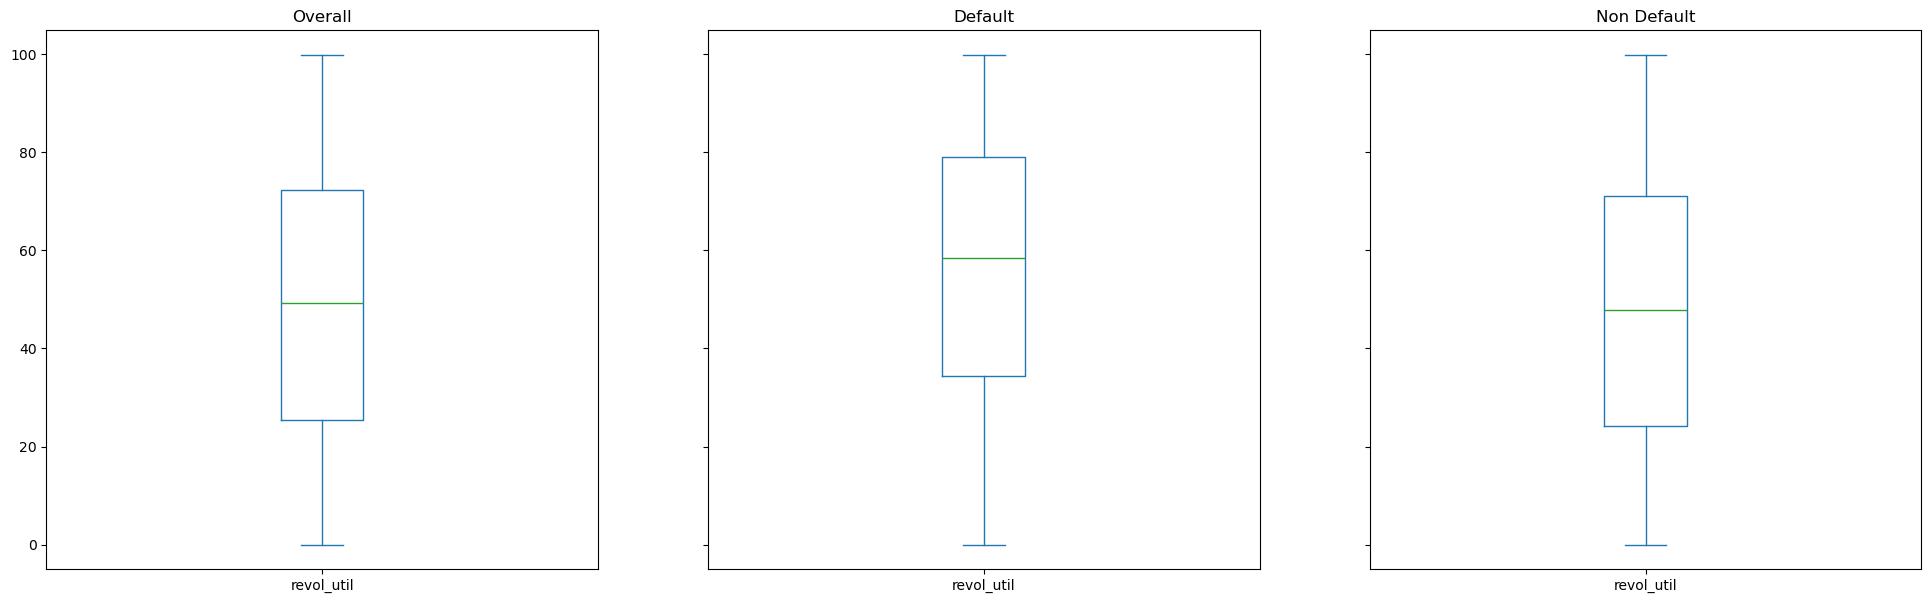

In [275]:
#performing aggregate value distribution checks across the numerical variables
for i in numerical_columns:
    
    #creating a subplot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7), sharey=True)
    
    #Creating the overall box plot
    df[i].plot(kind='box',ax=axes[0], title='Overall')
    
    #creating the default box plot
    df[df['loan_status']=='Charged Off'][i].plot(kind='box',ax=axes[1], title='Default')
    
    #creating the non default box plot
    df[df['loan_status']!='Charged Off'][i].plot(kind='box',ax=axes[2], title='Non Default')
    print("Aggregate distribution of",i)
    
    #adjusting the plot beside the plot
    plt.subplots_adjust(right=2)
    plt.show()

##################             Synthesis                 ####################

#There is no significant distribution variation for most of the numerical metrics across the cohorts but int_rate and last_pymnt_amnt show a shift in distribution
#further exploration on the above metrics will be done on the above metrics in later section

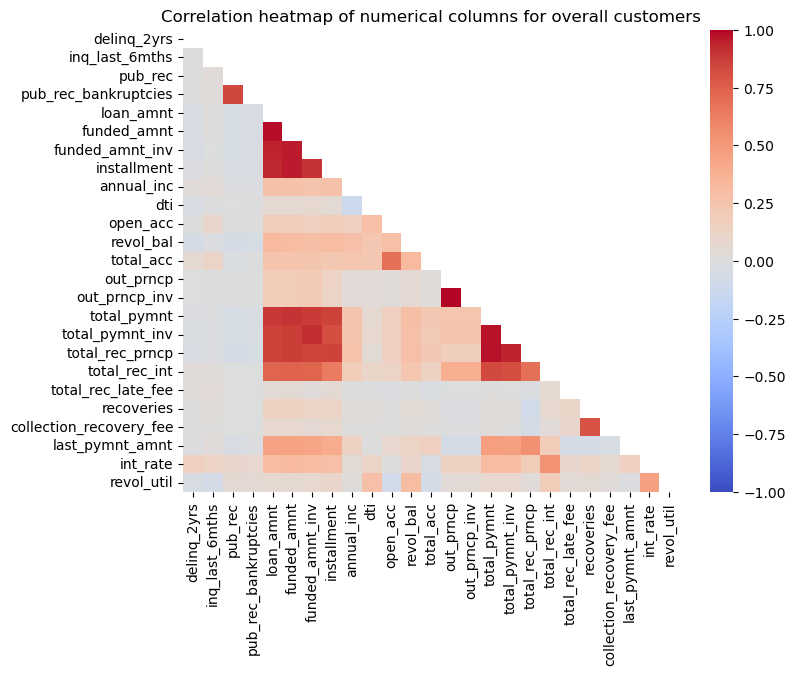

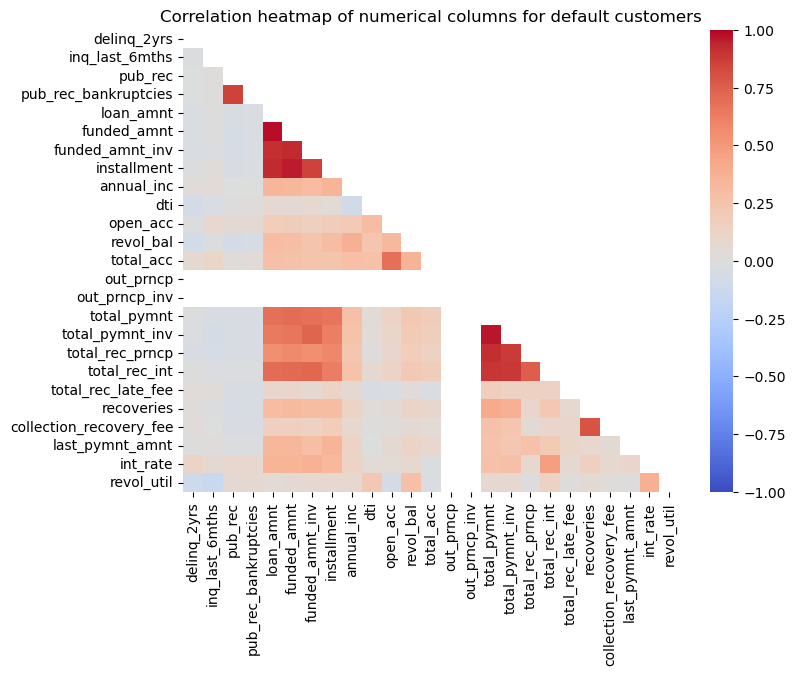

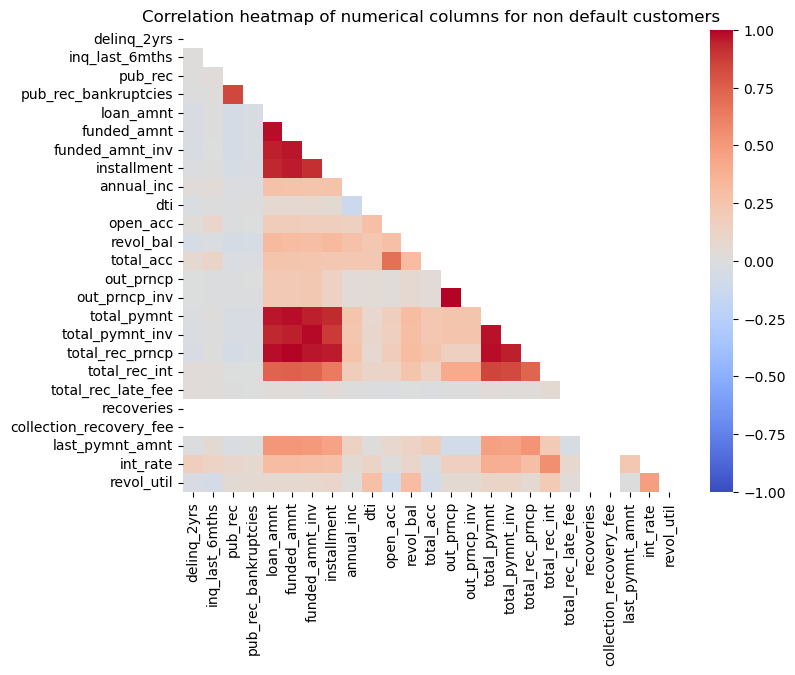

In [102]:
# Compute correlation matrix for the respective columns for the overall data
corr_matrix = df[numerical_columns].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
# Add title
plt.title('Correlation heatmap of numerical columns for overall customers')
# Show plot
plt.show()

# Compute correlation matrix for the respective columns for default customers
corr_matrix = df[df['loan_status']=='Charged Off'][numerical_columns].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
# Add title
plt.title('Correlation heatmap of numerical columns for default customers')
# Show plot
plt.show()

# Compute correlation matrix for the respective columns for non default customers
corr_matrix = df[df['loan_status']!='Charged Off'][numerical_columns].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
# Add title
plt.title('Correlation heatmap of numerical columns for non default customers')
# Show plot
plt.show()

##################             Synthesis                 ####################

#From the heatmap generated we can observe that the cohort of metrics which determine the amount is paid (like total payment received, total interest received) is heavil correlated to the proposed loan amount
#From the heatmap we observe that cohort of default customer have lower correlations for the same metrics

#### Insight section
Additional deep dive based on the findings from the earlier EDA section comprising the univariate and bivariate analysis. This section even includes creation of type driven, business driven and data driven metrics for specific findings.

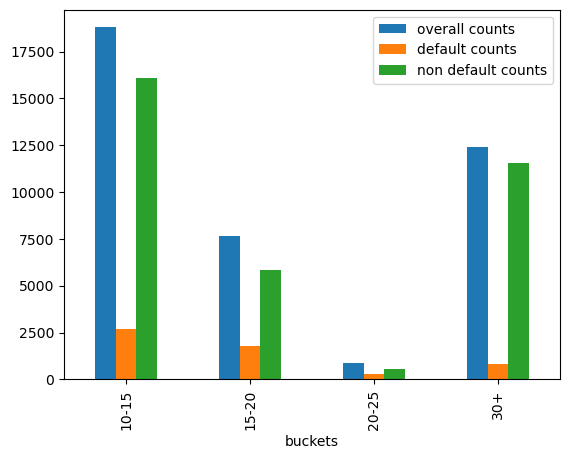

In [63]:
#Creating cohorts of interest rates across the customers to evaluate the distribution of interest

#getting the section of data
temp_interest_overall=df[['id','int_rate']]

#creating the interest rate buckets
temp_interest_overall['buckets']=np.where(temp_interest_overall['int_rate']<=5.0,"0-5",
                                   np.where((temp_interest_overall['int_rate']>5.0) & (temp_interest_overall['int_rate']<=5.0),"5-10",
                                           np.where((temp_interest_overall['int_rate']>10.0) & (temp_interest_overall['int_rate']<=15.0),"10-15",
                                                    np.where((temp_interest_overall['int_rate']>15.0) & (temp_interest_overall['int_rate']<=20.0),"15-20",
                                                             np.where((temp_interest_overall['int_rate']>20.0) & (temp_interest_overall['int_rate']<=25.0),"20-25",
                                                                      np.where((temp_interest_overall['int_rate']>25.0) & (temp_interest_overall['int_rate']<=30.0),"25-30","30+"
                                  ))))))

#Create the overall level dataframe
temp_interest_overall=temp_interest_overall.groupby('buckets')['id'].count().reset_index().rename(columns={'id':'overall counts'})

#getting the section of data
temp_interest_default=df[df['loan_status']=='Charged Off'][['id','int_rate']]

#creating the interest rate buckets
temp_interest_default['buckets']=np.where(temp_interest_default['int_rate']<=5.0,"0-5",
                                   np.where((temp_interest_default['int_rate']>5.0) & (temp_interest_default['int_rate']<=5.0),"5-10",
                                           np.where((temp_interest_default['int_rate']>10.0) & (temp_interest_default['int_rate']<=15.0),"10-15",
                                                    np.where((temp_interest_default['int_rate']>15.0) & (temp_interest_default['int_rate']<=20.0),"15-20",
                                                             np.where((temp_interest_default['int_rate']>20.0) & (temp_interest_default['int_rate']<=25.0),"20-25",
                                                                      np.where((temp_interest_default['int_rate']>25.0) & (temp_interest_default['int_rate']<=30.0),"25-30","30+"
                                  ))))))

#Create the default level dataframe
temp_interest_default=temp_interest_default.groupby('buckets')['id'].count().reset_index().rename(columns={'id':'default counts'})

#getting the section of data
temp_interest_nondefault=df[df['loan_status']!='Charged Off'][['id','int_rate']]

#creating the interest rate buckets
temp_interest_nondefault['buckets']=np.where(temp_interest_nondefault['int_rate']<=5.0,"0-5",
                                   np.where((temp_interest_nondefault['int_rate']>5.0) & (temp_interest_nondefault['int_rate']<=5.0),"5-10",
                                           np.where((temp_interest_nondefault['int_rate']>10.0) & (temp_interest_nondefault['int_rate']<=15.0),"10-15",
                                                    np.where((temp_interest_nondefault['int_rate']>15.0) & (temp_interest_nondefault['int_rate']<=20.0),"15-20",
                                                             np.where((temp_interest_nondefault['int_rate']>20.0) & (temp_interest_nondefault['int_rate']<=25.0),"20-25",
                                                                      np.where((temp_interest_nondefault['int_rate']>25.0) & (temp_interest_nondefault['int_rate']<=30.0),"25-30","30+"
                                  ))))))

#Create the non default level dataframe
temp_interest_nondefault=temp_interest_nondefault.groupby('buckets')['id'].count().reset_index().rename(columns={'id':'non default counts'})

#combining the dataframes into one
int_res=temp_interest_overall.merge(temp_interest_default,on='buckets').merge(temp_interest_nondefault,on='buckets')

#plotting the required chart
int_res.plot(x='buckets', y=['overall counts','default counts','non default counts'], kind="bar")
plt.show()

##################             Synthesis                 ####################

#the given cohort level analysis along with the univariate distribution indicates that the given interest rates are higher in the 15-25% brakcet compared to the non default cohort

In [37]:
#Creating rounded off cohorts and comparing the total_rec_prncp average values with other cohorts

#Creating the section of data
temp_overall=df[['loan_amnt']].value_counts().reset_index(name='counts')

#Creating the rounded off flag
temp_overall['flag']=np.where(temp_overall['loan_amnt']%1000==0,'Rounded-off','Regular')

#Counting the values across the flag
temp_overall=temp_overall.groupby('flag')['counts'].mean().reset_index().rename(columns={'counts':'overall counts'})

#Creating the section of data
temp_default=df[df['loan_status']=='Charged Off']['loan_amnt'].value_counts().reset_index(name='counts')

#Creating the rounded off flag
temp_default['flag']=np.where(temp_default['loan_amnt']%1000==0,'Rounded-off','Regular')

#Counting the values across the flag
temp_default=temp_default.groupby('flag')['counts'].mean().reset_index().rename(columns={'counts':'default counts'})

#Creating the section of data
temp_nondefault=df[df['loan_status']!='Charged Off']['loan_amnt'].value_counts().reset_index(name='counts')

#Creating the rounded off flag
temp_nondefault['flag']=np.where(temp_nondefault['loan_amnt']%1000==0,'Rounded-off','Regular')

#Counting the values across the flag
temp_nondefault=temp_nondefault.groupby('flag')['counts'].mean().reset_index().rename(columns={'counts':'non default counts'})

#Combining all the three sections of data 
temp_overall.merge(temp_default,on='flag').merge(temp_nondefault,on='flag')

##################             Synthesis                 ####################

#This indicates that even though the rounded of figures are quite low but borrowrs usually prefer such numbers to take the loan as such
#But the stark difference comes in the default side where such number loans are very low

,flag,overall counts,default counts,non default counts
0,Regular,16.412941,4.497788,14.551893
1,Rounded-off,736.171429,102.685714,633.485714


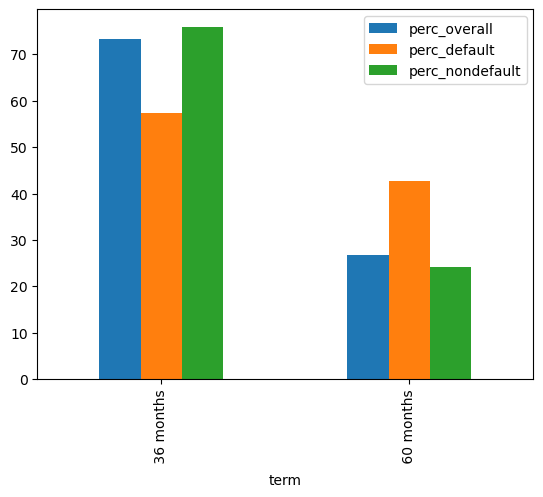

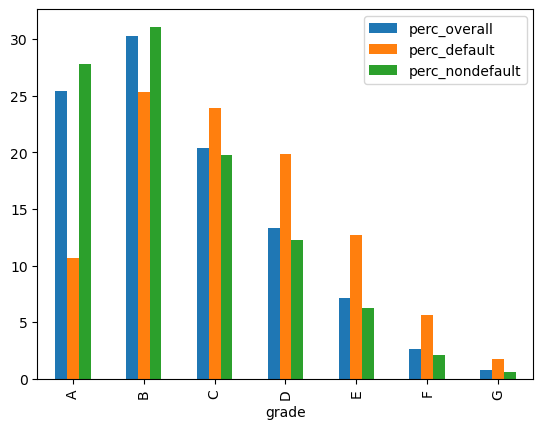

In [231]:
#Performing the deep dive across the term segregation for the customers as earlier synthesis was showing behavioural differences between the cohorts
for i in ['term','grade']:
    #combining the various loan cohort into a single dataframe
    res=df.groupby(i).agg({'id':'count'}).reset_index().rename(columns={'id':'over_val'}).merge(df[df['loan_status']=='Charged Off'].groupby(i).agg({'id':'count'}).reset_index().rename(columns={'id':'def_val'}),on=i).merge(df[df['loan_status']!='Charged Off'].groupby(i).agg({'id':'count'}).reset_index().rename(columns={'id':'non_def_val'}),on=i)
    
    #calculate the aggregate values across each cohort
    total_overall=res['over_val'].sum()
    total_default=res['def_val'].sum()
    total_nondefault=res['non_def_val'].sum()
    
    #calculate the percentage metric across each cohort
    res['perc_overall']=(res['over_val']/total_overall)*100
    res['perc_default']=(res['def_val']/total_default)*100
    res['perc_nondefault']=(res['non_def_val']/total_nondefault)*100
    
    #Plot the given chart for the required data
    res.plot(x=i, y=['perc_overall','perc_default','perc_nondefault'], kind="bar")

##################             Synthesis                 ####################

#As evident by the below bar chart representation for default customer the term selected for the loan is shorter for the non-default customers compared to defaulters
# The grade of loans are are also lower compared to the non default ones

Frequency distribution of Credit Age


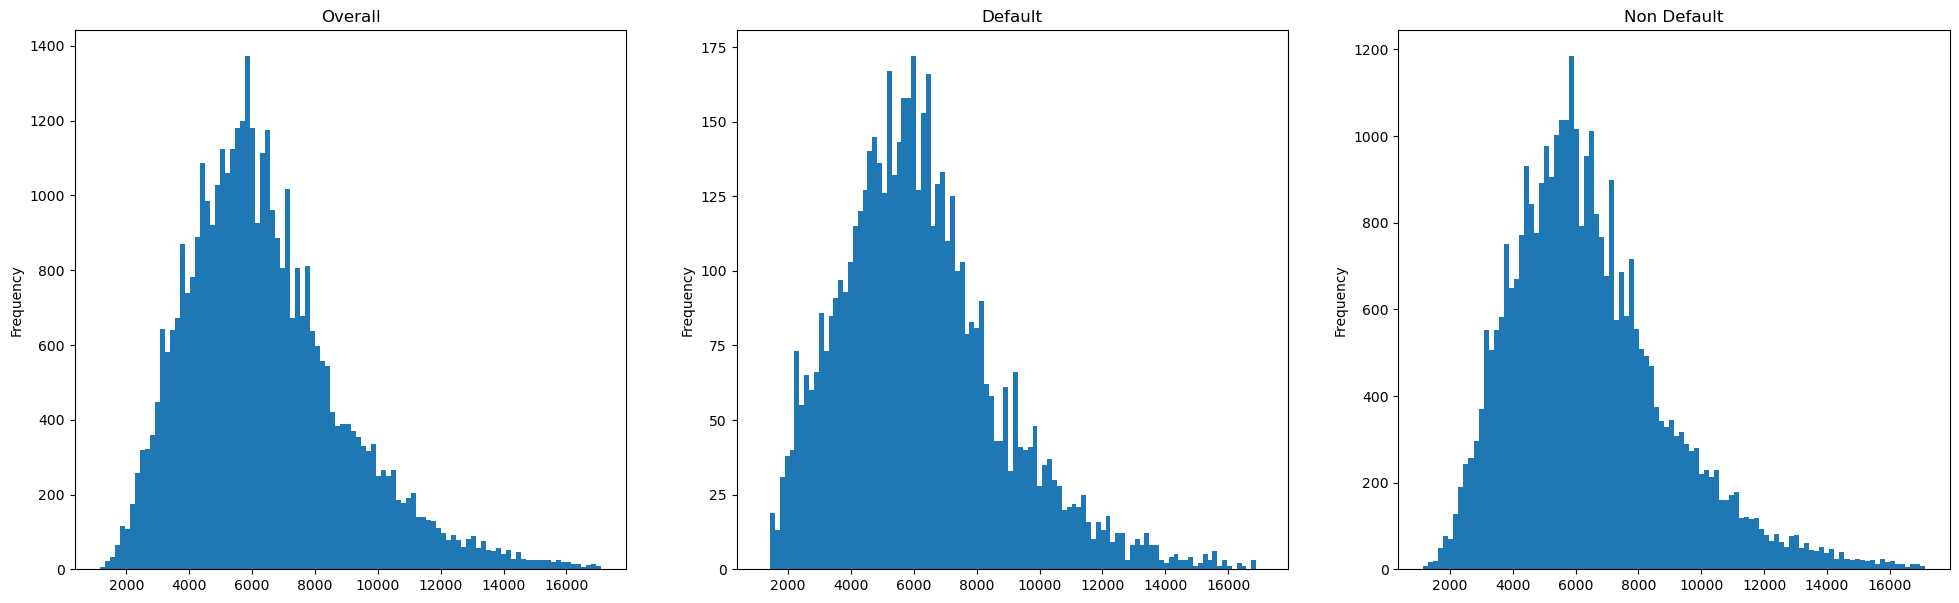

In [95]:
#creating a new derived metric that observes the frequency distribution of customer across their credit age
#for such metric the starting of credit age is taken from the column 'earliest_cr_line'
#for end of the the credit age is taken from the maxima between the columns 'last_pymnt_d' and 'last_credit_pull_d'

#Creating the section of data
temp_credage=df[['earliest_cr_line','last_pymnt_d','last_credit_pull_d','id','loan_status']]

#Checking the higher value out of the two dates mentioned
temp_credage['max_date']=np.where(temp_credage['last_credit_pull_d']>temp_credage['last_pymnt_d']
                                  ,temp_credage['last_credit_pull_d'],temp_credage['last_pymnt_d'])

#Specifying the minimum date for the data
temp_credage['min_date']=temp_credage['earliest_cr_line']

#dropping the null records where max date wasn't available
temp_credage=temp_credage.dropna()

#Taking the difference between the min and max dates
temp_credage['credit_age']=(temp_credage['max_date']-temp_credage['min_date']).dt.days

#Creating a sub plot for the frequency distribution of the credit age
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7), sharey=False,sharex=True)

#Freq distribution of overall cohort
temp_credage['credit_age'].plot(kind='hist',ax=axes[0], bins=100, title='Overall')

#Freq distribution of default cohort
temp_credage[df['loan_status']=='Charged Off']['credit_age'].plot(kind='hist',ax=axes[1], bins=100, title='Default')

#Freq distribution of non default cohort
temp_credage[df['loan_status']!='Charged Off']['credit_age'].plot(kind='hist',ax=axes[2], bins=100, title='Non Default')
print("Frequency distribution of Credit Age")

#plot the subplot
plt.subplots_adjust(right=2)
plt.show()

##################             Synthesis                 ####################

#There is no major distribution level difference between the various cohort except that the default cohorts left tail is thicker (i.e the frequency distribution is higher on the lower frequency)

Frequency distribution of Percentage Installment


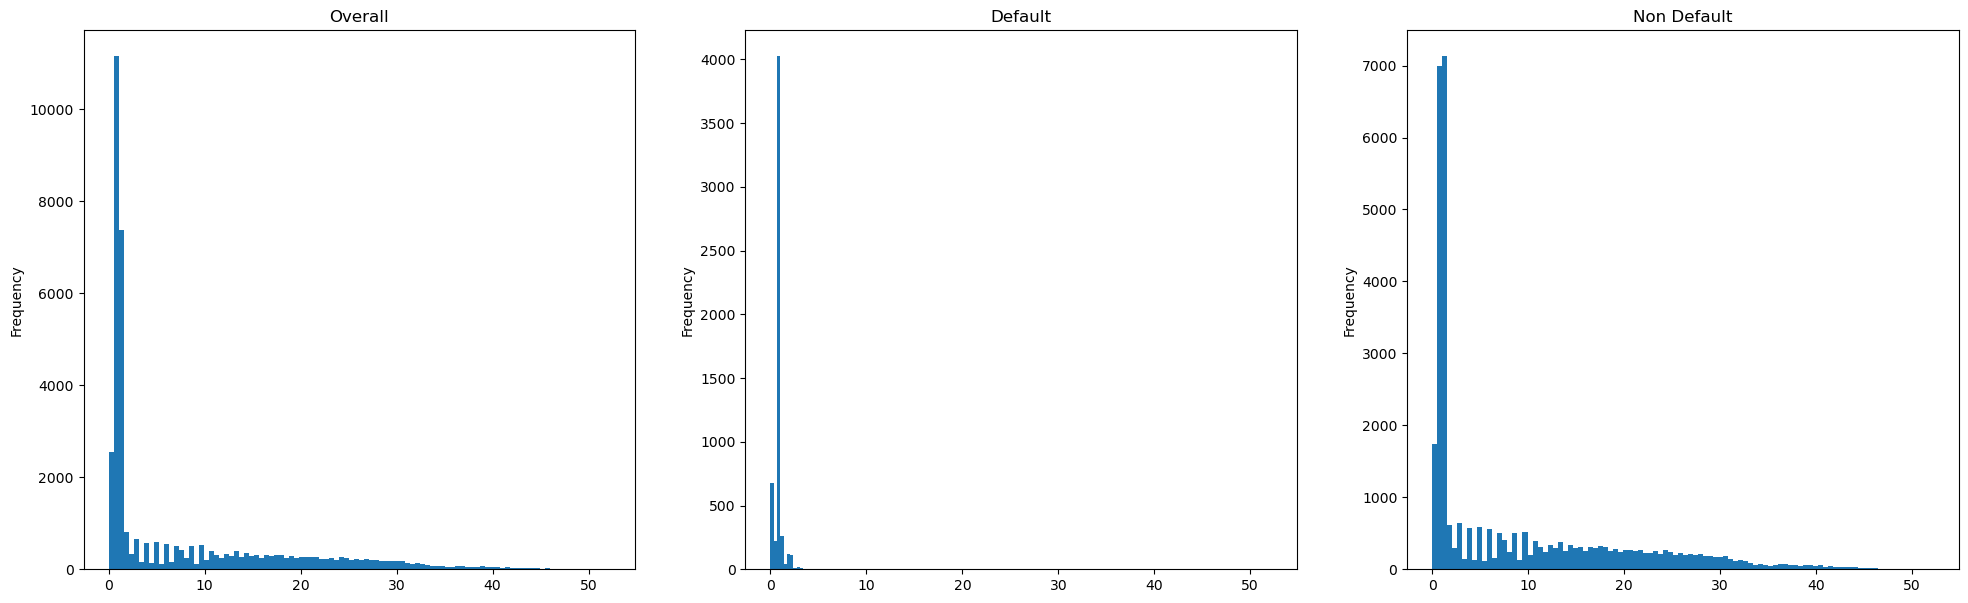

Frequency distribution of Percentage Installment


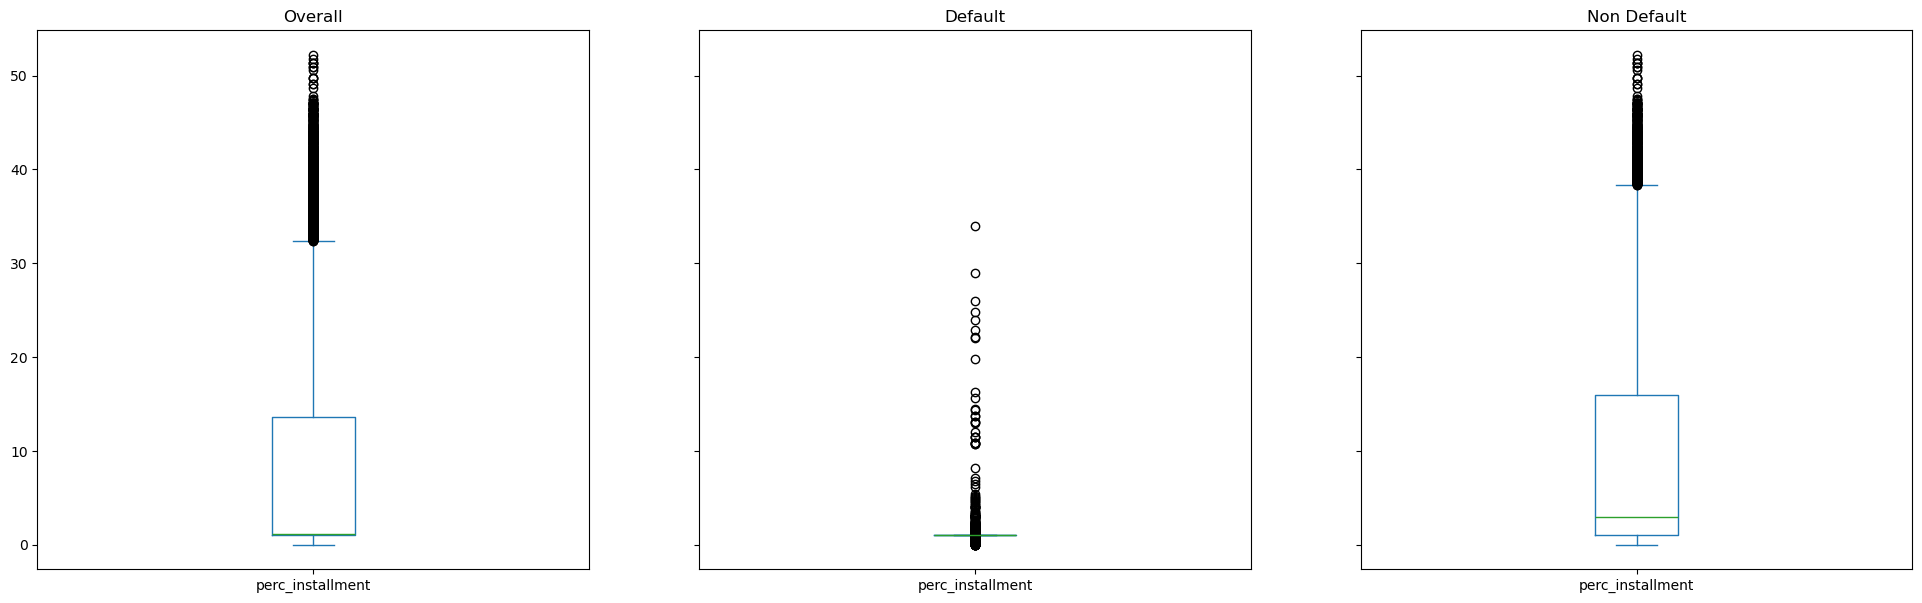

In [106]:
#creating a new derived metric that observes the frequency distribution of customers installement percent paid
#for such metric the last_pymnt_amnt is used to determine the ratio of the installment it comprises 
#The new metric percentage of installment would essentially be the installment divided by the amount last paid

#Create the section of data
temp_inst=df[['id','installment','last_pymnt_amnt','loan_status']]

#Create the metric based on the ratio of installment amount and last paid amount
temp_inst['perc_installment']=temp_inst['last_pymnt_amnt']/temp_inst['installment']

#plotting the frequency distribution of the percentage of installment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7), sharey=False,sharex=True)

#Plotting for the overall cohort
temp_inst['perc_installment'].plot(kind='hist',ax=axes[0], bins=100, title='Overall')

#plotting for the default cohort
temp_inst[df['loan_status']=='Charged Off']['perc_installment'].plot(kind='hist',ax=axes[1], bins=100, title='Default')

#plotting for the non default cohort
temp_inst[df['loan_status']!='Charged Off']['perc_installment'].plot(kind='hist',ax=axes[2], bins=100, title='Non Default')
print("Frequency distribution of Percentage Installment")

#creating the plot
plt.subplots_adjust(right=2)
plt.show()

#To further deep dive into the variation in the cohort distributions we can use a box plot to check for aggregated distribution

#plotting the aggregated distribution of the percentage of installment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7), sharey=True,sharex=False)

#Plotting for the overall cohort
temp_inst['perc_installment'].plot(kind='box',ax=axes[0], title='Overall')

#plotting for the default cohort
temp_inst[df['loan_status']=='Charged Off']['perc_installment'].plot(kind='box',ax=axes[1], title='Default')

#plotting for the non default cohort
temp_inst[df['loan_status']!='Charged Off']['perc_installment'].plot(kind='box',ax=axes[2], title='Non Default')
print("Frequency distribution of Percentage Installment")

#creating the plot
plt.subplots_adjust(right=2)
plt.show()

##################             Synthesis                 ####################

#Based on the data distribution for the different cohort it is evident that the percentage of installment is very low for the defaulting customers